# Technique Statements (parts of codes reference sources)



cumcount() : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.cumcount.html#pandas.core.groupby.DataFrameGroupBy.cumcount

diff(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html#pandas.DataFrame.diff

Orders by Customer segmentation
Orders by Product Category/Orders by Region/ : https://www.kaggle.com/code/nilufarhosseini/supply-chain-data-analysis-99-accuracy

Oversampling: https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

Feature selection with RF:https://www.geeksforgeeks.org/feature-selection-using-random-forest/

https://www.kaggle.com/code/zbpvarun/pca-random-forests

Out of Fold predictions(OOF):https://www.geeksforgeeks.org/what-is-the-oofout-of-fold-approach/
https://www.kaggle.com/code/andreasbis/isic-2024-out-of-fold-oof-experiment

SMOTE: https://www.kaggle.com/code/kabure/credit-card-fraud-prediction-rf-smote

EDA: https://www.kaggle.com/code/sahilgarg108/supply-chain-eda-fe-training-99

# Install necessary libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

!pip install torch
!pip install pytorch-tabnet

!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.5 MB/s eta 0:00:00


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/thesis/DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data preprocessing

## Handling missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum()

# Filter only the columns with missing values
missing_values = missing_values[missing_values > 0]

# Print the results
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


In [8]:
# Drop 'Order Zipcode' and 'Product Description'
df_new = df.drop(["Order Zipcode","Product Description"], axis=1)

# Remove rows with missing values
df_new.dropna(inplace=True)

# Calculate the total number of missing values
total_missing = df_new.isna().sum().sum()

print("Total Missing Values:", total_missing)

Total Missing Values: 0


## Drop useless features and records

In [9]:
df_new.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,...,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.0
mean,3.497673,2.931837,21.971563,183.101751,0.548297,31.849270,6690.778857,35920.246698,5.443454,29.719858,...,141.222139,0.120639,2.127706,203.765496,183.101751,21.971563,692.469414,31.849270,141.222139,0.0
std,1.623743,1.374457,104.433860,120.041578,0.497663,15.637996,4162.304984,37542.214613,1.629175,9.813737,...,139.726960,0.466806,1.453469,132.270788,120.041578,104.433860,336.417349,15.637996,139.726960,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.000000,725.000000,4.000000,18.265432,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6456.000000,19380.000000,5.000000,33.144863,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78202.500000,7.000000,39.279617,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


In [10]:

describe_df = df_new.describe()

# max >50000
columns_with_max_gt_50000 = describe_df.loc['max'][describe_df.loc['max'] > 50000].index

print("Columns with max > 50000:", list(columns_with_max_gt_50000))

Columns with max > 50000: ['Customer Zipcode', 'Order Id', 'Order Item Id']


In [11]:
# Drop unwanted columns
df_drop = df_new.drop(["Customer Email","Customer Password","Customer Fname","Customer Lname","Customer Street",
                  "Customer Zipcode","Order Item Id",'Order Id',"Product Image","Product Status"], axis=1)





In [12]:
df_drop['Order Status'].value_counts()

,count
Order Status,
COMPLETE,59487
PENDING_PAYMENT,39829
PROCESSING,21902
PENDING,20224
CLOSED,19616
ON_HOLD,9803
SUSPECTED_FRAUD,4062
CANCELED,3692
PAYMENT_REVIEW,1893


In [13]:
# remove 'SUSPECTED_FRAUD' records
df_drop = df_drop[df_drop["Order Status"] != "SUSPECTED_FRAUD"]

Convert data type and rename

In [14]:
# Convert datetime features and rewrite names of variables
# Convert the datetime columns
df_drop["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df_drop["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])

# Rename the columns
df_drop.rename(columns={
    "order date (DateOrders)": "Order Date",
    "shipping date (DateOrders)": "Shipping Date"
}, inplace=True)

# Convert "Order Status" to 1 (CANCELED) and 0 (NON-CANCELED)
df_drop["Order Status"] = df_drop["Order Status"].apply(lambda x: 1 if x == "CANCELED" else 0)

# Check
print(df_drop["Order Status"].value_counts())

# Calculate the proportions
print(df_drop["Order Status"].value_counts(normalize=True))

Order Status
0    172754
1      3692
Name: count, dtype: int64
Order Status
0    0.979076
1    0.020924
Name: proportion, dtype: float64


In [15]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Delivery Status                176446 non-null  object        
 6   Late_delivery_risk             176446 non-null  int64         
 7   Category Id                    176446 non-null  int64         
 8   Category Name                  176446 non-null  object        
 9   Customer City                  176446 non-null  object        
 10  Customer Country               176446 non-null  object        
 11  Custo

Identifying potential data Leakage in categorical Features（to check a feature label corresponds exactly to all records with Order Status = 1)

In [16]:
# Select categorical variables
categorical_columns = df_drop.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# Total count of Order Status = 1
total_status_1 = df_drop[df_drop['Order Status'] == 1].shape[0]
print(f"\nTotal count of Order Status = 1: {total_status_1}\n")

# Iterate through all categorical variables
for col in categorical_columns:
    print(f"\nChecking column: {col}")

    # Group by the categorical variable and Order Status, then count the distribution
    value_status_counts = df_drop.groupby([col, 'Order Status']).size().unstack(fill_value=0)

    # Filter labels that are only present in Order Status = 1
    unique_to_1 = value_status_counts[(value_status_counts[0] == 0) & (value_status_counts[1] > 0)]

    if not unique_to_1.empty:
        print(f"Labels in {col} that are unique to Order Status = 1:")
        print(unique_to_1)

        # Check if the total count of these labels equals the total count of Order Status = 1
        unique_to_1_total = unique_to_1[1].sum()
        if unique_to_1_total == total_status_1:
            print(f"Potential data leakage detected in {col}!")
            print(f"The labels fully cover all cases of Order Status = 1.")
        else:
            print(f"The total count of these labels ({unique_to_1_total}) does not fully cover all Order Status = 1 cases.")
    else:
        print(f"No labels in {col} are unique to Order Status = 1.")

Categorical columns: Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Product Name', 'Shipping Mode'],
      dtype='object')

Total count of Order Status = 1: 3692


Checking column: Type
No labels in Type are unique to Order Status = 1.

Checking column: Delivery Status
Labels in Delivery Status that are unique to Order Status = 1:
Order Status       0     1
Delivery Status           
Shipping canceled  0  3692
Potential data leakage detected in Delivery Status!
The labels fully cover all cases of Order Status = 1.

Checking column: Category Name
No labels in Category Name are unique to Order Status = 1.

Checking column: Customer City
No labels in Customer City are unique to Order Status = 1.

Checking column: Customer Country
No labels in Customer Country are unique to Order Status = 1.

Checking

Drop 'Delivery Status' column to avoid data leakage (all 'Shipping canceled' order = 1)

In [17]:
df_drop = df_drop.drop('Delivery Status', axis=1)

In [18]:
# Group by 'Type' and 'Order Status', and count occurrences
type_status_distribution = df_drop.groupby(['Type', 'Order Status']).size().unstack(fill_value=0)

# Print the distribution
print("Distribution of 'Type' across 'Order Status':")
print(type_status_distribution)

Distribution of 'Type' across 'Order Status':
Order Status      0     1
Type                     
CASH          19616     0
DEBIT         69290     0
PAYMENT       41722     0
TRANSFER      42126  3692


# EDA

Target variable-Order Status

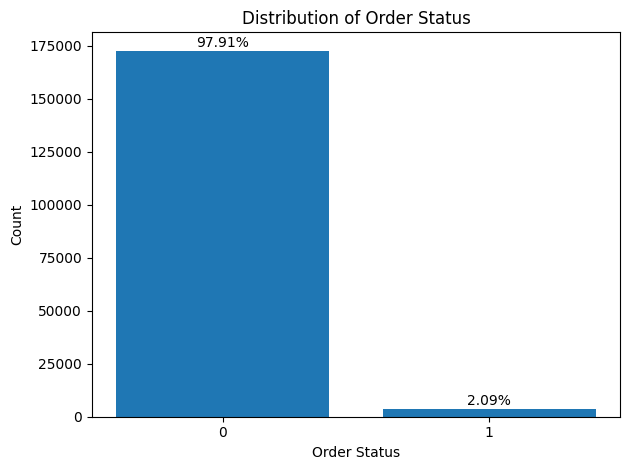

In [19]:
import matplotlib.pyplot as plt

# Calculate value counts for 'Order Status'
order_status_counts = df_drop['Order Status'].value_counts()
total_counts = order_status_counts.sum()

# Create a bar plot
plt.bar(order_status_counts.index, order_status_counts.values)

# Set labels for x-axis and y-axis
plt.xlabel('Order Status')
plt.ylabel('Count')

# Set the title for the plot
plt.title('Distribution of Order Status')

# Add percentages on top of each bar
for i, value in enumerate(order_status_counts.values):
    percentage = (value / total_counts) * 100
    plt.text(i, value + 0.01 * max(order_status_counts.values), f'{percentage:.2f}%', ha='center', fontsize=10)

# Ensure x-axis labels are displayed
plt.xticks(ticks=range(len(order_status_counts.index)), labels=order_status_counts.index)

# Display the plot
plt.tight_layout()
plt.show()

Orders by Product Category

<ipython-input-20-e197d63cc484>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_status_counts, x='Number of Orders', y='Category Name', hue='Order Status', estimator=sum, ci=None, palette='Set2')


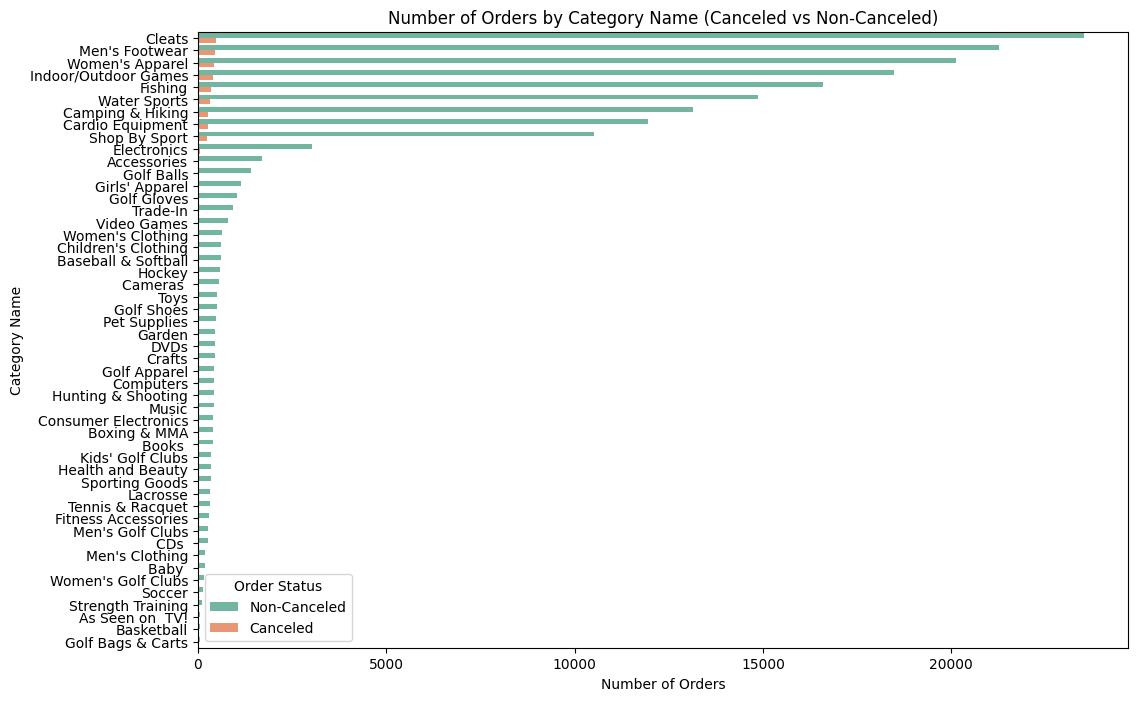

In [20]:
# Group the data by Category Name and Order Status, and count the orders
category_status_counts = df_drop.groupby(['Category Name', 'Order Status']).size().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

# Replace 0 and 1 with meaningful labels for Order Status
category_status_counts['Order Status'] = category_status_counts['Order Status'].replace({0: 'Non-Canceled', 1: 'Canceled'})

plt.figure(figsize=(12, 8))
sns.barplot(data=category_status_counts, x='Number of Orders', y='Category Name', hue='Order Status', estimator=sum, ci=None, palette='Set2')

# Add title and labels
plt.title('Number of Orders by Category Name (Canceled vs Non-Canceled)')
plt.xlabel('Number of Orders')
plt.ylabel('Category Name')

# Show the plot
plt.show()

Orders by Region

<ipython-input-21-73a0fa023806>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_status_counts, x='Number of Orders', y='Order Region', hue='Order Status', estimator=sum, ci=None, palette='Set1')


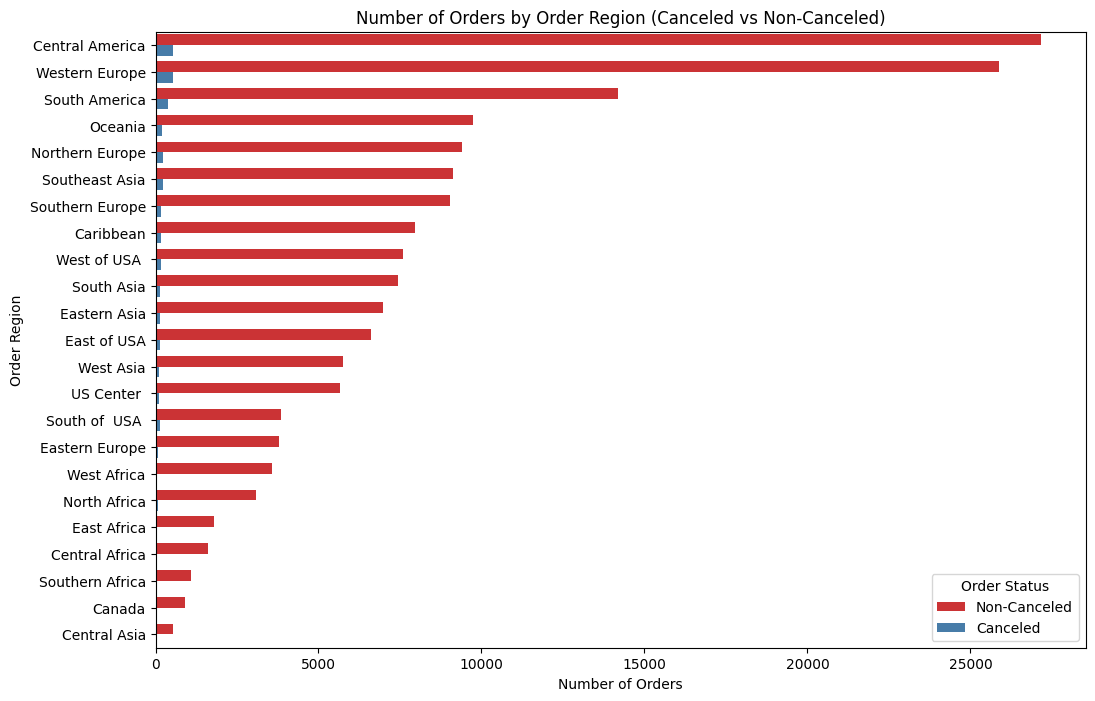

In [21]:
# Group the data by Order Region and Order Status, and count the orders
region_status_counts = df_drop.groupby(['Order Region', 'Order Status']).size().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)

# Replace 0 and 1 with meaningful labels for Order Status
region_status_counts['Order Status'] = region_status_counts['Order Status'].replace({0: 'Non-Canceled', 1: 'Canceled'})

# Plot the grouped bar plot with sorted regions
plt.figure(figsize=(12, 8))
sns.barplot(data=region_status_counts, x='Number of Orders', y='Order Region', hue='Order Status', estimator=sum, ci=None, palette='Set1')

# Add title and labels
plt.title('Number of Orders by Order Region (Canceled vs Non-Canceled)')
plt.xlabel('Number of Orders')
plt.ylabel('Order Region')

# Show the plot
plt.show()

Orders by Customer segmentation

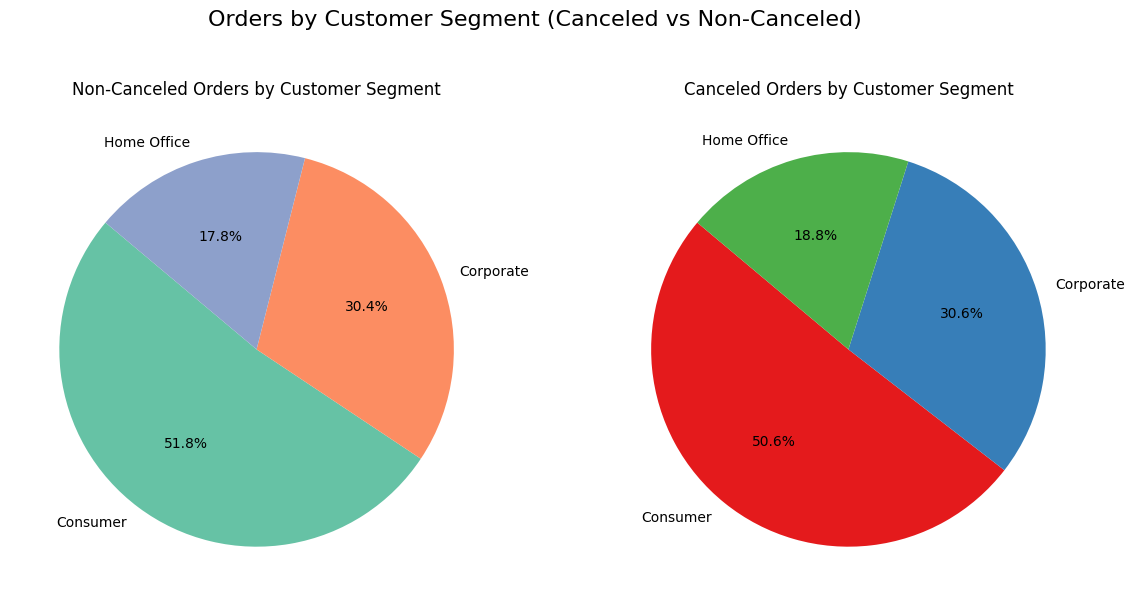

In [22]:
# Group the data by Customer Segment and Order Status, and count the orders
segment_status_counts = df_drop.groupby(['Customer Segment', 'Order Status']).size().reset_index(name='Number of Orders')

# Replace 0 and 1 with meaningful labels for Order Status
segment_status_counts['Order Status'] = segment_status_counts['Order Status'].replace({0: 'Non-Canceled', 1: 'Canceled'})

# Separate the data into Canceled and Non-Canceled
canceled_orders = segment_status_counts[segment_status_counts['Order Status'] == 'Canceled']
non_canceled_orders = segment_status_counts[segment_status_counts['Order Status'] == 'Non-Canceled']

# Plot the pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Non-Canceled orders
axes[0].pie(non_canceled_orders['Number of Orders'], labels=non_canceled_orders['Customer Segment'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
axes[0].set_title('Non-Canceled Orders by Customer Segment')

# Pie chart for Canceled orders
axes[1].pie(canceled_orders['Number of Orders'], labels=canceled_orders['Customer Segment'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set1.colors)
axes[1].set_title('Canceled Orders by Customer Segment')

# Add overall title
plt.suptitle('Orders by Customer Segment (Canceled vs Non-Canceled)', fontsize=16)

# Show the plot
plt.show()

Order amount distribution

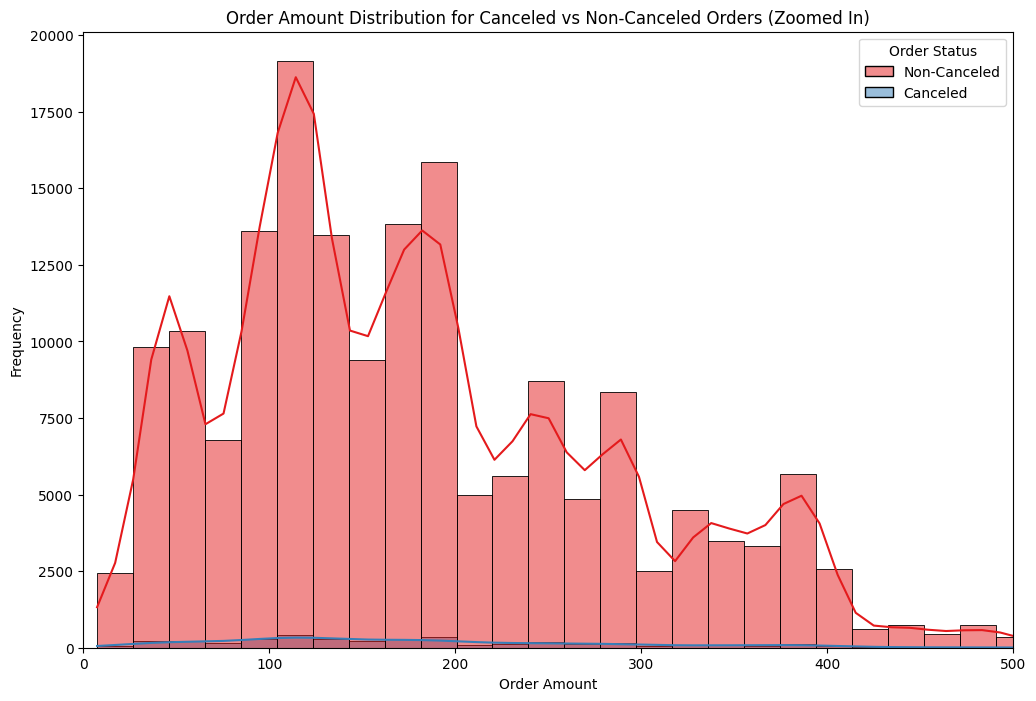

In [23]:
# Plot the distribution of "Order Item Total" for Canceled and Non-Canceled orders

# Define a mapping for the labels
status_labels = {0: 'Non-Canceled', 1: 'Canceled'}
plt.figure(figsize=(12, 8))
sns.histplot(data=df_drop, x='Order Item Total', hue=df_drop['Order Status'].map(status_labels), kde=True, palette='Set1', bins=100)

# Limit the x-axis to show the most concentrated range
plt.xlim(0, 500)

# Add title and labels
plt.title('Order Amount Distribution for Canceled vs Non-Canceled Orders (Zoomed In)')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

cancellation along with time

<ipython-input-24-29323043f7d5>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  canceled_orders_by_month = canceled_orders.set_index('Order Date').resample('M').size()


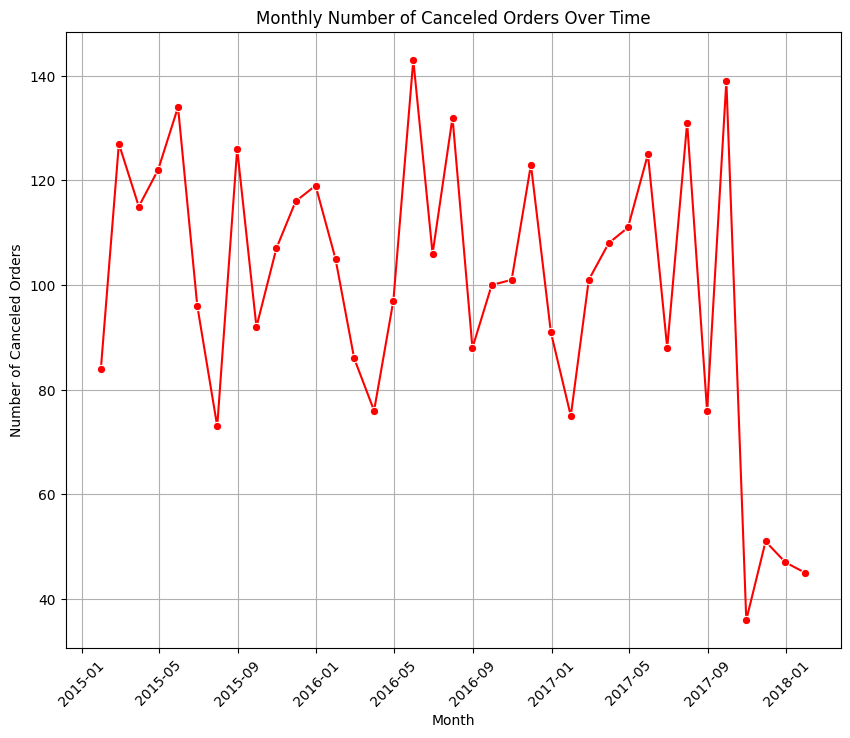

In [24]:


df_drop['Order Date'] = pd.to_datetime(df_drop['Order Date'])

# Filter only canceled orders
canceled_orders = df_drop[df_drop['Order Status'] == 1]

# Group by month and count the number of canceled orders per month
canceled_orders_by_month = canceled_orders.set_index('Order Date').resample('M').size()

# Plot the line graph
plt.figure(figsize=(10, 8))
sns.lineplot(data=canceled_orders_by_month, marker='o', color='red')

# Add title and labels
plt.title('Monthly Number of Canceled Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Canceled Orders')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

# Encoding

In [25]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Late_delivery_risk             176446 non-null  int64         
 6   Category Id                    176446 non-null  int64         
 7   Category Name                  176446 non-null  object        
 8   Customer City                  176446 non-null  object        
 9   Customer Country               176446 non-null  object        
 10  Customer Id                    176446 non-null  int64         
 11  Custo

categorical features

In [26]:
# Select only categorical features columns
cat_features = df_drop.select_dtypes(include=['object'])

# Display the non-numeric columns
print(cat_features.columns)

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode'],
      dtype='object')


In [27]:
# Calculate the number of unique values for each categorical feature
unique_values_per_cat_feature = cat_features.nunique().sort_values()
print(unique_values_per_cat_feature )

Customer Country       2
Customer Segment       3
Type                   4
Shipping Mode          4
Market                 5
Department Name       11
Order Region          23
Customer State        44
Category Name         50
Product Name         118
Order Country        164
Customer City        562
Order State         1084
Order City          3589
dtype: int64


One-Hot-Encoding for categorical features with less unique categories

In [28]:
def one_hot_encode(df, columns, drop_first=False):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column, drop_first=drop_first)
        one_hot = one_hot.astype(int)  # Convert boolean values to integers
        # Concatenate the new one-hot encoded columns to the DataFrame
        df = pd.concat([df, one_hot], axis=1)

    return df


In [29]:
# Encode 'Customer Country','Customer Segment','Type','Market'
df_encoded = one_hot_encode(df_drop, ['Customer Country','Customer Segment','Type','Market'], drop_first=False)

Ordinal Encoding for ordinal categorical features

In [30]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode(df, columns):
    ordinal_encoder = OrdinalEncoder()
    for column in columns:
        df[column + '_Ordinal'] = ordinal_encoder.fit_transform(df[[column]])
    return df

In [31]:
# Encode ‘Shipping Mode’
df_encoded = ordinal_encode(df_encoded, ['Shipping Mode'])

Frequency Encoding for categorical features with a lot unique categories

In [34]:
def frequency_encode(df, columns):


    for column in columns:
        # Calculate the frequency of each category in the column
        freq = df[column].value_counts() / len(df)
        # Add a new column with frequency encoding
        df[column + '_Freq'] = df[column].map(freq)

    return df

In [35]:
# Encode remaining categorical features
remaining_cat_features = ['Department Name',
                          'Order Region',
                          'Customer State',
                          'Category Name',
                          'Product Name',
                          'Order Country',
                          'Customer City',
                          'Order State',
                          'Order City']
df_encoded = frequency_encode(df_encoded, remaining_cat_features)

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 0 to 180518
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Late_delivery_risk             176446 non-null  int64         
 6   Category Id                    176446 non-null  int64         
 7   Category Name                  176446 non-null  object        
 8   Customer City                  176446 non-null  object        
 9   Customer Country               176446 non-null  object        
 10  Customer Id                    176446 non-null  int64         
 11  Custo

# Feature engineering

Time Based Features

In [37]:
# Select only datetime features columns
datetime_features = df_encoded.select_dtypes(include=['datetime64[ns]'])
print(datetime_features.columns)

Index(['Order Date', 'Shipping Date'], dtype='object')


In [38]:
# Extract year
df_encoded['Year'] = df_encoded['Order Date'].dt.year
# Extract quarter
df_encoded['Quarter'] = df_encoded['Order Date'].dt.quarter

# Extract month
df_encoded['Month'] = df_encoded['Order Date'].dt.month

# Extract day of week
df_encoded['DayOfWeek_Order'] = df_encoded['Order Date'].dt.dayofweek
df_encoded['DayOfWeek_Shipping'] = df_encoded['Shipping Date'].dt.dayofweek

# Extract if order or shipping is placed on weekends
df_encoded['IsWeekend_Order'] = (df_encoded['Order Date'].dt.dayofweek >= 5).astype(int)
df_encoded['IsWeekend_Shipping'] = (df_encoded['Shipping Date'].dt.dayofweek >= 5).astype(int)

In [39]:
# Extract part of day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_encoded['PartOfDay_Order'] = df_encoded['Order Date'].dt.hour.apply(part_of_day)
df_encoded['PartOfDay_Shipping'] = df_encoded['Shipping Date'].dt.hour.apply(part_of_day)

# Apply ordinal encoding to the 'PartOfDay_Order' and 'PartOfDay_Shipping' columns
df_encoded = ordinal_encode(df_encoded, ['PartOfDay_Order', 'PartOfDay_Shipping'])



In [40]:
# Create the 'IsLateDelivery' feature (1 if late, 0 if on time)
df_encoded['IsLateDelivery'] = (df_encoded['Days for shipping (real)'] > df_encoded['Days for shipment (scheduled)']).astype(int)

Product Based

catergory

In [41]:




# Calculate the number of orders for each product
product_counts = df_encoded['Category Name'].value_counts()

# Define a threshold for popularity, for example, products with more than 10,000 orders are popular
popularity_threshold = 10000

# Create a dictionary to store the popularity of each product (1 for popular, 0 for not popular)
popularity_dict = {product: 1 if count >= popularity_threshold else 0 for product, count in product_counts.items()}

# Create a new column 'IsPopular' based on the Product Name
df_encoded['IsPopularCat'] = df_encoded['Category Name'].map(popularity_dict)







discount

In [43]:
# Create a new feature'Previous Discount','IsDiscountIncrease','and 'IsDiscount','IsHighDiscount'

df_encoded = df_encoded.sort_values(by=["Category Name", "Order Date"], ascending=[True, True])

df_encoded['Previous Discount'] = df_encoded.groupby('Category Name')['Order Item Discount'].shift(1)
df_encoded['Previous Discount'].fillna(0, inplace=True)

df_encoded['IsDiscountIncrease'] = (df_encoded['Order Item Discount'] > df_encoded['Previous Discount']).astype(int)


df_encoded['IsDiscount'] = df_encoded['Order Item Discount'].apply(lambda x: 1 if x > 0 else 0)
df_encoded['IsHighDiscount'] = df_encoded['Order Item Discount Rate'].apply(lambda x: 1 if x >= 0.20 else 0)

<ipython-input-43-c1d39a81c6ee>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Previous Discount'].fillna(0, inplace=True)


Customer Based and time dependent Features(Historical order based features)

In [44]:
# Sort the entire dataset by Customer Id and Order Date
df_final = df_encoded.sort_values(by=['Customer Id', 'Order Date'])

# Create historical features on the entire sorted dataset

# Create 'CustomerOrderCount' to calculate the number of orders a customer has placed
df_final['CustomerOrderCount'] = df_final.groupby('Customer Id').cumcount() + 1  # cumcount() starts counting from 0, so add 1 to represent the actual order count starting from 1

# Use cumcount() to create the 'IsNewCustomer' column, which checks if it's the customer's first order
df_final['IsNewCustomer'] = (df_final.groupby('Customer Id').cumcount() == 0).astype(int)

# Create 'DaysSinceLastOrder' to calculate the order recency
df_final['DaysSinceLastOrder'] = df_final.groupby('Customer Id')['Order Date'].diff().dt.days
df_final['DaysSinceLastOrder'] = df_final['DaysSinceLastOrder'].fillna(-1).astype(int)



In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 9138 to 17863
Data columns (total 84 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Late_delivery_risk             176446 non-null  int64         
 6   Category Id                    176446 non-null  int64         
 7   Category Name                  176446 non-null  object        
 8   Customer City                  176446 non-null  object        
 9   Customer Country               176446 non-null  object        
 10  Customer Id                    176446 non-null  int64         
 11  Cus

In [46]:
# Compute correlation for numerical features
numerical_features = df_final.select_dtypes(include=['int32','int64', 'float64']).columns
correlations = df_final[numerical_features].corrwith(df_final['Order Status'])

# Sort by absolute correlation in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Display the sorted correlations
print("Numerical Features Sorted by Absolute Correlation with Order Status:")
print(sorted_correlations)

Numerical Features Sorted by Absolute Correlation with Order Status:
Order Status               1.000000
Type_TRANSFER              0.246841
Late_delivery_risk         0.165232
Type_DEBIT                 0.117556
Type_PAYMENT               0.081354
                             ...   
Category Id                0.000320
Product Category Id        0.000320
Order Item Discount        0.000281
Customer State_Freq        0.000277
Order Item Profit Ratio    0.000221
Length: 66, dtype: float64


# Delect Multicolinear columns

Delete unnecesary features,select numeric features and delete multicollinear columns

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 9138 to 17863
Data columns (total 84 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Late_delivery_risk             176446 non-null  int64         
 6   Category Id                    176446 non-null  int64         
 7   Category Name                  176446 non-null  object        
 8   Customer City                  176446 non-null  object        
 9   Customer Country               176446 non-null  object        
 10  Customer Id                    176446 non-null  int64         
 11  Cus

In [48]:

# Drop unwanted columns
unwanted_columns = ['Customer Id', 'Order Customer Id', 'Latitude', 'Longitude']
df_final = df_final.drop(columns=unwanted_columns)  # Remove unwanted columns from data




In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176446 entries, 9138 to 17863
Data columns (total 80 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           176446 non-null  object        
 1   Days for shipping (real)       176446 non-null  int64         
 2   Days for shipment (scheduled)  176446 non-null  int64         
 3   Benefit per order              176446 non-null  float64       
 4   Sales per customer             176446 non-null  float64       
 5   Late_delivery_risk             176446 non-null  int64         
 6   Category Id                    176446 non-null  int64         
 7   Category Name                  176446 non-null  object        
 8   Customer City                  176446 non-null  object        
 9   Customer Country               176446 non-null  object        
 10  Customer Segment               176446 non-null  object        
 11  Cus

In [50]:
# Extract numeric columns
numeric_columns = df_final.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df_final[numeric_columns].corr()

# Identify highly correlated columns
threshold = 0.99  # Correlation threshold
columns_to_drop = []
highly_correlated_pairs = []

# Iterate through the lower triangle of the correlation matrix
for col in range(len(correlation_matrix.columns)):
    for row in range(col):
        if abs(correlation_matrix.iloc[row, col]) > threshold:
            col_name = correlation_matrix.columns[col]
            row_name = correlation_matrix.index[row]
            correlation_value = correlation_matrix.iloc[row, col]

            # Save correlated pairs
            highly_correlated_pairs.append((row_name, col_name, correlation_value))

            # Keep the first column, mark the second column to drop
            if col_name not in columns_to_drop:
                columns_to_drop.append(col_name)

# Display results
print("\nHighly Correlated Variables (correlation > 0.99):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

print(f"\nColumns to Drop due to High Correlation: {columns_to_drop}")
print(f"Number of columns to drop: {len(columns_to_drop)}")

# Remove highly correlated columns and create a cleaned feature list
selected_features_cleaned = [col for col in numeric_columns if col not in columns_to_drop]

# Print remaining features
print("\nRemaining Features after Removing Highly Correlated Ones:")
print(selected_features_cleaned)
print(f"Remaining Numeric Columns: {len(selected_features_cleaned)}")


Highly Correlated Variables (correlation > 0.99):
Category Id and Order Item Cardprod Id: 0.9910897205642816
Sales per customer and Order Item Total: 1.0
Benefit per order and Order Profit Per Order: 1.0
Category Id and Product Card Id: 0.9910897205642816
Order Item Cardprod Id and Product Card Id: 1.0
Category Id and Product Category Id: 1.0
Order Item Cardprod Id and Product Category Id: 0.9910897205642816
Product Card Id and Product Category Id: 0.9910897205642816
Order Item Product Price and Product Price: 1.0
Customer Country_EE. UU. and Customer Country_Puerto Rico: -0.9999999999999997
Category Name_Freq and Product Name_Freq: 0.9927901769899524

Columns to Drop due to High Correlation: ['Order Item Cardprod Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Customer Country_Puerto Rico', 'Product Name_Freq']
Number of columns to drop: 8

Remaining Features after Removing Highly Correlated Ones:
['Days for shipping (rea

In [51]:
df_final = df_final.drop(columns=columns_to_drop)

In [52]:
updated_numeric_columns = df_final.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
len(updated_numeric_columns)

54

# Split data

In [53]:
print(df_final['Order Date'].max())
print(df_final['Order Date'].min())

2018-01-31 23:38:00
2015-01-01 00:00:00


## Split dataset

In [54]:
# Define the split dates
train_end_date = pd.to_datetime('2016-12-31 23:59:59')  # End date for training set
val_end_date = pd.to_datetime('2017-06-30 23:59:59')  # End date for validation set
test_start_date = pd.to_datetime('2017-07-01 00:00:00')  # Start date for test set

# Create the training, validation, and test sets based on date ranges
train_set = df_final[df_final['Order Date'] <= train_end_date]
val_set = df_final[(df_final['Order Date'] > train_end_date) & (df_final['Order Date'] <= val_end_date)]
test_set = df_final[df_final['Order Date'] >= test_start_date]

# Display the number of rows in each set
print(f"Training set rows: {len(train_set)}")
print(f"Validation set rows: {len(val_set)}")
print(f"Test set rows: {len(test_set)}")
print(f"Total rows: {len(df_final)}")

# Calculate and display the proportion of each set
train_proportion = len(train_set) / len(df_final)
val_proportion = len(val_set) / len(df_final)
test_proportion = len(test_set) / len(df_final)

print(f"Proportion of train set: {train_proportion:.2%}")
print(f"Proportion of val set: {val_proportion:.2%}")
print(f"Proportion of test set: {test_proportion:.2%}")

Training set rows: 122439
Validation set rows: 30206
Test set rows: 23801
Total rows: 176446
Proportion of train set: 69.39%
Proportion of val set: 17.12%
Proportion of test set: 13.49%


Count the number of canceled and non-canceled orders in each dataset

In [55]:
def calculate_order_proportions(dataset, dataset_name):
    total_orders = len(dataset)
    canceled_orders = dataset[dataset['Order Status'] == 1]
    non_canceled_orders = dataset[dataset['Order Status'] == 0]

    canceled_count = len(canceled_orders)
    non_canceled_count = len(non_canceled_orders)

    canceled_proportion = canceled_count / total_orders
    non_canceled_proportion = non_canceled_count / total_orders

    print(f"{dataset_name} - Total Orders: {total_orders}")
    print(f"{dataset_name} - Canceled Orders: {canceled_count} ({canceled_proportion:.2%})")
    print(f"{dataset_name} - Non-Canceled Orders: {non_canceled_count} ({non_canceled_proportion:.2%})")
    print("\n")

# Calculate and display proportions for each dataset
calculate_order_proportions(train_set, "Training Set")
calculate_order_proportions(val_set, "Validation Set")
calculate_order_proportions(test_set, "Test Set")

Training Set - Total Orders: 122439
Training Set - Canceled Orders: 2559 (2.09%)
Training Set - Non-Canceled Orders: 119880 (97.91%)


Validation Set - Total Orders: 30206
Validation Set - Canceled Orders: 608 (2.01%)
Validation Set - Non-Canceled Orders: 29598 (97.99%)


Test Set - Total Orders: 23801
Test Set - Canceled Orders: 525 (2.21%)
Test Set - Non-Canceled Orders: 23276 (97.79%)




2. Split target variable

In [56]:
train_data = train_set[updated_numeric_columns].drop(columns=['Order Status'])
train_target = train_set['Order Status']

val_data = val_set[updated_numeric_columns].drop(columns=['Order Status'])
val_target = val_set['Order Status']

test_data = test_set[updated_numeric_columns].drop(columns=['Order Status'])
test_target = test_set['Order Status']




# Standardization

In [57]:
from re import X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_val_scaled = scaler.transform(val_data)
X_test_scaled = scaler.transform(test_data)


y_train = train_target.to_numpy()
y_val = val_target.to_numpy()
y_test = test_target.to_numpy()

In [58]:
print(type(X_train_scaled), X_train_scaled.shape)
print(type(X_val_scaled), X_val_scaled.shape)
print(type(X_test_scaled), X_test_scaled.shape)
print(type(y_train), y_train.shape)
print(type(y_val), y_val.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (122439, 53)
<class 'numpy.ndarray'> (30206, 53)
<class 'numpy.ndarray'> (23801, 53)
<class 'numpy.ndarray'> (122439,)
<class 'numpy.ndarray'> (30206,)
<class 'numpy.ndarray'> (23801,)


# Evaluation Metrics

Display CM, ROC and PR curve

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def plot_cm_roc_pr(y_true, y_pred, y_pred_proba, class_labels=["Non-canceled", "Canceled"]):
    """
    Plots Confusion Matrix, ROC Curve, and Precision-Recall Curve for a given dataset.
    """
    # ------------------ Confusion Matrix ------------------
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.tight_layout()
    plt.show()

    # ------------------ ROC Curve ------------------
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}', color='green')
    plt.plot([0, 1], [0, 1], 'k--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # ------------------ Precision-Recall Curve ------------------
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_vals, precision_vals, label=f'PR-AUC = {pr_auc:.4f}', color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.show()

plot loss

In [59]:
# import matplotlib.pyplot as plt
# import pandas as pd

# def plot_train_val_loss(tabnet, title='Training and Validation Loss over Epochs', xlabel='Epoch', ylabel='Loss'):

#     # Extract history data from TabNet model
#     history_data = tabnet.history

#     # Create a DataFrame with the relevant history data (train_loss, val_loss, learning rate)
#     history_df = pd.DataFrame({
#         'train_loss': history_data['loss'],
#         'val_logloss': history_data['val_logloss'],
#         'lr': history_data['lr']
#     })

#     # Plot the training and validation losses
#     plt.figure(figsize=(10, 6))
#     plt.plot(history_df.index, history_df['train_loss'], label='Train Loss', color='blue')
#     plt.plot(history_df.index, history_df['val_logloss'], label='Validation Loss', color='orange')

#     # Adding plot details
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.legend()
#     plt.grid()

#     # Show the plot
#     plt.show()



plot learning curve

In [60]:
# # Plot the learning curve
# def plot_learning_curve(estimator, X, y, cv, scoring, train_sizes=np.linspace(0.1, 1.0, 5)):

#     train_sizes_abs, train_scores, val_scores = learning_curve(
#         estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
#     )

#     # Compute mean and std for training and validation scores
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     val_scores_mean = np.mean(val_scores, axis=1)
#     val_scores_std = np.std(val_scores, axis=1)

#     # Plot the learning curve
#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes_abs, train_scores_mean, label="Training Score", color="blue", marker="o")
#     plt.fill_between(train_sizes_abs,
#                      train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std,
#                      color="blue", alpha=0.2)

#     plt.plot(train_sizes_abs, val_scores_mean, label="Validation Score", color="orange", marker="s")
#     plt.fill_between(train_sizes_abs,
#                      val_scores_mean - val_scores_std,
#                      val_scores_mean + val_scores_std,
#                      color="orange", alpha=0.2)

#     plt.title("Learning Curve")
#     plt.xlabel("Training Set Size")
#     plt.ylabel(scoring.capitalize())
#     plt.legend(loc="best")
#     plt.grid()
#     plt.show()


# Modeling

# 1.Random Forest

##1.1 Tuned model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 24, 'class_weight': None}

Classification Report-text
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801



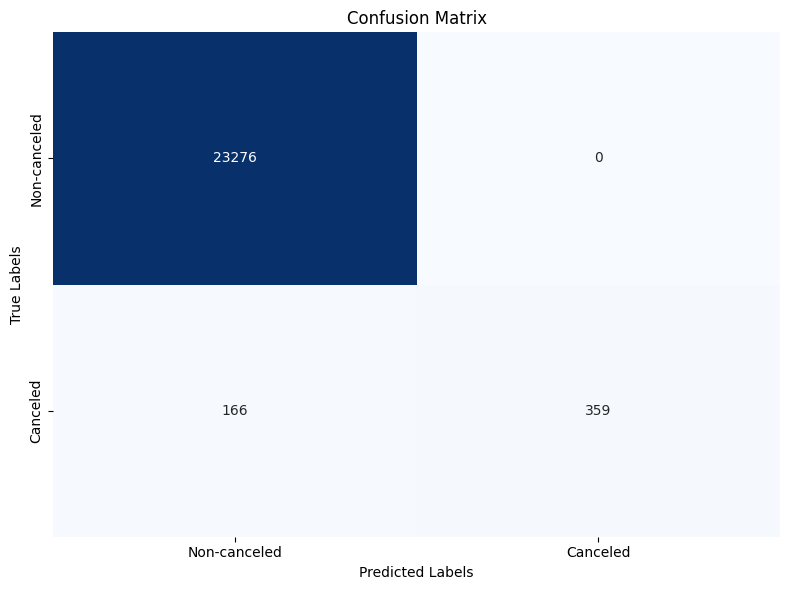

<ipython-input-62-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


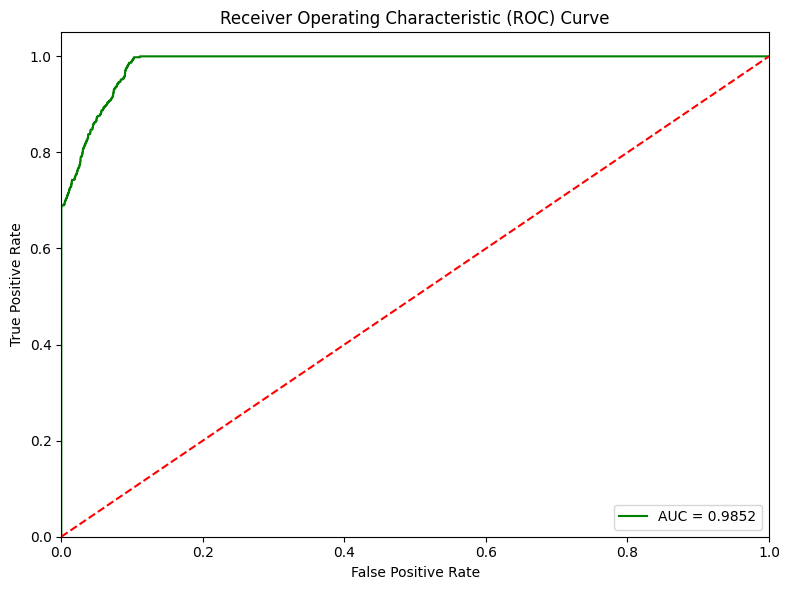

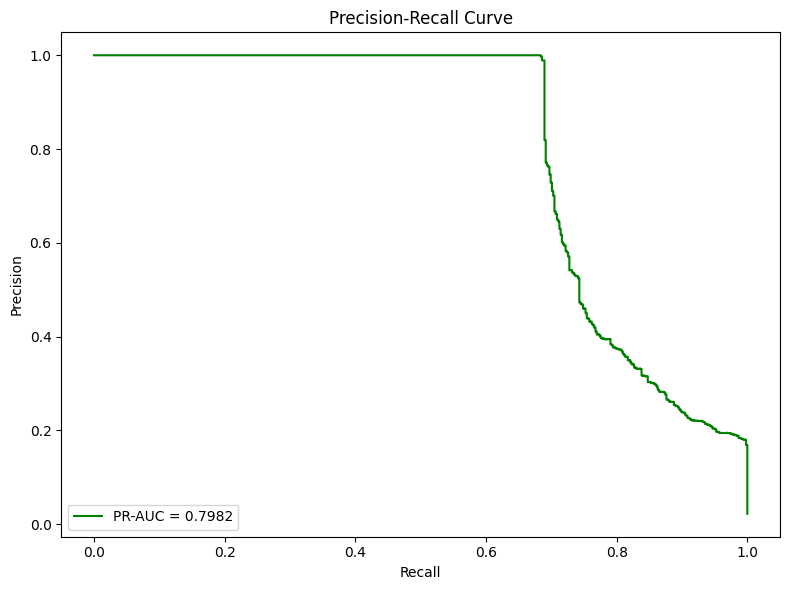

Model saved as 'best_rf.pkl'


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': np.arange(300, 501, 50),
    'max_depth': np.arange(20, 31, 2),
    'min_samples_split': np.arange(3, 7),
    'min_samples_leaf': np.arange(3, 6),
    'max_features': ['sqrt'],
    'class_weight': [None]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,
    scoring='recall',
    cv=tscv,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Perform the Random Search
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best hyperparameters to train on the full training data
best_rf = random_search.best_estimator_

# Train the model with the best parameters on the full training set
best_rf.fit(X_train_scaled, y_train)


# Evaluate on test set
y_test_pred = best_rf.predict(X_test_scaled)
y_test_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report-text")
print(classification_report(y_test, y_test_pred,digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)


results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/rf.csv', index=False)


# Save the trained model
joblib.dump(best_rf, 'best_rf.pkl')
print("Model saved as 'best_rf.pkl'")


## 1.2 Oversampling

Best hyperparameters: {'rf__n_estimators': 300, 'rf__min_samples_split': 6, 'rf__min_samples_leaf': 3, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__class_weight': None}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.9933    0.9921    0.9927     23276
           1     0.6667    0.7048    0.6852       525

    accuracy                         0.9857     23801
   macro avg     0.8300    0.8484    0.8389     23801
weighted avg     0.9861    0.9857    0.9859     23801



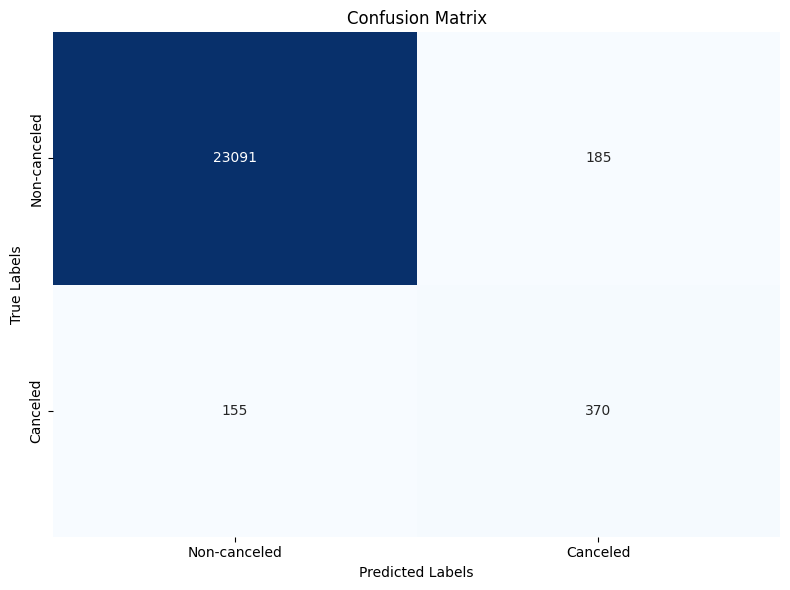

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


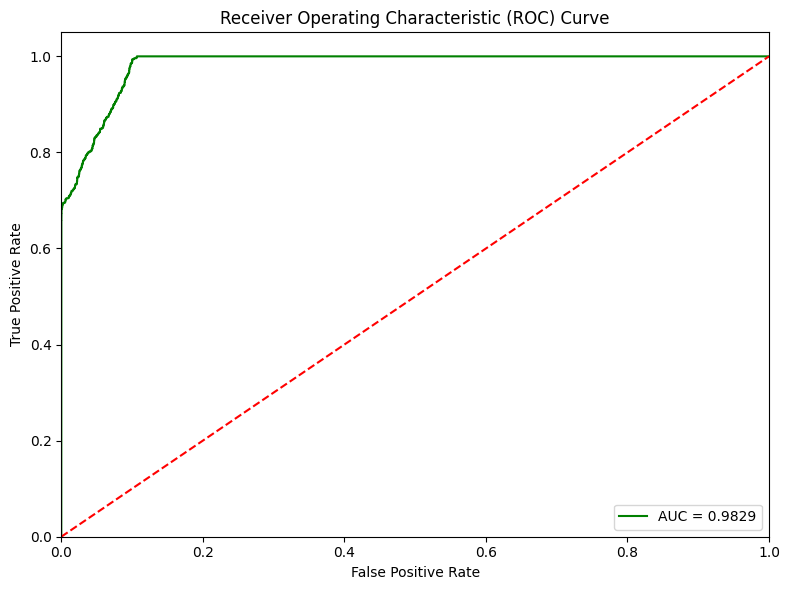

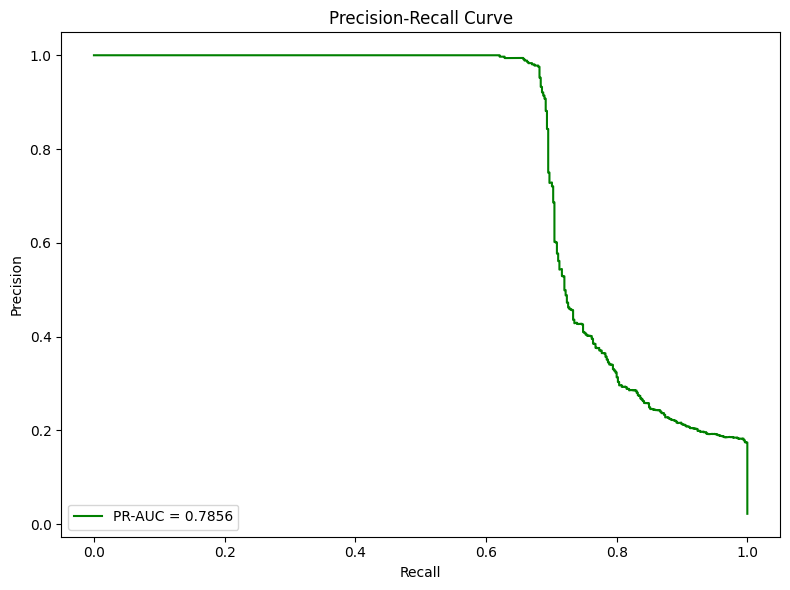

Model saved as 'best_rf_smote.pkl'


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

# Define the parameter grid for Random Search
param_grid = {
    'rf__n_estimators': np.arange(300, 501, 50),  # Number of trees
    'rf__max_depth': np.arange(20, 31, 2),        # Max depth of trees
    'rf__min_samples_split': np.arange(3, 7),     # Min samples to split a node
    'rf__min_samples_leaf': np.arange(3, 6),      # Min samples at a leaf node
    'rf__max_features': ['sqrt'],                 # Max features per split
    'rf__class_weight': [None]
}

# Initialize the pipeline with SMOTE and RandomForestClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])


# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='recall',
    cv=tscv,
    random_state=42,
    verbose=0,
    n_jobs=-1
)

# Perform the Random Search
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best hyperparameters to train on the full training data
best_rf_smote = random_search.best_estimator_

# Train the model with the best parameters on the full training set
best_rf_smote.fit(X_train_scaled, y_train)



# Evaluate on test set
y_test_pred = best_rf_smote.predict(X_test_scaled)
y_test_pred_proba = best_rf_smote.predict_proba(X_test_scaled)[:, 1]


print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred,digits=4))


# Call the function to plot CM, ROC, and PR curves
plot_cm_roc_pr(y_test,y_test_pred, y_test_pred_proba)



results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/rf_smote.csv', index=False)

joblib.dump(best_rf_smote, 'best_rf_smote.pkl')
print("Model saved as 'best_rf_smote.pkl'")


# 2.XGBoost

##2.1 Tuned model

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:29:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'reg_lambda': 1.5, 'reg_alpha': 0.30000000000000004, 'n_estimators': 105, 'min_child_weight': 6, 'max_depth': 6, 'learning_rate': 0.15}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report-Test set
              precision    recall  f1-score   support

           0     0.9929    0.9999    0.9964     23276
           1     0.9945    0.6838    0.8104       525

    accuracy                         0.9929     23801
   macro avg     0.9937    0.8419    0.9034     23801
weighted avg     0.9930    0.9929    0.9923     23801



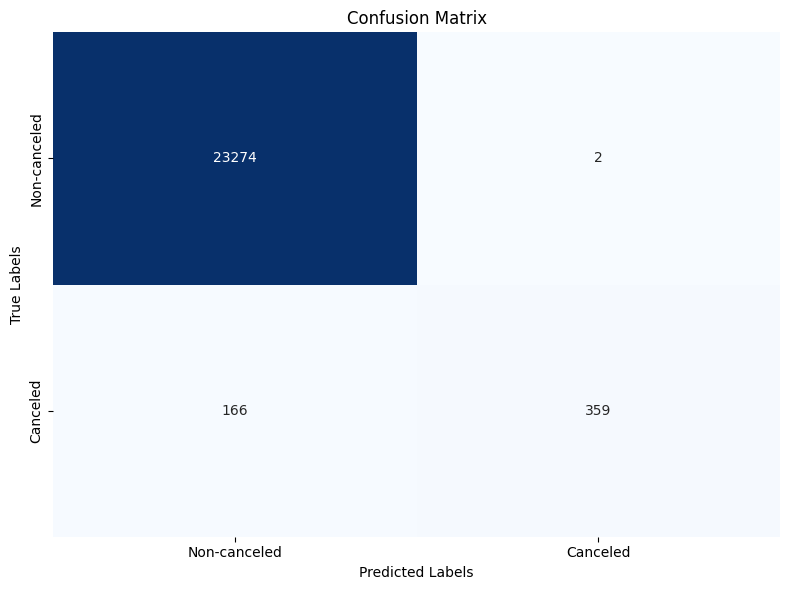

<ipython-input-62-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


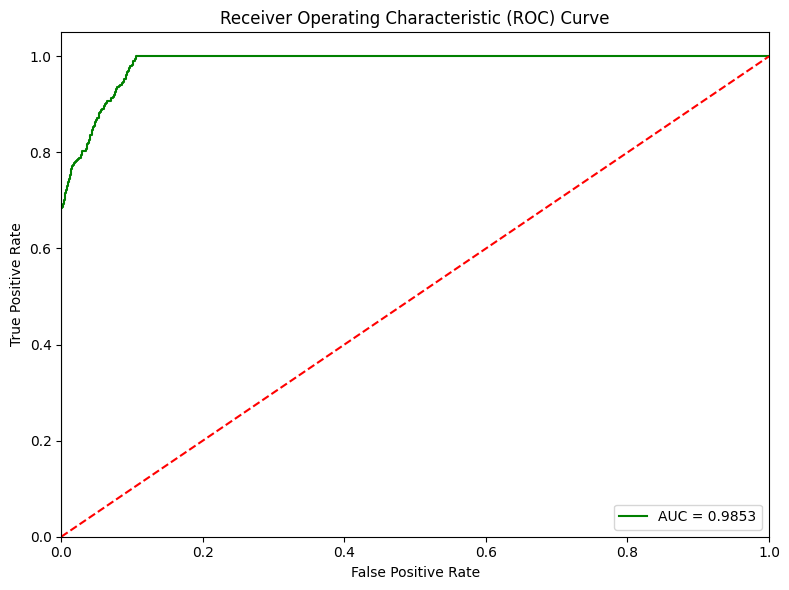

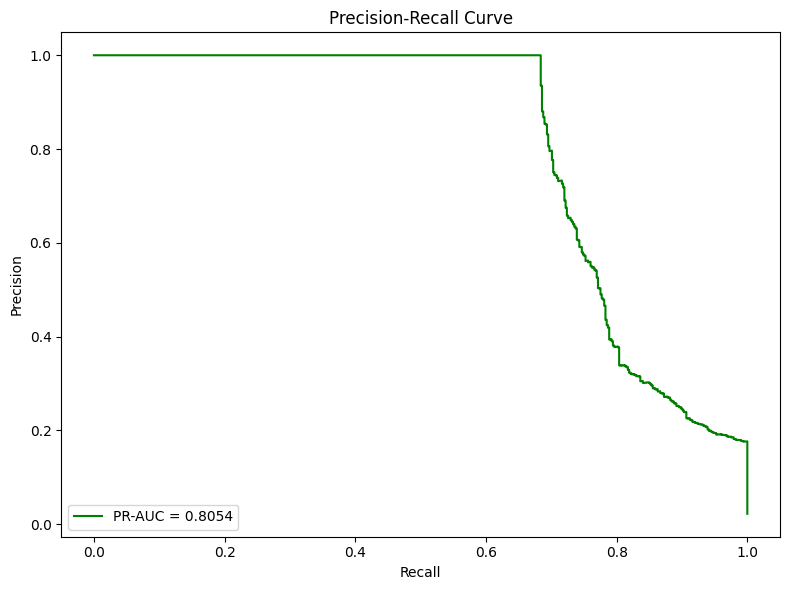

Model saved as 'best_xgb.pkl'


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': np.arange(90, 120, 5),
    'max_depth': np.arange(3, 7),
    'learning_rate': np.linspace(0.05, 0.15, 5),
    'min_child_weight': np.arange(5, 9),
    'reg_alpha': np.linspace(0.1, 0.5, 5),
    'reg_lambda': np.linspace(1, 3, 5),

}

# Initialize XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False)

# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='recall',
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Random Search
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best hyperparameters to train on the full training data
best_xgb = random_search.best_estimator_

# Train the model with the best parameters on the full training set
best_xgb.fit(X_train_scaled, y_train)



# Evaluate on test set
y_test_pred = best_xgb.predict(X_test_scaled)
y_test_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]



print("\nClassification Report-Test set")
print(classification_report(y_test, y_test_pred,digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/xgb.csv', index=False)

# Save the trained model
joblib.dump(best_xgb, 'best_xgb.pkl')
print("Model saved as 'best_xgb.pkl'")


## 2.2 Oversampling

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'xgb__reg_lambda': 1.5, 'xgb__reg_alpha': 0.4, 'xgb__n_estimators': 90, 'xgb__min_child_weight': 8, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:37:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report-Test Set:
              precision    recall  f1-score   support

           0     1.0000    0.8925    0.9432     23276
           1     0.1734    1.0000    0.2956       525

    accuracy                         0.8949     23801
   macro avg     0.5867    0.9463    0.6194     23801
weighted avg     0.9818    0.8949    0.9289     23801



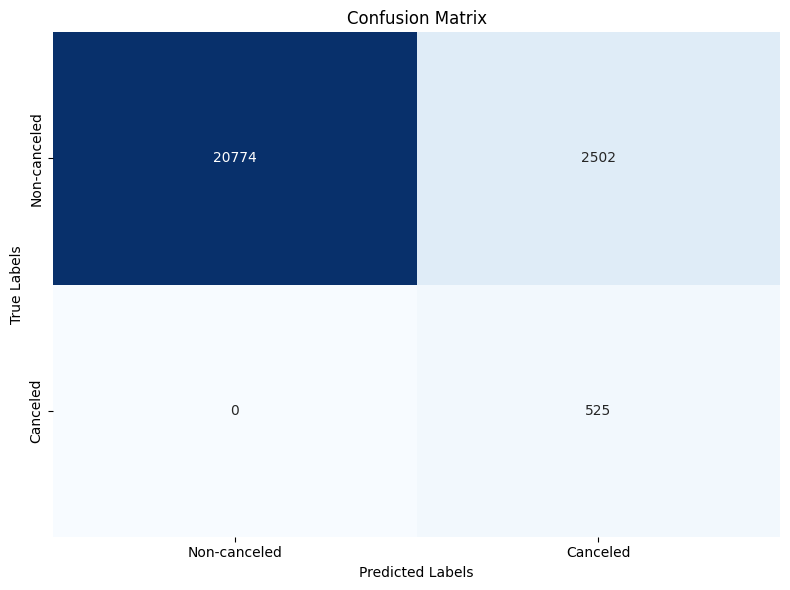

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


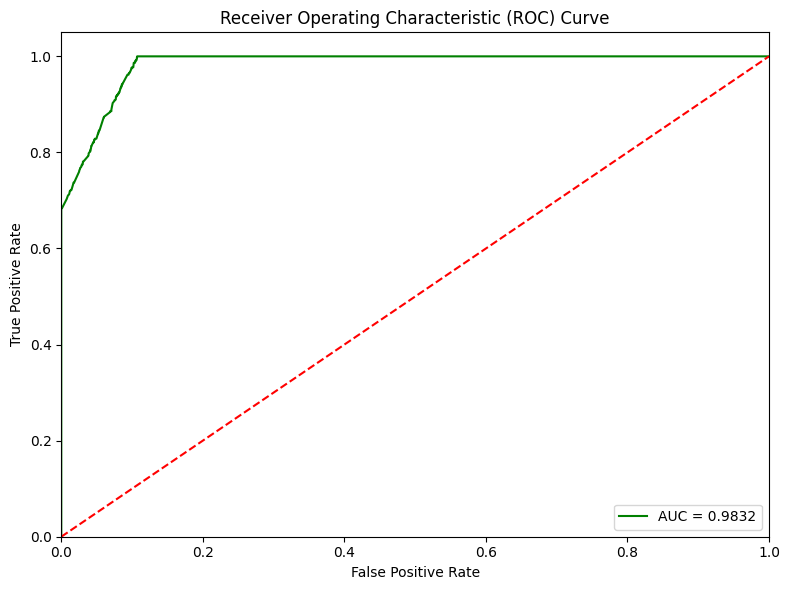

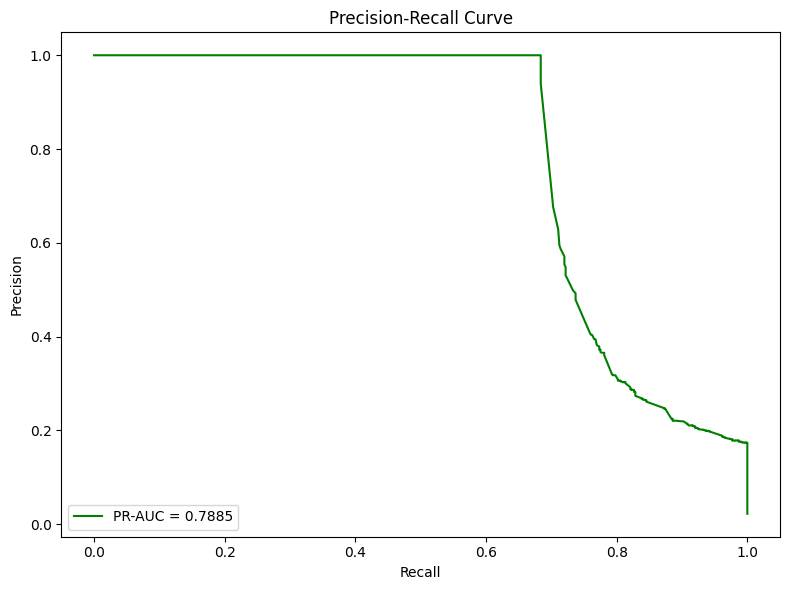

Model saved as 'best_xgb_smote.pkl'


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

# Define the parameter grid for Random Search
param_grid = {
    'xgb__n_estimators': np.arange(90, 120, 5),
    'xgb__max_depth': np.arange(3, 7),
    'xgb__learning_rate': np.linspace(0.05, 0.15, 5),
    'xgb__min_child_weight': np.arange(5, 9),
    'xgb__reg_alpha': np.linspace(0.1, 0.5, 5),
    'xgb__reg_lambda': np.linspace(1, 3, 5)
}

# Initialize the pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False))
])

# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='recall',
    cv=tscv,
    random_state=42,
    verbose=0,
    n_jobs=-1
)

# Perform the Random Search
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best hyperparameters to train on the full training data
best_xgb_smote = random_search.best_estimator_

# Train the model with the best parameters on the full training set
best_xgb_smote.fit(X_train_scaled, y_train)



# Evaluate on test set
y_test_pred = best_xgb_smote.predict(X_test_scaled)
y_test_pred_proba = best_xgb_smote.predict_proba(X_test_scaled)[:, 1]



print("\nClassification Report-Test Set:")
print(classification_report(y_test, y_test_pred,digits=4))



# Call the function to plot CM, ROC, and PR curves
plot_cm_roc_pr(y_test,y_test_pred, y_test_pred_proba)



results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/xgb_smote.csv', index=False)


# Save the trained model
joblib.dump(best_xgb_smote, 'best_xgb_smote.pkl')
print("Model saved as 'best_xgb_smote.pkl'")

# 3.TabNet

##3.1 Tuned model

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'n_steps': 3, 'n_d': 24, 'n_a': 24, 'lambda_sparse': 0.01, 'gamma': 1.0}


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.08889 | val_logloss: 0.03152 |  0:00:08s
epoch 1  | loss: 0.03662 | val_logloss: 0.02958 |  0:00:16s
epoch 2  | loss: 0.03381 | val_logloss: 0.02879 |  0:00:24s
epoch 3  | loss: 0.03299 | val_logloss: 0.02879 |  0:00:33s
epoch 4  | loss: 0.03294 | val_logloss: 0.0288  |  0:00:41s
epoch 5  | loss: 0.03352 | val_logloss: 0.03019 |  0:00:49s
epoch 6  | loss: 0.03315 | val_logloss: 0.02952 |  0:00:58s
epoch 7  | loss: 0.03494 | val_logloss: 0.03164 |  0:01:06s
epoch 8  | loss: 0.03451 | val_logloss: 0.02898 |  0:01:14s
epoch 9  | loss: 0.0331  | val_logloss: 0.02921 |  0:01:23s
epoch 10 | loss: 0.03292 | val_logloss: 0.03016 |  0:01:31s
epoch 11 | loss: 0.03294 | val_logloss: 0.0302  |  0:01:40s
epoch 12 | loss: 0.0329  | val_logloss: 0.02929 |  0:01:48s
epoch 13 | loss: 0.03281 | val_logloss: 0.03028 |  0:01:56s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_logloss = 0.02879


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report-Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6819    0.8109       525

    accuracy                         0.9930     23801
   macro avg     0.9964    0.8410    0.9036     23801
weighted avg     0.9930    0.9930    0.9923     23801



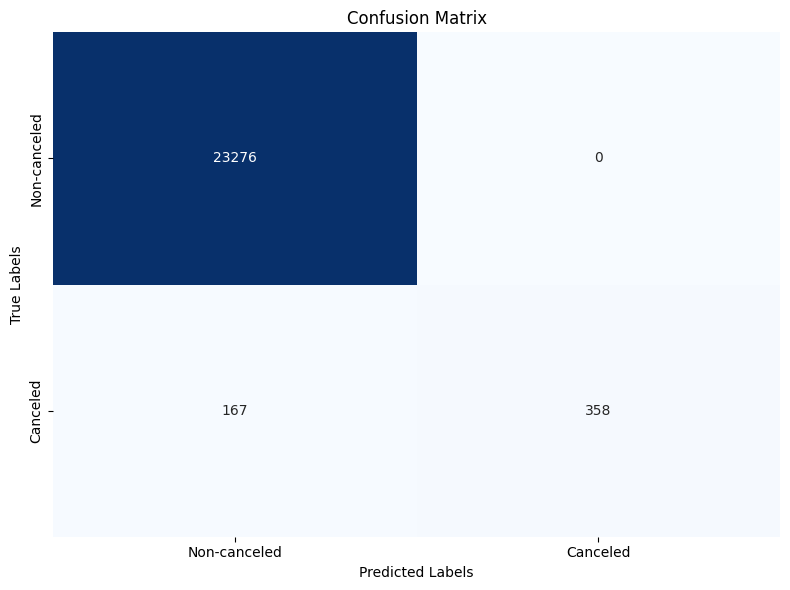

<ipython-input-58-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


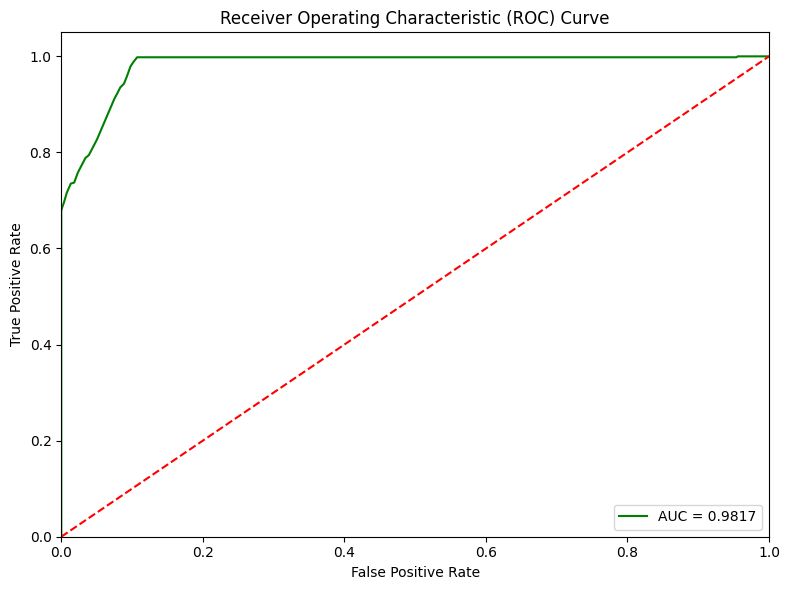

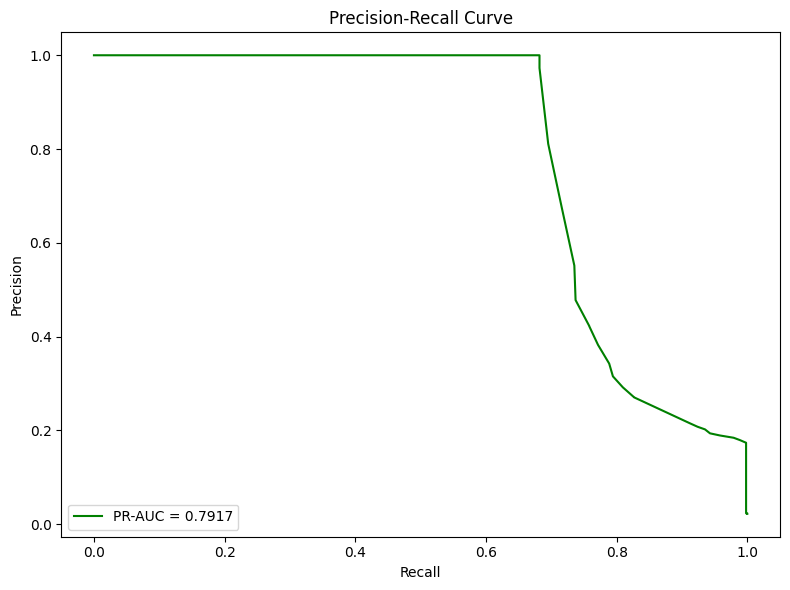

Model saved as 'best_tabnet.pkl'


In [61]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import recall_score,make_scorer
import numpy as np
from sklearn.metrics import classification_report
import joblib


# Define the parameter grid for Randomized Search
param_grid = {
    'n_d': np.arange(8, 32,8),  # Dimension of the decoder
    'n_a': np.arange(8, 32,8),  # Dimension of the attention
    'n_steps': np.arange(3, 6),  # Number of steps in the network
    'gamma': np.linspace(1.0, 2.0, 5),  # Sparsity regularization
    'lambda_sparse': [0.001, 0.005, 0.01]  # Sparsity regularization
}

# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05




# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Create a custom recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=param_grid,
    n_iter=20,
    scoring= recall_scorer,
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(X_train_scaled, y_train,
                  max_epochs=30,
                  patience=5,
                  batch_size=fixed_batch_size)  # Use fixed batch size

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Use the best hyperparameters to train on the full training data
best_params = random_search.best_params_

best_tabnet = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    optimizer_params=dict(lr=fixed_learning_rate),
    seed=42
)

# Train the model with the best parameters on the full training set

best_tabnet.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)


# Evaluate on test set
y_test_pred = best_tabnet.predict(X_test_scaled)
y_test_pred_proba = best_tabnet.predict_proba(X_test_scaled)[:, 1]



print("\nClassification Report-Test set")
print(classification_report(y_test, y_test_pred,digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)


results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/tabnet.csv', index=False)

# Save the trained model
joblib.dump(best_tabnet, '/content/drive/MyDrive/thesis/best_tabnet.pkl')
print("Model saved as 'best_tabnet.pkl'")

## 3.2 Oversampling

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.16671 |  0:00:27s
epoch 1  | loss: 0.13399 |  0:00:53s
epoch 2  | loss: 0.13004 |  0:01:20s
epoch 3  | loss: 0.12799 |  0:01:46s
epoch 4  | loss: 0.1249  |  0:02:12s
epoch 5  | loss: 0.12259 |  0:02:38s
epoch 6  | loss: 0.12303 |  0:03:05s
epoch 7  | loss: 0.11939 |  0:03:31s
epoch 8  | loss: 0.11943 |  0:03:57s
epoch 9  | loss: 0.11884 |  0:04:23s
epoch 10 | loss: 0.1182  |  0:04:50s
epoch 11 | loss: 0.11878 |  0:05:17s
epoch 12 | loss: 0.11781 |  0:05:43s
epoch 13 | loss: 0.11902 |  0:06:10s
epoch 14 | loss: 0.11808 |  0:06:36s
epoch 15 | loss: 0.1182  |  0:07:02s
epoch 16 | loss: 0.11738 |  0:07:28s
epoch 17 | loss: 0.11791 |  0:07:55s
epoch 18 | loss: 0.11699 |  0:08:21s
epoch 19 | loss: 0.11828 |  0:08:48s
epoch 20 | loss: 0.11923 |  0:09:14s
epoch 21 | loss: 0.11758 |  0:09:41s
epoch 22 | loss: 0.11752 |  0:10:07s
epoch 23 | loss: 0.11725 |  0:10:33s
epoch 24 | loss: 0.11612 |  0:11:00s
epoch 25 | loss: 0.11769 |  0:11:27s
epoch 26 | loss: 0.11834 |  0:11:54s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report on Test Set:
              precision    recall  f1-score   support

           0     1.0000    0.8929    0.9434     23276
           1     0.1739    1.0000    0.2963       525

    accuracy                         0.8952     23801
   macro avg     0.5869    0.9464    0.6198     23801
weighted avg     0.9818    0.8952    0.9291     23801



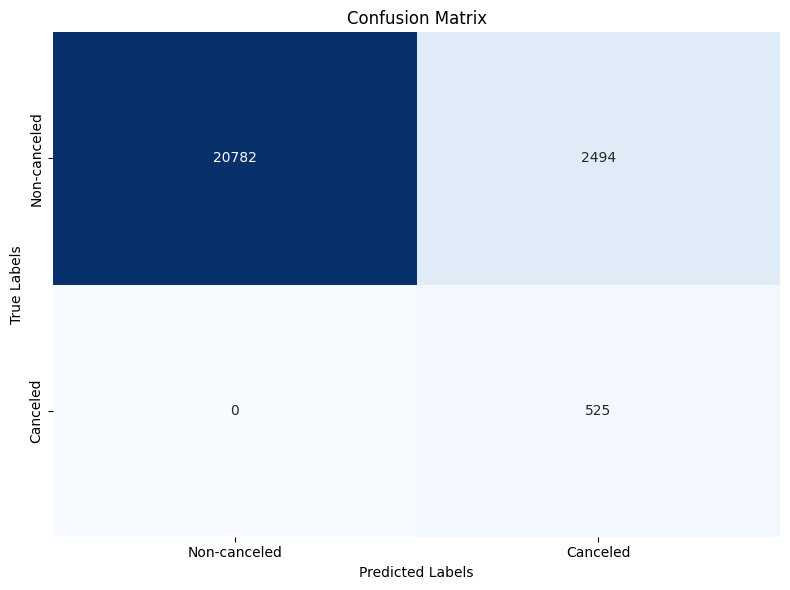

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


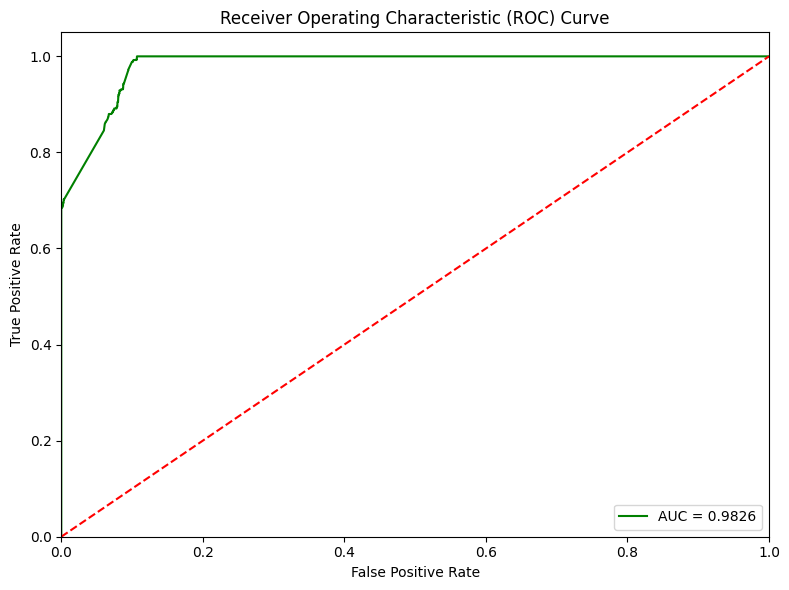

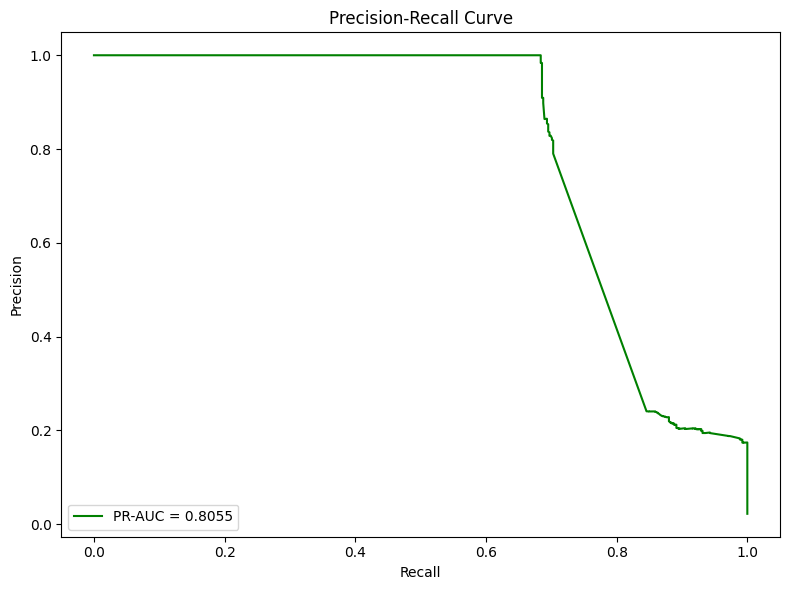

Model saved as 'best_tabnet_smote.pkl'


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import torch
from sklearn.metrics import classification_report
import joblib

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Fixed parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Random Search for TabNet
param_grid = {
    'tabnet__n_d': np.arange(8, 32, 8),  # Number of decision steps
    'tabnet__n_a': np.arange(8, 32, 8),  # Attention embedding size
    'tabnet__n_steps': np.arange(4, 10),  # Number of steps in the network
    'tabnet__gamma': np.linspace(0.5, 1.5, 5),  # Sparsity regularization
    'tabnet__lambda_sparse': [0.001, 0.005,0.01,0.05],  # Sparsity coefficient
}

# Initialize SMOTE and TabNet in a pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tabnet', TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0))
])

# Use TimeSeriesSplit for time-series data cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='recall',
    cv=tscv,
    random_state=42,
    verbose=0,
    n_jobs=-1
)

# Perform the Random Search
random_search.fit(X_train_scaled, y_train,
                  tabnet__max_epochs=30,
                  tabnet__patience=5,
                  tabnet__batch_size=fixed_batch_size)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best validation recall: {random_search.best_score_:.4f}")

# Use the best hyperparameters to train on the full training data
best_tabnet_smote = random_search.best_estimator_


best_tabnet_smote.fit(
    X_train_scaled, y_train,
    tabnet__eval_set=[(X_val_scaled, y_val)],
    tabnet__eval_name=["val"],
    tabnet__eval_metric=["logloss"],
    tabnet__max_epochs=50,
    tabnet__patience=10,
    tabnet__batch_size=fixed_batch_size
)



y_test_pred = best_tabnet_smote.predict(X_test_scaled)
y_test_pred_proba = best_tabnet_smote.predict_proba(X_test_scaled)[:, 1]


print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred,digits=4))


# Call the function to plot CM, ROC, and PR curves
plot_cm_roc_pr(y_test,y_test_pred, y_test_pred_proba)



results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})

# Save to a single CSV file
results_df.to_csv('/content/drive/MyDrive/thesis/tabnet_smote.csv', index=False)

# Save the trained model
joblib.dump(best_tabnet_smote, 'best_tabnet_smote.pkl')
print("Model saved as 'best_tabnet_smote.pkl'")

# 4.Hybrid model

## 4.1.Cascade Framework

###4.1.1.RF with TabNet

use probabilities and label

In [ ]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import pandas as pd
import joblib
import random

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained rf model parameters
best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")
print(f"Model parameters: {best_rf.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_rf_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_rf_label = np.zeros((X_train_scaled.shape[0], 1))
val_rf_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_rf_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_rf_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_rf_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new RandomForest model for this fold
    rf_fold = RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        class_weight=best_rf.class_weight,
        random_state=42
    )
    rf_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_rf_proba[val_idx] = rf_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_rf_label[val_idx] = rf_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_rf_proba[:, fold] = rf_fold.predict_proba(X_val_scaled)[:, 1]
    val_rf_label[:, fold] = rf_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_rf_proba[:, fold] = rf_fold.predict_proba(X_test_scaled)[:, 1]
    test_rf_label[:, fold] = rf_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_rf_proba = val_rf_proba.mean(axis=1).reshape(-1, 1)
final_test_rf_proba = test_rf_proba.mean(axis=1).reshape(-1, 1)
final_val_rf_label = val_rf_label.mean(axis=1).round().reshape(-1, 1)
final_test_rf_label = test_rf_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with RF outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_rf_proba, oof_train_rf_label))
X_val_combined = np.hstack((X_val_scaled, final_val_rf_proba, final_val_rf_label))
X_test_combined = np.hstack((X_test_scaled, final_test_rf_proba, final_test_rf_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)


# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = {
    'n_d': np.arange(8, 32,8),
    'n_a': np.arange(8, 32,8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose= 0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
RFwithTabnetCascade = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

RFwithTabnetCascade.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = RFwithTabnetCascade.predict(X_test_tabnet)
y_test_pred_proba = RFwithTabnetCascade.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetCascade.csv', index=False)

# Save the trained TabNet model
joblib.dump(RFwithTabnetCascade, '/content/drive/MyDrive/thesis/RFwithTabnetCascade.pkl')
print("Model saved as 'RFwithTabnetCascade.pkl'")

Loaded saved RandomForest model.
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.05668 |  0:00:07s
epoch 1  | loss: 0.0384  |  0:00:15s
epoch 2  | loss: 0.03777 |  0:00:23s
epoch 3  | loss: 0.03314 |  0:00:31s
epoch 4  | loss: 0.03301 |  0:00:38s
epoch 5  | loss: 0.03303 |  0:00:46s
epoch 6  | loss: 0.03314 |  0:00:54s
epoch 7  | loss: 0.03317 |  0:01:01s
epoch 8  | loss: 0.03316 |  0:01:09s
epoch 9  | loss: 0.03294 |  0:01:17s
epoch 10 | loss: 0.03288 |  0:01:25s
epoch 11 | loss: 0.0328  |  0:01:32s
epoch 12 | loss: 0.03293 |  0:01:40s
epoch 13 | loss: 0.03299 |  0:01:48s
epoch 14 | loss: 0.03287 |  0:01:56s
epoch 15 | loss: 0.03287 |  0:02:04s
epoch 16 | loss: 0.03285 |  0:02:12s
epoch 17 | loss: 0.03307 |  0:02:19s
epoch 18 | loss: 0.03292 |  0:02:27s
epoch 19 | loss: 0.03282 |  0:02:35s
epoch 20 | loss: 0.03288 |  0:02:43s
epoch 21 | loss: 0.03298 |  0:02:51s
epoch 22 | loss: 0.03285 |  0:02:59s
epoch 23 | loss: 0.03286 |  0:03:07s
epoch 24 | loss: 0.03295 |  0:03:15s
epoch 25 | loss: 0.03301 |  0:03:22s
epoch 26 | loss: 0.03276 |  0:03:30s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.06371 | val_logloss: 0.03225 |  0:00:08s
epoch 1  | loss: 0.04045 | val_logloss: 0.03173 |  0:00:17s
epoch 2  | loss: 0.03584 | val_logloss: 0.02935 |  0:00:26s
epoch 3  | loss: 0.03386 | val_logloss: 0.03046 |  0:00:34s
epoch 4  | loss: 0.0334  | val_logloss: 0.02916 |  0:00:43s
epoch 5  | loss: 0.03326 | val_logloss: 0.03069 |  0:00:52s
epoch 6  | loss: 0.0329  | val_logloss: 0.02919 |  0:01:01s
epoch 7  | loss: 0.03303 | val_logloss: 0.02945 |  0:01:10s
epoch 8  | loss: 0.03305 | val_logloss: 0.02918 |  0:01:18s
epoch 9  | loss: 0.03282 | val_logloss: 0.03181 |  0:01:27s
epoch 10 | loss: 0.03279 | val_logloss: 0.02957 |  0:01:36s
epoch 11 | loss: 0.03279 | val_logloss: 0.02906 |  0:01:45s
epoch 12 | loss: 0.03274 | val_logloss: 0.02886 |  0:01:53s
epoch 13 | loss: 0.03261 | val_logloss: 0.03063 |  0:02:02s
epoch 14 | loss: 0.03271 | val_logloss: 0.02936 |  0:02:11s
epoch 15 | loss: 0.03272 | val_logloss: 0.02951 |  0:02:19s
epoch 16 | loss: 0.03257 | val_logloss: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801

Model saved as 'RFwithTabnetCascade.pkl'


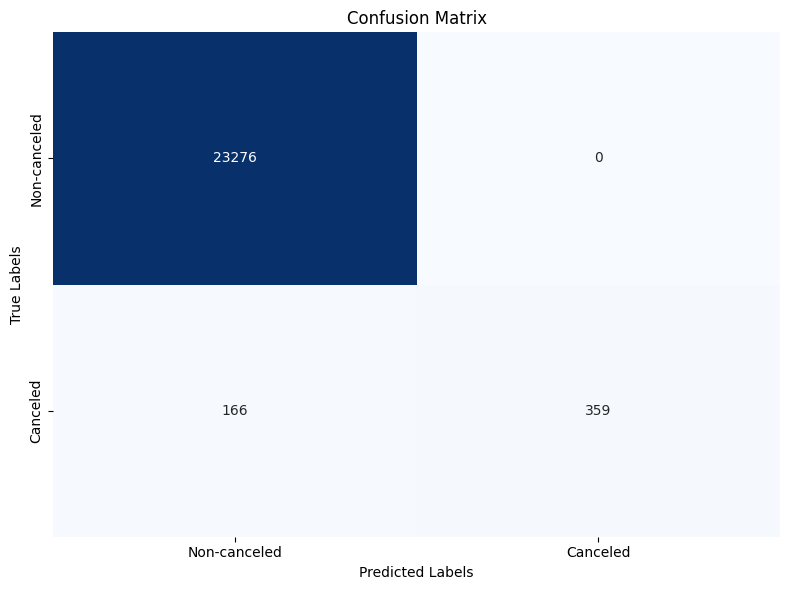

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


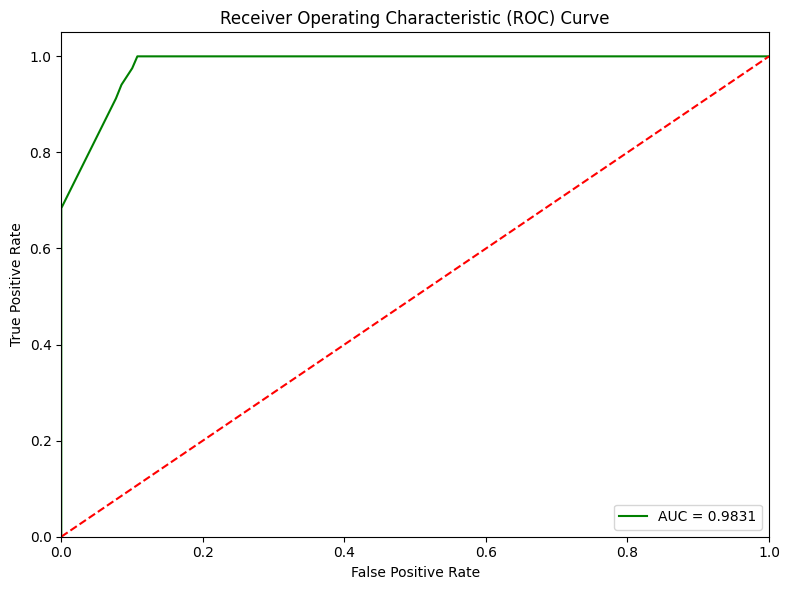

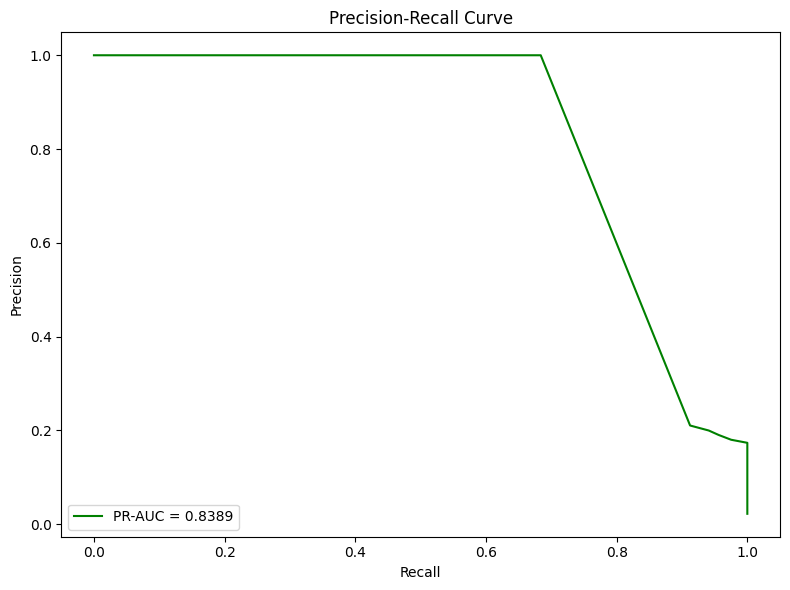

In [ ]:

file_path = '/content/drive/MyDrive/thesis/RFwithTabnetCascade.csv'
data = pd.read_csv(file_path)


true_labels = data['True_class']
predicted_labels = data['Predicted_Class']
proba = data['Predicted_Probability']

plot_cm_roc_pr(true_labels, predicted_labels ,proba)

only use probability

Loaded saved RandomForest model.
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'n_steps': 3, 'n_d': 24, 'n_a': 8, 'lambda_sparse': 0.005, 'gamma': 1.0}


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.0611  | val_logloss: 0.03159 |  0:00:07s
epoch 1  | loss: 0.04087 | val_logloss: 0.02929 |  0:00:15s
epoch 2  | loss: 0.0381  | val_logloss: 0.02893 |  0:00:23s
epoch 3  | loss: 0.03602 | val_logloss: 0.02899 |  0:00:31s
epoch 4  | loss: 0.03407 | val_logloss: 0.02888 |  0:00:39s
epoch 5  | loss: 0.03344 | val_logloss: 0.02891 |  0:00:47s
epoch 6  | loss: 0.03314 | val_logloss: 0.0302  |  0:00:55s
epoch 7  | loss: 0.03313 | val_logloss: 0.02932 |  0:01:03s
epoch 8  | loss: 0.03301 | val_logloss: 0.02888 |  0:01:11s
epoch 9  | loss: 0.03309 | val_logloss: 0.02919 |  0:01:20s
epoch 10 | loss: 0.03294 | val_logloss: 0.02933 |  0:01:28s
epoch 11 | loss: 0.03305 | val_logloss: 0.0294  |  0:01:36s
epoch 12 | loss: 0.03279 | val_logloss: 0.0289  |  0:01:44s
epoch 13 | loss: 0.03299 | val_logloss: 0.02925 |  0:01:52s
epoch 14 | loss: 0.03288 | val_logloss: 0.0292  |  0:02:00s

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_logloss = 0.02888


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801



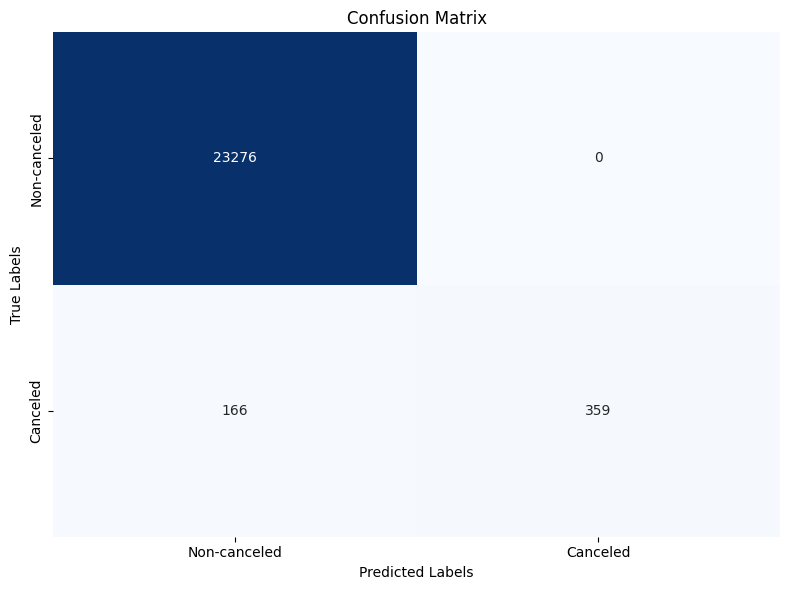

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


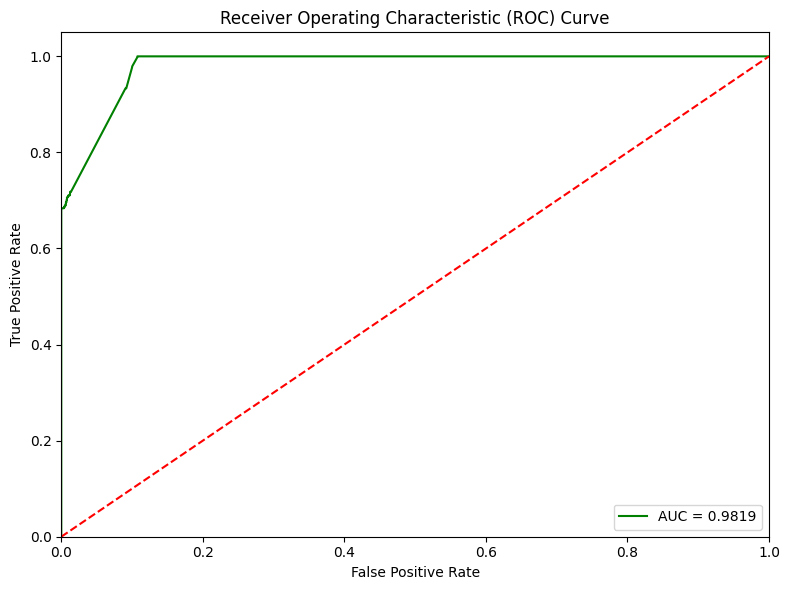

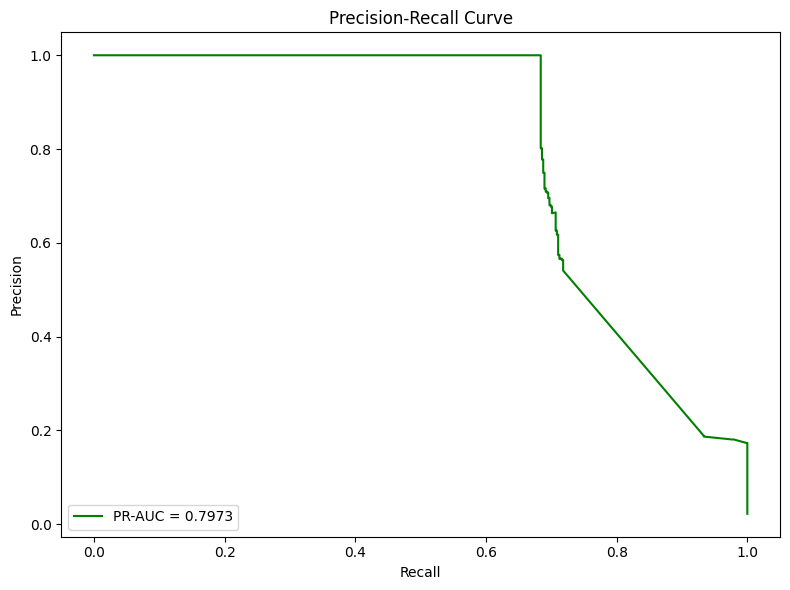

Model saved as 'RFwithTabnetCascade_updated.pkl'


In [ ]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import pandas as pd
import joblib
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained rf model parameters
best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")
print(f"Model parameters: {best_rf.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_rf_proba = np.zeros((X_train_scaled.shape[0], 1))
val_rf_proba = np.zeros((X_val_scaled.shape[0], n_splits))
test_rf_proba = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new RandomForest model for this fold
    rf_fold = RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        class_weight=best_rf.class_weight,
        random_state=42
    )
    rf_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities) for the training set
    oof_train_rf_proba[val_idx] = rf_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)

    # Generate predictions (probabilities) for the validation set
    val_rf_proba[:, fold] = rf_fold.predict_proba(X_val_scaled)[:, 1]

    # Generate predictions (probabilities) for the test set
    test_rf_proba[:, fold] = rf_fold.predict_proba(X_test_scaled)[:, 1]

# Average predictions across all folds
final_val_rf_proba = val_rf_proba.mean(axis=1).reshape(-1, 1)
final_test_rf_proba = test_rf_proba.mean(axis=1).reshape(-1, 1)

# Combine original features with RF outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_rf_proba))
X_val_combined = np.hstack((X_val_scaled, final_val_rf_proba))
X_test_combined = np.hstack((X_test_scaled, final_test_rf_proba))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)


# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = {
    'n_d': np.arange(8, 32, 8),
    'n_a': np.arange(8, 32, 8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate), verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
RFwithTabnetCascade_onlyprob = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

RFwithTabnetCascade_onlyprob.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = RFwithTabnetCascade_onlyprob.predict(X_test_tabnet)
y_test_pred_proba = RFwithTabnetCascade_onlyprob.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetCascade_onlyprob.csv', index=False)

# Save the trained TabNet model
joblib.dump(RFwithTabnetCascade_onlyprob, '/content/drive/MyDrive/thesis/RFwithTabnetCascade_onlyprob.pkl')
print("Model saved as 'RFwithTabnetCascade_updated.pkl'")

### 4.1.2.XGBoost with TabNet

use probability and label

In [ ]:
import numpy as np
import torch
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import pandas as pd
import joblib
import random

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained XGB model parameters
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGB model.")
print(f"Model parameters: {best_xgb.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_xgb_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_xgb_label = np.zeros((X_train_scaled.shape[0], 1))
val_xgb_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_xgb_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_xgb_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_xgb_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new XGBClassifier for this fold
    xgb_fold = XGBClassifier(
        n_estimators=best_xgb.n_estimators,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    )
    xgb_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_xgb_proba[val_idx] = xgb_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_xgb_label[val_idx] = xgb_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_xgb_proba[:, fold] = xgb_fold.predict_proba(X_val_scaled)[:, 1]
    val_xgb_label[:, fold] = xgb_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_xgb_proba[:, fold] = xgb_fold.predict_proba(X_test_scaled)[:, 1]
    test_xgb_label[:, fold] = xgb_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_xgb_proba = val_xgb_proba.mean(axis=1).reshape(-1, 1)
final_test_xgb_proba = test_xgb_proba.mean(axis=1).reshape(-1, 1)
final_val_xgb_label = val_xgb_label.mean(axis=1).round().reshape(-1, 1)
final_test_xgb_label = test_xgb_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with XGB outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_xgb_proba, oof_train_xgb_label))
X_val_combined = np.hstack((X_val_scaled, final_val_xgb_proba, final_val_xgb_label))
X_test_combined = np.hstack((X_test_scaled, final_test_xgb_proba, final_test_xgb_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)

# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = param_grid = {
    'n_d': np.arange(8, 32,8),
    'n_a': np.arange(8, 32,8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose= 0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
XGBwithTabnetCascade = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

XGBwithTabnetCascade.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = XGBwithTabnetCascade.predict(X_test_tabnet)
y_test_pred_proba = XGBwithTabnetCascade.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetCascade.csv', index=False)

# Save the trained TabNet model
joblib.dump(XGBwithTabnetCascade, '/content/drive/MyDrive/thesis/XGBwithTabnetCascade.pkl')
print("Model saved as 'XGBwithTabnetCascade.pkl'")

Loaded saved XGB model.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 105, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 1.5, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
Fold 1/5
Fold 2/5
Fold 3/

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.07668 |  0:00:09s
epoch 1  | loss: 0.04797 |  0:00:18s
epoch 2  | loss: 0.04021 |  0:00:27s
epoch 3  | loss: 0.0393  |  0:00:36s
epoch 4  | loss: 0.03881 |  0:00:45s
epoch 5  | loss: 0.03899 |  0:00:54s
epoch 6  | loss: 0.03872 |  0:01:03s
epoch 7  | loss: 0.03897 |  0:01:12s
epoch 8  | loss: 0.03861 |  0:01:21s
epoch 9  | loss: 0.03858 |  0:01:30s
epoch 10 | loss: 0.03865 |  0:01:39s
epoch 11 | loss: 0.03875 |  0:01:48s
epoch 12 | loss: 0.0386  |  0:01:57s
epoch 13 | loss: 0.04009 |  0:02:06s
epoch 14 | loss: 0.03875 |  0:02:15s
epoch 15 | loss: 0.03842 |  0:02:24s
epoch 16 | loss: 0.03845 |  0:02:33s
epoch 17 | loss: 0.03855 |  0:02:42s
epoch 18 | loss: 0.05376 |  0:02:51s
epoch 19 | loss: 0.05574 |  0:03:00s
epoch 20 | loss: 0.05572 |  0:03:09s
epoch 21 | loss: 0.05581 |  0:03:18s
epoch 22 | loss: 0.05582 |  0:03:27s
epoch 23 | loss: 0.05572 |  0:03:36s
epoch 24 | loss: 0.05567 |  0:03:45s
epoch 25 | loss: 0.05589 |  0:03:54s
epoch 26 | loss: 0.05576 |  0:04:03s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.07406 | val_logloss: 0.04124 |  0:00:10s
epoch 1  | loss: 0.04871 | val_logloss: 0.03531 |  0:00:20s
epoch 2  | loss: 0.04095 | val_logloss: 0.03191 |  0:00:30s
epoch 3  | loss: 0.04758 | val_logloss: 0.03173 |  0:00:40s
epoch 4  | loss: 0.03526 | val_logloss: 0.02975 |  0:00:50s
epoch 5  | loss: 0.03354 | val_logloss: 0.02899 |  0:01:00s
epoch 6  | loss: 0.03331 | val_logloss: 0.02935 |  0:01:10s
epoch 7  | loss: 0.03364 | val_logloss: 0.02986 |  0:01:21s
epoch 8  | loss: 0.03315 | val_logloss: 0.03025 |  0:01:31s
epoch 9  | loss: 0.03317 | val_logloss: 0.02907 |  0:01:41s
epoch 10 | loss: 0.03317 | val_logloss: 0.02944 |  0:01:51s
epoch 11 | loss: 0.03313 | val_logloss: 0.02883 |  0:02:01s
epoch 12 | loss: 0.03302 | val_logloss: 0.02961 |  0:02:11s
epoch 13 | loss: 0.03297 | val_logloss: 0.02897 |  0:02:21s
epoch 14 | loss: 0.03306 | val_logloss: 0.02955 |  0:02:31s
epoch 15 | loss: 0.03288 | val_logloss: 0.02896 |  0:02:41s
epoch 16 | loss: 0.03277 | val_logloss: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801

Model saved as 'XGBwithTabnetCascade.pkl'


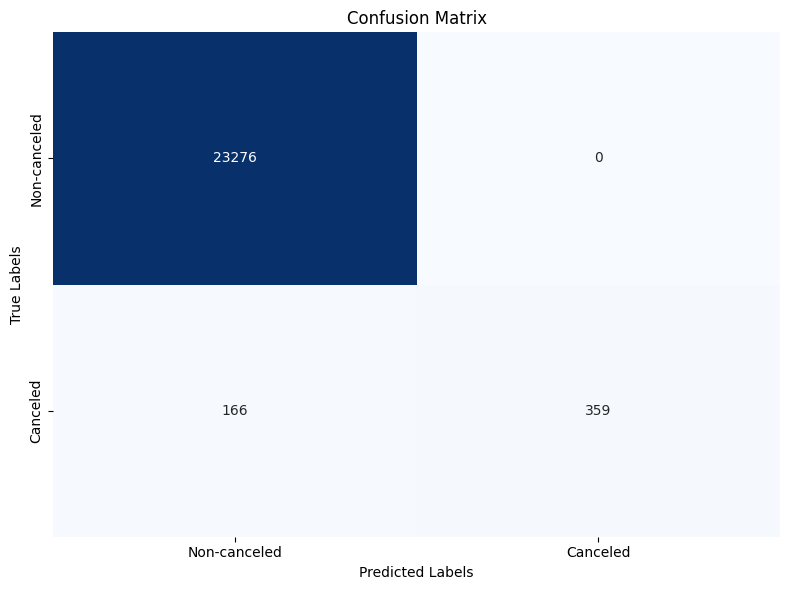

<ipython-input-62-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


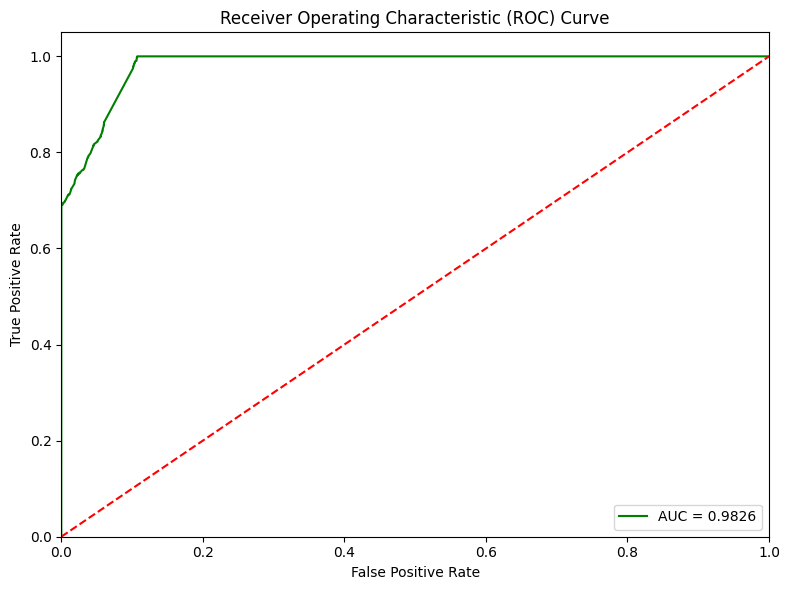

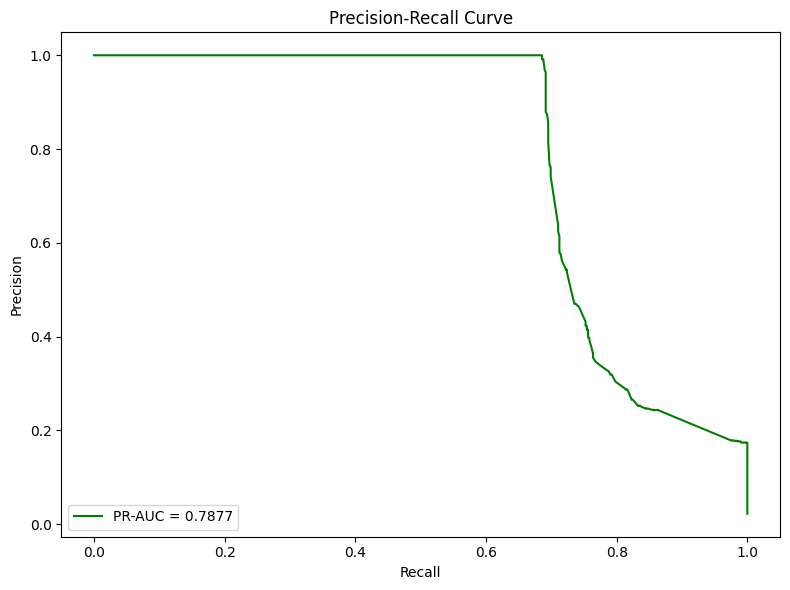

In [ ]:
# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

only use probabiliyu

Loaded saved XGB model.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 105, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 1.5, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
Fold 1/5
Fold 2/5
Fold 3/

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'n_steps': 4, 'n_d': 24, 'n_a': 16, 'lambda_sparse': 0.01, 'gamma': 1.0}


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.07956 | val_logloss: 0.03248 |  0:00:09s
epoch 1  | loss: 0.04546 | val_logloss: 0.02986 |  0:00:19s
epoch 2  | loss: 0.03869 | val_logloss: 0.03083 |  0:00:30s
epoch 3  | loss: 0.03531 | val_logloss: 0.02884 |  0:00:40s
epoch 4  | loss: 0.03394 | val_logloss: 0.03225 |  0:00:50s
epoch 5  | loss: 0.03405 | val_logloss: 0.02996 |  0:01:00s
epoch 6  | loss: 0.03383 | val_logloss: 0.02938 |  0:01:09s
epoch 7  | loss: 0.03357 | val_logloss: 0.03    |  0:01:19s
epoch 8  | loss: 0.03365 | val_logloss: 0.03102 |  0:01:30s
epoch 9  | loss: 0.03331 | val_logloss: 0.03001 |  0:01:40s
epoch 10 | loss: 0.03328 | val_logloss: 0.02947 |  0:01:50s
epoch 11 | loss: 0.03306 | val_logloss: 0.02971 |  0:02:00s
epoch 12 | loss: 0.03307 | val_logloss: 0.02922 |  0:02:10s
epoch 13 | loss: 0.03277 | val_logloss: 0.03025 |  0:02:20s

Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_logloss = 0.02884


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9928    1.0000    0.9964     23276
           1     1.0000    0.6800    0.8095       525

    accuracy                         0.9929     23801
   macro avg     0.9964    0.8400    0.9030     23801
weighted avg     0.9930    0.9929    0.9923     23801



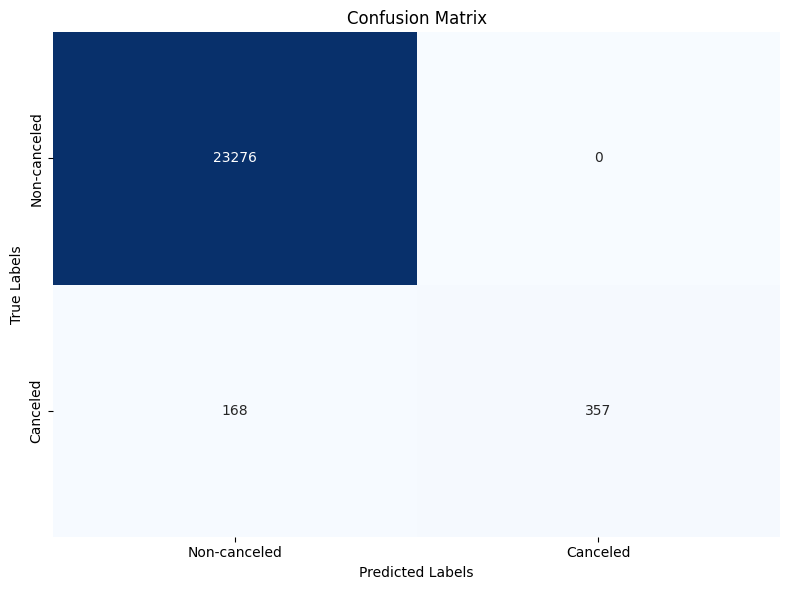

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


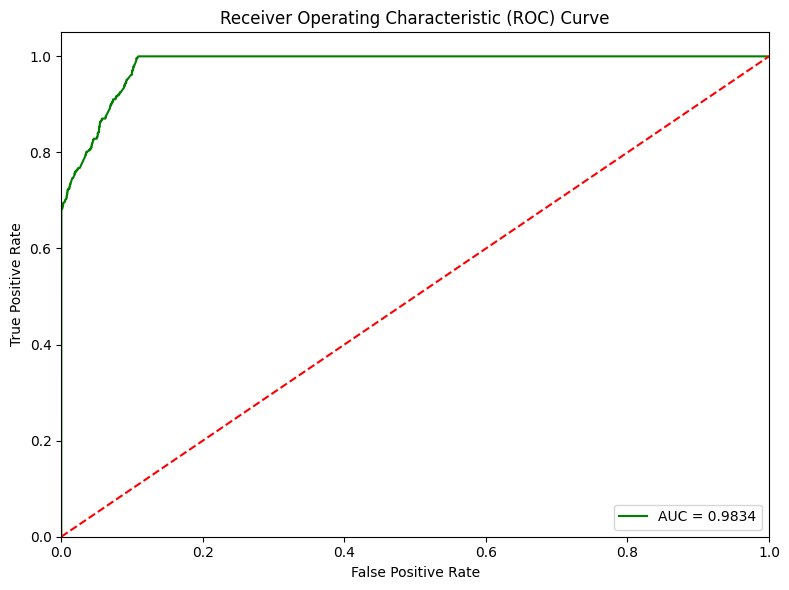

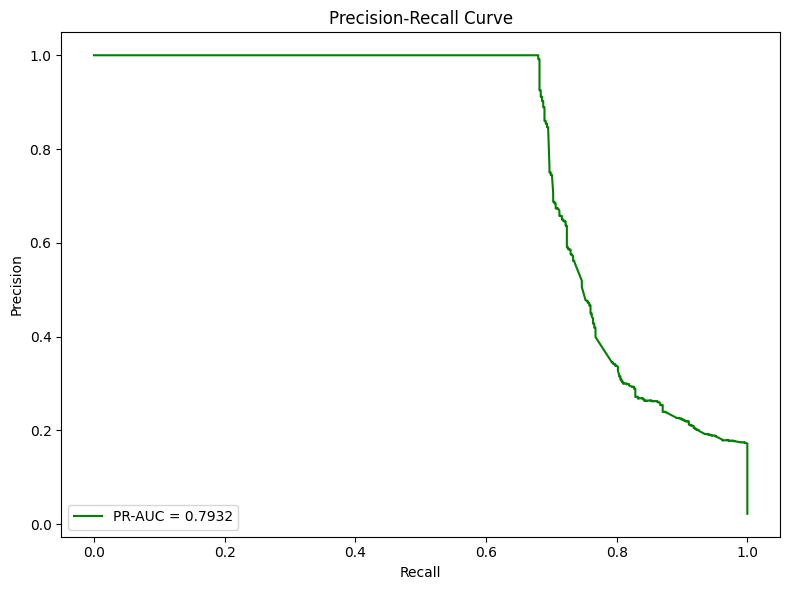

Model saved as 'XGBwithTabnetCascade_onlyproba.pkl'


In [ ]:
import numpy as np
import torch
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import pandas as pd
import joblib
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained XGB model parameters
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGB model.")
print(f"Model parameters: {best_xgb.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (probabilities) and predictions for val and test sets
oof_train_xgb_proba = np.zeros((X_train_scaled.shape[0], 1))
val_xgb_proba = np.zeros((X_val_scaled.shape[0], n_splits))
test_xgb_proba = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new XGBClassifier for this fold
    xgb_fold = XGBClassifier(
        n_estimators=best_xgb.n_estimators,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    )
    xgb_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities) for the training set
    oof_train_xgb_proba[val_idx] = xgb_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)

    # Generate predictions (probabilities) for the validation set
    val_xgb_proba[:, fold] = xgb_fold.predict_proba(X_val_scaled)[:, 1]

    # Generate predictions (probabilities) for the test set
    test_xgb_proba[:, fold] = xgb_fold.predict_proba(X_test_scaled)[:, 1]

# Average predictions across all folds
final_val_xgb_proba = val_xgb_proba.mean(axis=1).reshape(-1, 1)
final_test_xgb_proba = test_xgb_proba.mean(axis=1).reshape(-1, 1)

# Combine original features with XGB outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_xgb_proba))
X_val_combined = np.hstack((X_val_scaled, final_val_xgb_proba))
X_test_combined = np.hstack((X_test_scaled, final_test_xgb_proba))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)

# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = {
    'n_d': np.arange(8, 32, 8),
    'n_a': np.arange(8, 32, 8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate), verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
XGBwithTabnetCascade_onlyproba = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

XGBwithTabnetCascade_onlyproba.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = XGBwithTabnetCascade_onlyproba.predict(X_test_tabnet)
y_test_pred_proba = XGBwithTabnetCascade_onlyproba.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetCascade_onlyproba.csv', index=False)

# Save the trained TabNet model
joblib.dump(XGBwithTabnetCascade_onlyproba, '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_onlyproba.pkl')
print("Model saved as 'XGBwithTabnetCascade_onlyproba.pkl'")

###4.1.3 RF with TabNet-oversampling




Loaded saved RandomForest model.
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'tabnet__n_steps': 6, 'tabnet__n_d': 16, 'tabnet__n_a': 16, 'tabnet__lambda_sparse': 0.005, 'tabnet__gamma': 0.75}

Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_logloss = 0.1


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report-Test set
              precision    recall  f1-score   support

           0     0.9975    0.9356    0.9655     23276
           1     0.2386    0.8952    0.3768       525

    accuracy                         0.9347     23801
   macro avg     0.6180    0.9154    0.6711     23801
weighted avg     0.9807    0.9347    0.9525     23801



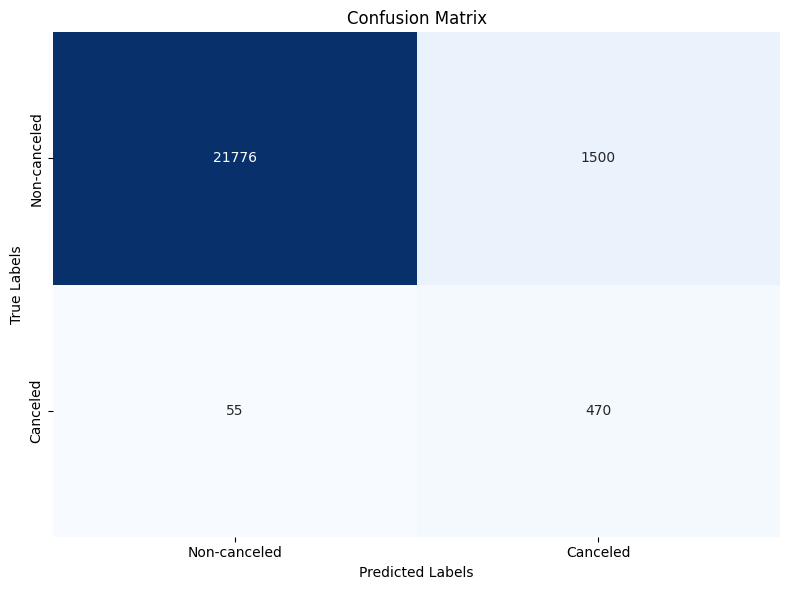

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


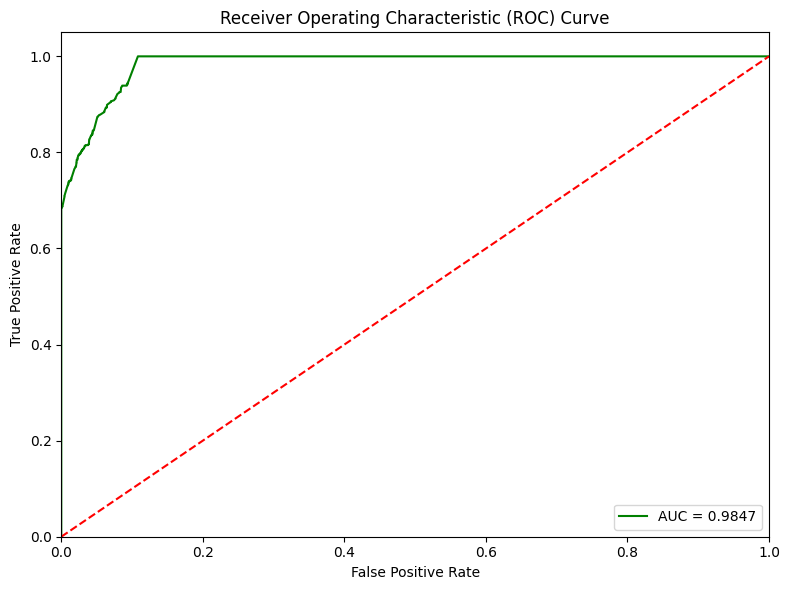

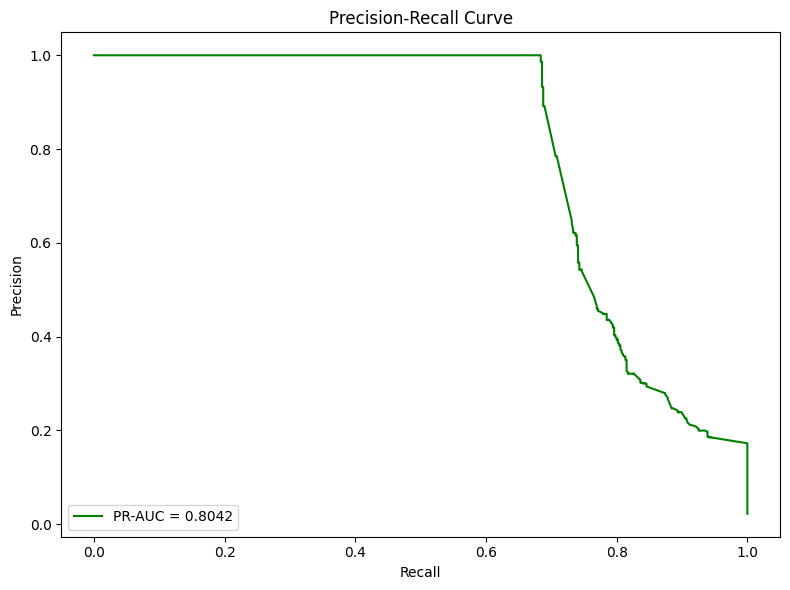

Model saved as 'RFwithTabnetCascade_smote.pkl'


In [ ]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import random
import joblib

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained rf model parameters
best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")
print(f"Model parameters: {best_rf.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_rf_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_rf_label = np.zeros((X_train_scaled.shape[0], 1))
val_rf_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_rf_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_rf_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_rf_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new RandomForest model for this fold
    rf_fold = RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        class_weight=best_rf.class_weight,
        random_state=42
    )
    rf_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_rf_proba[val_idx] = rf_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_rf_label[val_idx] = rf_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_rf_proba[:, fold] = rf_fold.predict_proba(X_val_scaled)[:, 1]
    val_rf_label[:, fold] = rf_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_rf_proba[:, fold] = rf_fold.predict_proba(X_test_scaled)[:, 1]
    test_rf_label[:, fold] = rf_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_rf_proba = val_rf_proba.mean(axis=1).reshape(-1, 1)
final_test_rf_proba = test_rf_proba.mean(axis=1).reshape(-1, 1)
final_val_rf_label = val_rf_label.mean(axis=1).round().reshape(-1, 1)
final_test_rf_label = test_rf_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with RF outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_rf_proba, oof_train_rf_label))
X_val_combined = np.hstack((X_val_scaled, final_val_rf_proba, final_val_rf_label))
X_test_combined = np.hstack((X_test_scaled, final_test_rf_proba, final_test_rf_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)


# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for RandomizedSearchCV
tabnet_param_grid =  {
    'tabnet__n_d': np.arange(16, 41, 8),
    'tabnet__n_a': np.arange(16, 41, 8),
    'tabnet__n_steps': np.arange(4, 10),
    'tabnet__gamma': np.linspace(0.5, 1.5, 5),
    'tabnet__lambda_sparse': [0.001, 0.005,0.01,0.05],
}

param_grid = {

}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(
    seed=42,
    optimizer_params=dict(lr=fixed_learning_rate),
    verbose=0

)

# Create a pipeline with SMOTE and TabNet
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tabnet', tabnet)
])

# Use TimeSeriesSplit for time-series cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Create a custom recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=recall_scorer,
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    tabnet__max_epochs=30,
    tabnet__patience=5,
    tabnet__batch_size=fixed_batch_size  # Use fixed batch size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best parameters to train on the full training data
RFwithTabnetCascade_smote = random_search.best_estimator_

# Fit the final model on the full training set
RFwithTabnetCascade_smote.fit(
    X_train_tabnet, y_train,
    tabnet__eval_set=[(X_val_tabnet, y_val)],
    tabnet__eval_name=["val"],
    tabnet__eval_metric=["logloss"],
    tabnet__max_epochs=50,
    tabnet__patience=10,
    tabnet__batch_size=fixed_batch_size
)



# Evaluate on test set
y_test_pred = RFwithTabnetCascade_smote.predict(X_test_tabnet)
y_test_pred_proba = RFwithTabnetCascade_smote.predict_proba(X_test_tabnet)[:, 1]


print("\nClassification Report-Test set")
print(classification_report(y_test, y_test_pred,digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetCascade_smote.csv', index=False)

# Save the trained model
joblib.dump(RFwithTabnetCascade_smote, '/content/drive/MyDrive/thesis/RFwithTabnetCascade_smote.pkl')
print("Model saved as 'RFwithTabnetCascade_smote.pkl'")


###4.1.4 XGBoost with TabNet-oversampling

Loaded saved XGB model.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 105, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 1.5, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}
Fold 1/5
Fold 2/5
Fold 3/

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'tabnet__n_steps': 6, 'tabnet__n_d': 16, 'tabnet__n_a': 16, 'tabnet__lambda_sparse': 0.005, 'tabnet__gamma': 0.75}

Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_logloss = 0.10676


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report-Test
              precision    recall  f1-score   support

           0     0.9992    0.9031    0.9487     23276
           1     0.1841    0.9695    0.3094       525

    accuracy                         0.9045     23801
   macro avg     0.5917    0.9363    0.6291     23801
weighted avg     0.9813    0.9045    0.9346     23801



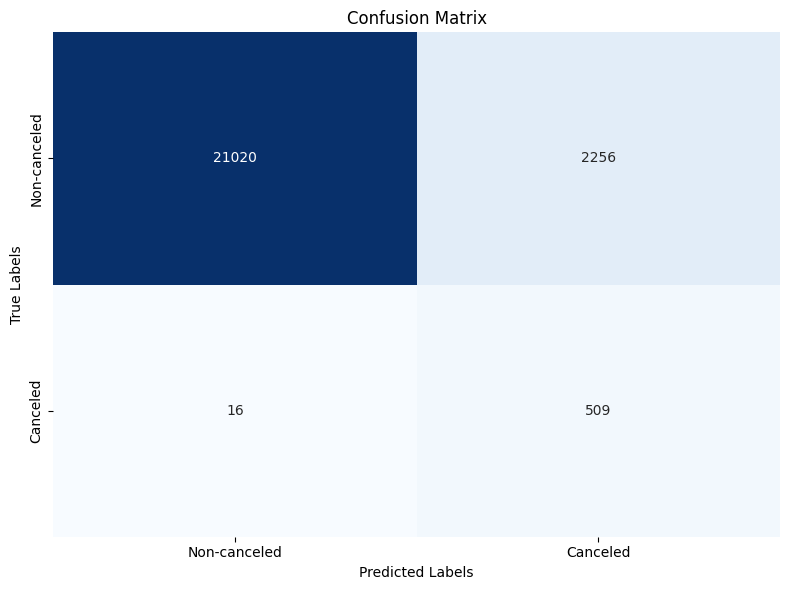

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


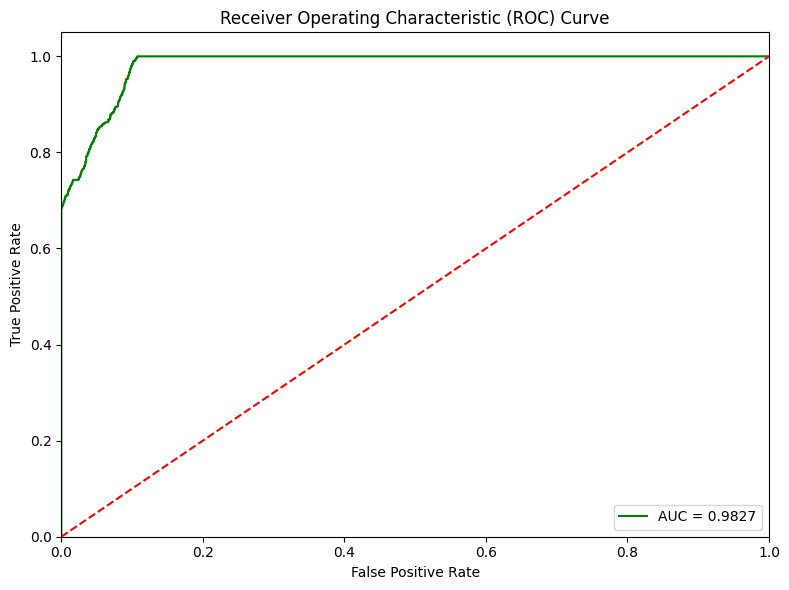

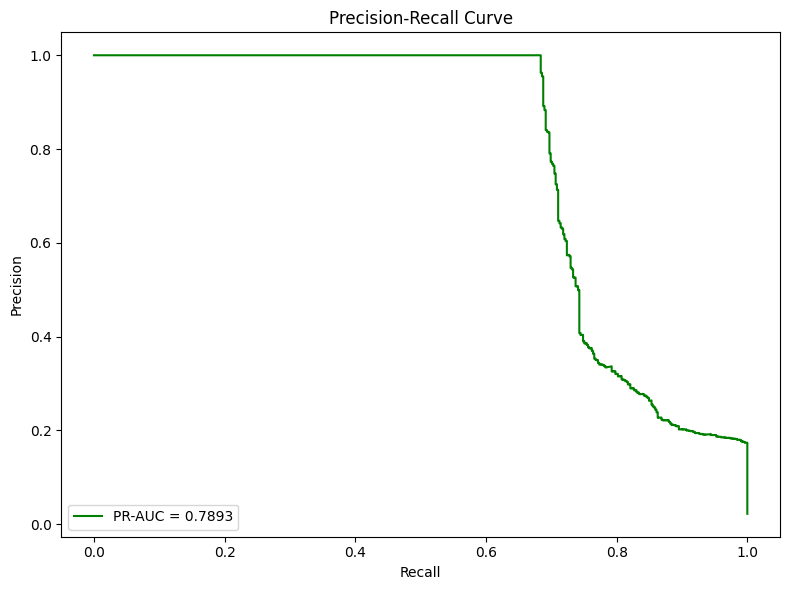

Model saved as 'XGBwithTabnetCascade_smote.pkl'


In [ ]:
import numpy as np
import torch
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, make_scorer
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import joblib
import random

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load trained XGB model parameters
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGB model.")
print(f"Model parameters: {best_xgb.get_params()}")

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_xgb_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_xgb_label = np.zeros((X_train_scaled.shape[0], 1))
val_xgb_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_xgb_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_xgb_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_xgb_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new XGBClassifier for this fold
    xgb_fold = XGBClassifier(
        n_estimators=best_xgb.n_estimators,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    )
    xgb_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_xgb_proba[val_idx] = xgb_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_xgb_label[val_idx] = xgb_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_xgb_proba[:, fold] = xgb_fold.predict_proba(X_val_scaled)[:, 1]
    val_xgb_label[:, fold] = xgb_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_xgb_proba[:, fold] = xgb_fold.predict_proba(X_test_scaled)[:, 1]
    test_xgb_label[:, fold] = xgb_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_xgb_proba = val_xgb_proba.mean(axis=1).reshape(-1, 1)
final_test_xgb_proba = test_xgb_proba.mean(axis=1).reshape(-1, 1)
final_val_xgb_label = val_xgb_label.mean(axis=1).round().reshape(-1, 1)
final_test_xgb_label = test_xgb_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with XGB outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_xgb_proba, oof_train_xgb_label))
X_val_combined = np.hstack((X_val_scaled, final_val_xgb_proba, final_val_xgb_label))
X_test_combined = np.hstack((X_test_scaled, final_test_xgb_proba, final_test_xgb_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)


# Set fixed values for TabNet parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for RandomizedSearchCV
tabnet_param_grid =  {
    'tabnet__n_d': np.arange(16, 41, 8),
    'tabnet__n_a': np.arange(16, 41, 8),
    'tabnet__n_steps': np.arange(4, 10),
    'tabnet__gamma': np.linspace(0.5, 1.5, 5),
    'tabnet__lambda_sparse': [0.001, 0.005,0.01,0.05],
}

# Initialize TabNetClassifier with fixed parameters
tabnet = TabNetClassifier(
    seed=42,
    optimizer_params=dict(lr=fixed_learning_rate),
    verbose=0
)

# Create a pipeline with SMOTE and TabNet
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tabnet', tabnet)
])

# Use TimeSeriesSplit for time-series cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Create a custom recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=recall_scorer,
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    tabnet__max_epochs=30,
    tabnet__patience=5,
    tabnet__batch_size=fixed_batch_size  # Use fixed batch size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best parameters to train on the full training data
XGBwithTabnetCascade_smote = random_search.best_estimator_

# Fit the final model on the full training set
XGBwithTabnetCascade_smote.fit(
    X_train_tabnet, y_train,
    tabnet__eval_set=[(X_val_tabnet, y_val)],
    tabnet__eval_name=["val"],
    tabnet__eval_metric=["logloss"],
    tabnet__max_epochs=50,
    tabnet__patience=10,
    tabnet__batch_size=fixed_batch_size
)



# Evaluate on test set
y_test_pred = XGBwithTabnetCascade_smote.predict(X_test_tabnet)
y_test_pred_proba = XGBwithTabnetCascade_smote.predict_proba(X_test_tabnet)[:, 1]



print("\nClassification Report-Test")
print(classification_report(y_test, y_test_pred,digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, y_test_pred,y_test_pred_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetCascade_smote.csv', index=False)

# Save the trained model
joblib.dump(XGBwithTabnetCascade_smote, '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_smote.pkl')
print("Model saved as 'XGBwithTabnetCascade_smote.pkl'")

## 4.2.Weighted Average Ensemble framework

### 4.2.1.RF with TabNet

Loaded saved RandomForest model.
Loaded saved TabNet model.

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Average Weight for RandomForest: 0.5464
Average Weight for TabNet: 0.4536

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6819    0.8109       525

    accuracy                         0.9930     23801
   macro avg     0.9964    0.8410    0.9036     23801
weighted avg     0.9930    0.9930    0.9923     23801



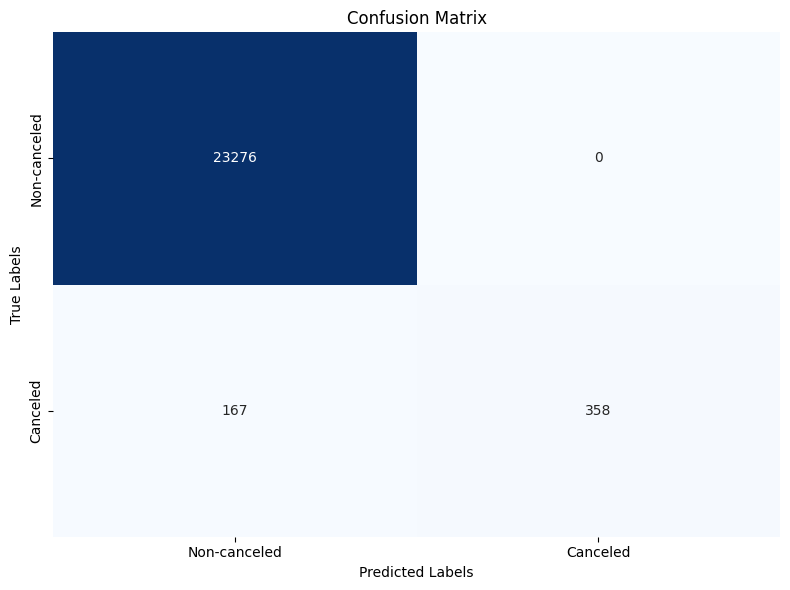

<ipython-input-61-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


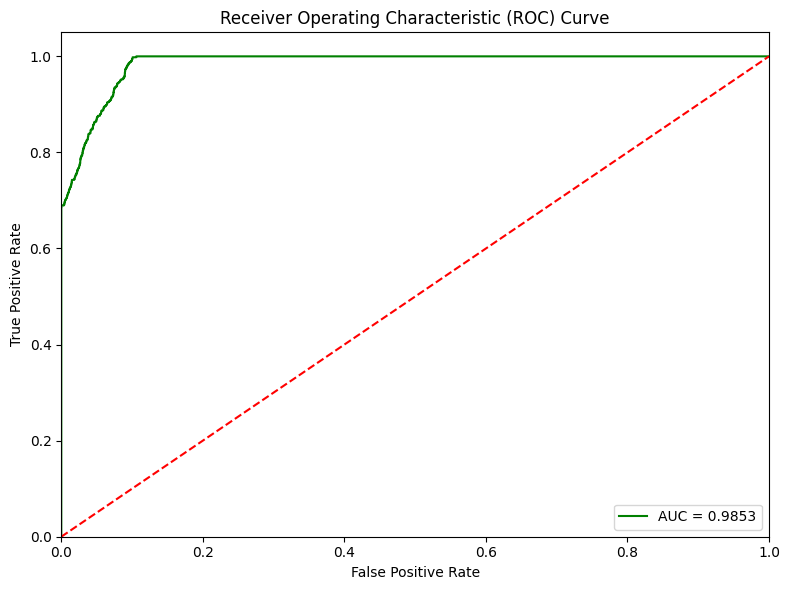

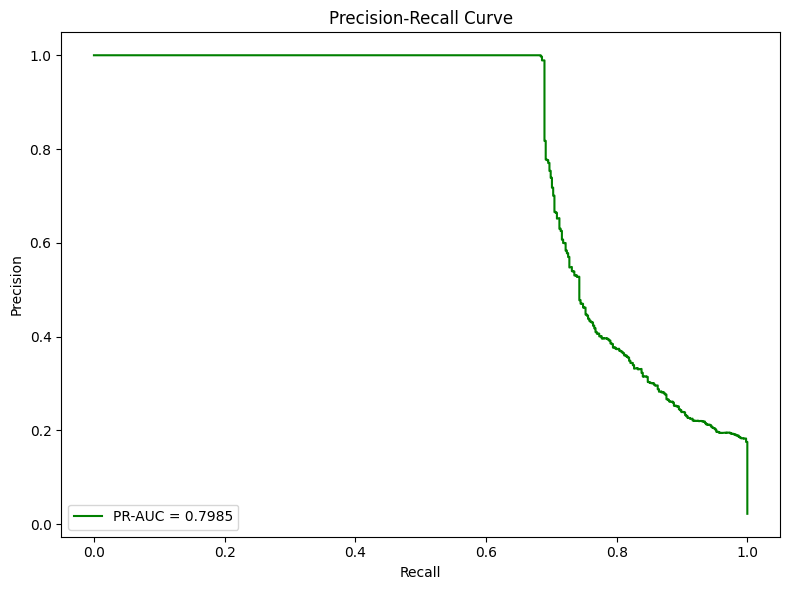

Results saved to RFwithTabnetWeighted.csv
Hybrid model saved as 'RFwithTabnetWeighted.pkl'


In [64]:
import numpy as np
import torch
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import TimeSeriesSplit
import joblib
import random

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")

best_tabnet = joblib.load('/content/drive/MyDrive/thesis/best_tabnet.pkl')
print("Loaded saved TabNet model.")

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store weights from each fold
weights_rf = []
weights_tabnet = []

# Perform TimeSeriesSplit
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"\nFold {fold + 1}/{n_splits}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Predict probabilities for RandomForest
    val_rf_proba = best_rf.predict_proba(X_val_fold)[:, 1]
    val_rf_pred = (val_rf_proba > 0.5).astype(int)
    rf_val_recall = recall_score(y_val_fold, val_rf_pred)

    # Predict probabilities for TabNet
    val_tabnet_proba = best_tabnet.predict_proba(X_val_fold)[:, 1]
    val_tabnet_pred = (val_tabnet_proba > 0.5).astype(int)
    tabnet_val_recall = recall_score(y_val_fold, val_tabnet_pred)

    # Calculate weights based on recall for this fold
    total_recall = rf_val_recall + tabnet_val_recall
    weight_rf = rf_val_recall / total_recall
    weight_tabnet = tabnet_val_recall / total_recall

    # Store the weights for this fold
    weights_rf.append(weight_rf)
    weights_tabnet.append(weight_tabnet)

# Average weights across all folds
final_weight_rf = np.mean(weights_rf)
final_weight_tabnet = np.mean(weights_tabnet)

# Output the average weights
print(f"\nAverage Weight for RandomForest: {final_weight_rf:.4f}")
print(f"Average Weight for TabNet: {final_weight_tabnet:.4f}")

# Final predictions using weighted average on the training and test sets

# Predict probabilities for the training set
train_rf_proba = best_rf.predict_proba(X_train_scaled)[:, 1]
train_tabnet_proba = best_tabnet.predict_proba(X_train_scaled)[:, 1]
final_train_proba = (final_weight_rf * train_rf_proba) + (final_weight_tabnet * train_tabnet_proba)
final_train_pred = (final_train_proba > 0.5).astype(int)

# Predict probabilities for the test set
test_rf_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
test_tabnet_proba = best_tabnet.predict_proba(X_test_scaled)[:, 1]
final_test_proba = (final_weight_rf * test_rf_proba) + (final_weight_tabnet * test_tabnet_proba)
final_test_pred = (final_test_proba > 0.5).astype(int)



print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, final_test_pred,final_test_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test.ravel(),  # Flatten to 1D
    'Predicted_Class': final_test_pred.ravel(),
    'Predicted_Probability': final_test_proba.ravel()
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetWeighted.csv', index=False)
print("Results saved to RFwithTabnetWeighted.csv")

# Save model

RFwithTabnetWeighted = {
    'best_rf': best_rf,
    'best_tabnet': best_tabnet,
    'final_weight_rf': final_weight_rf,
    'final_weight_tabnet': final_weight_tabnet
}

joblib.dump(RFwithTabnetWeighted, '/content/drive/MyDrive/thesis/RFwithTabnetWeighted.pkl')
print("Hybrid model saved as 'RFwithTabnetWeighted.pkl'")

### 4.2.2.XGBoost with TabNet

Loaded saved XGBoost model.
Loaded saved TabNet model.

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Average Weight for XGBoost: 0.5489
Average Weight for TabNet: 0.4511

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801



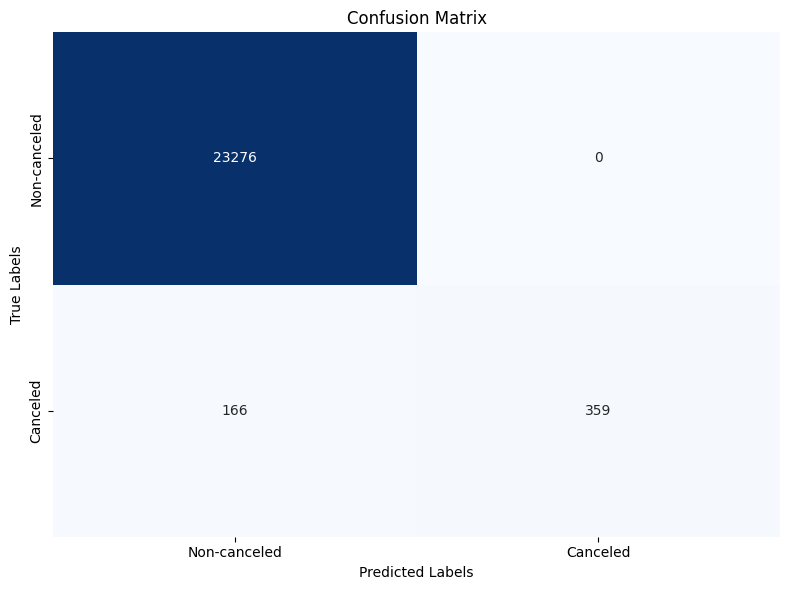

<ipython-input-61-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


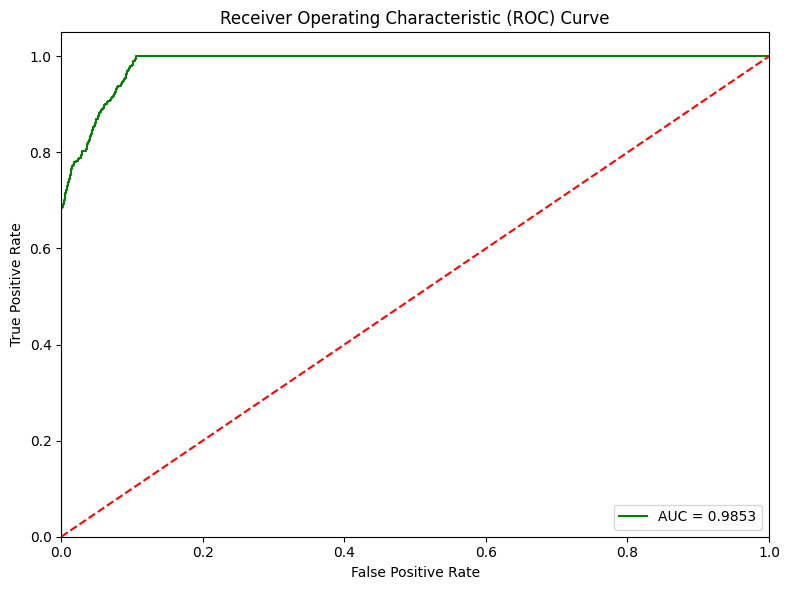

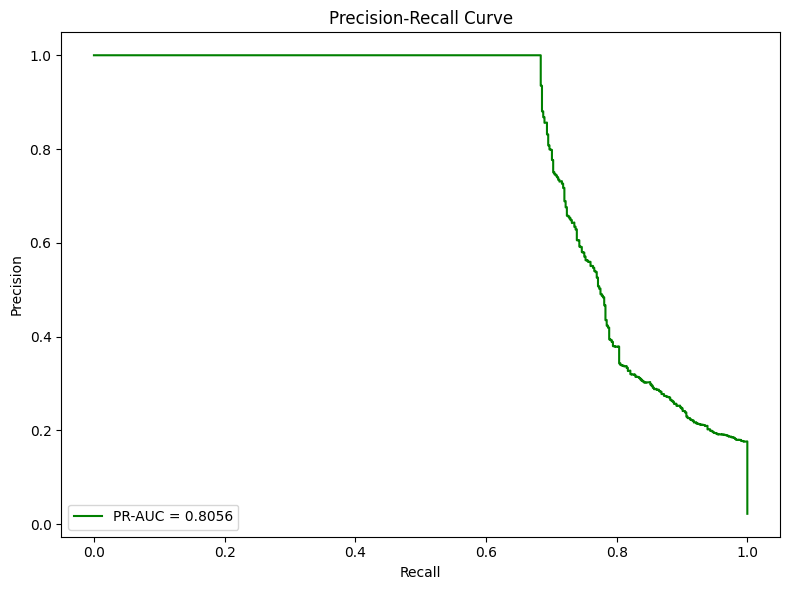

Results saved to XGBwithTabnetWeighted.csv
Hybrid model saved as 'XGBwithTabnetWeighted.pkl'


In [65]:
import numpy as np
import torch
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import TimeSeriesSplit
import joblib
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGBoost model.")

best_tabnet = joblib.load('/content/drive/MyDrive/thesis/best_tabnet.pkl')
print("Loaded saved TabNet model.")

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store weights from each fold
weights_xgb = []
weights_tabnet = []

# Perform TimeSeriesSplit
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"\nFold {fold + 1}/{n_splits}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Predict probabilities for XGBoost
    val_xgb_proba = best_xgb.predict_proba(X_val_fold)[:, 1]
    val_xgb_pred = (val_xgb_proba > 0.5).astype(int)
    xgb_val_recall = recall_score(y_val_fold, val_xgb_pred)

    # Predict probabilities for TabNet
    val_tabnet_proba = best_tabnet.predict_proba(X_val_fold)[:, 1]
    val_tabnet_pred = (val_tabnet_proba > 0.5).astype(int)
    tabnet_val_recall = recall_score(y_val_fold, val_tabnet_pred)

    # Calculate weights based on recall for this fold
    total_recall = xgb_val_recall + tabnet_val_recall
    weight_xgb = xgb_val_recall / total_recall
    weight_tabnet = tabnet_val_recall / total_recall

    # Store the weights for this fold
    weights_xgb.append(weight_xgb)
    weights_tabnet.append(weight_tabnet)

# Average weights across all folds
final_weight_xgb = np.mean(weights_xgb)
final_weight_tabnet = np.mean(weights_tabnet)

# Output the average weights
print(f"\nAverage Weight for XGBoost: {final_weight_xgb:.4f}")
print(f"Average Weight for TabNet: {final_weight_tabnet:.4f}")

# Final predictions using weighted average on the training and test sets

# Predict probabilities for the training set
train_xgb_proba = best_xgb.predict_proba(X_train_scaled)[:, 1]
train_tabnet_proba = best_tabnet.predict_proba(X_train_scaled)[:, 1]
final_train_proba = (final_weight_xgb * train_xgb_proba) + (final_weight_tabnet * train_tabnet_proba)
final_train_pred = (final_train_proba > 0.5).astype(int)

# Predict probabilities for the test set
test_xgb_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
test_tabnet_proba = best_tabnet.predict_proba(X_test_scaled)[:, 1]
final_test_proba = (final_weight_xgb * test_xgb_proba) + (final_weight_tabnet * test_tabnet_proba)
final_test_pred = (final_test_proba > 0.5).astype(int)


print("\nClassification Report on Test Set:")
print(classification_report(y_test, final_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, final_test_pred,final_test_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test.ravel(),  # Flatten to 1D
    'Predicted_Class': final_test_pred.ravel(),
    'Predicted_Probability': final_test_proba.ravel()
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetWeighted.csv', index=False)
print("Results saved to XGBwithTabnetWeighted.csv")

# Save model

XGBwithTabnetWeighted = {
    'best_xgb': best_xgb,
    'best_tabnet': best_tabnet,
    'final_weight_xgb': final_weight_xgb,
    'final_weight_tabnet': final_weight_tabnet
}

joblib.dump(XGBwithTabnetWeighted, '/content/drive/MyDrive/thesis/XGBwithTabnetWeighted.pkl')
print("Hybrid model saved as 'XGBwithTabnetWeighted.pkl'")

###4.2.3 RF with TabNet-oversampling

Loaded saved RandomForest SMOTE model.
Loaded saved TabNet SMOTE model.

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Average Weight for RandomForest SMOTE: 0.4914
Average Weight for TabNet SMOTE: 0.5086

Classification Report -Test Set:
              precision    recall  f1-score   support

           0     0.9983    0.9175    0.9562     23276
           1     0.2027    0.9295    0.3328       525

    accuracy                         0.9178     23801
   macro avg     0.6005    0.9235    0.6445     23801
weighted avg     0.9807    0.9178    0.9424     23801



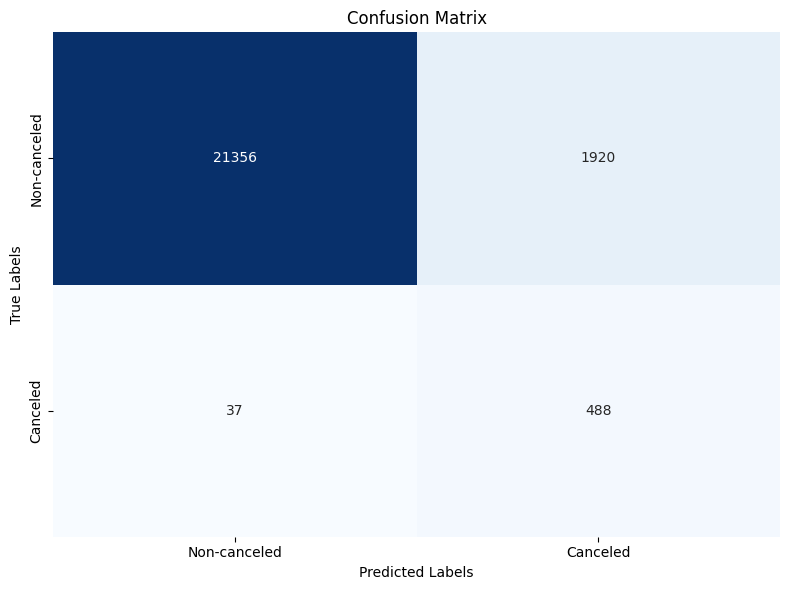

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


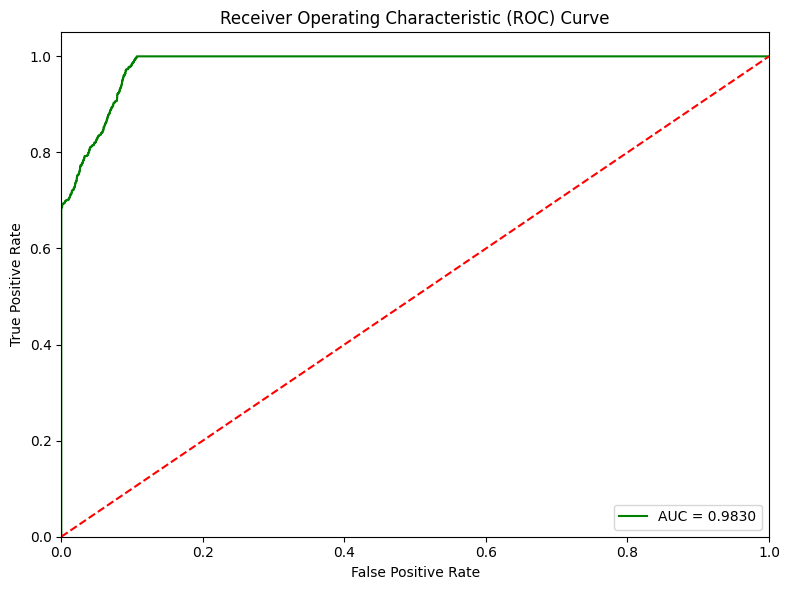

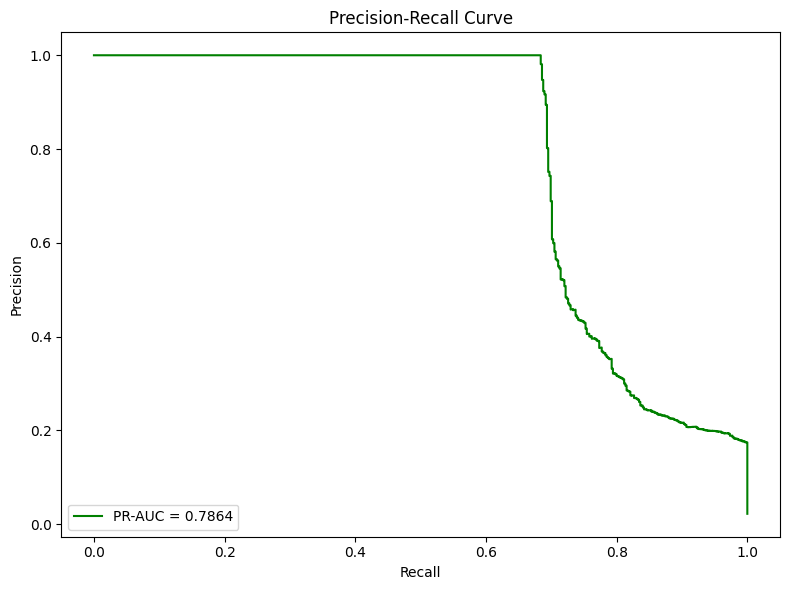

Results saved to RFwithTabnetWeighted_smote.csv
Hybrid model saved as 'RFwithTabnetWeighted_smote.pkl'


In [ ]:
import numpy as np
import torch
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import TimeSeriesSplit
import joblib
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_rf_smote = joblib.load('/content/drive/MyDrive/thesis/best_rf_smote.pkl')
print("Loaded saved RandomForest SMOTE model.")

best_tabnet_smote = joblib.load('/content/drive/MyDrive/thesis/best_tabnet_smote.pkl')
print("Loaded saved TabNet SMOTE model.")

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store weights from each fold
weights_rf = []
weights_tabnet = []

# Perform TimeSeriesSplit
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"\nFold {fold + 1}/{n_splits}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Predict probabilities for RandomForest SMOTE
    val_rf_proba = best_rf_smote.predict_proba(X_val_fold)[:, 1]
    val_rf_pred = (val_rf_proba > 0.5).astype(int)
    rf_val_recall = recall_score(y_val_fold, val_rf_pred)

    # Predict probabilities for TabNet SMOTE
    val_tabnet_proba = best_tabnet_smote.predict_proba(X_val_fold)[:, 1]
    val_tabnet_pred = (val_tabnet_proba > 0.5).astype(int)
    tabnet_val_recall = recall_score(y_val_fold, val_tabnet_pred)

    # Calculate weights based on recall for this fold
    total_recall = rf_val_recall + tabnet_val_recall
    weight_rf = rf_val_recall / total_recall
    weight_tabnet = tabnet_val_recall / total_recall

    # Store the weights for this fold
    weights_rf.append(weight_rf)
    weights_tabnet.append(weight_tabnet)

# Average weights across all folds
final_weight_rf = np.mean(weights_rf)
final_weight_tabnet = np.mean(weights_tabnet)

# Output the average weights
print(f"\nAverage Weight for RandomForest SMOTE: {final_weight_rf:.4f}")
print(f"Average Weight for TabNet SMOTE: {final_weight_tabnet:.4f}")

# Final predictions using weighted average on the training and test sets

# Predict probabilities for the training set
train_rf_proba = best_rf_smote.predict_proba(X_train_scaled)[:, 1]
train_tabnet_proba = best_tabnet_smote.predict_proba(X_train_scaled)[:, 1]
final_train_proba = (final_weight_rf * train_rf_proba) + (final_weight_tabnet * train_tabnet_proba)
final_train_pred = (final_train_proba > 0.5).astype(int)

# Predict probabilities for the test set
test_rf_proba = best_rf_smote.predict_proba(X_test_scaled)[:, 1]
test_tabnet_proba = best_tabnet_smote.predict_proba(X_test_scaled)[:, 1]
final_test_proba = (final_weight_rf * test_rf_proba) + (final_weight_tabnet * test_tabnet_proba)
final_test_pred = (final_test_proba > 0.5).astype(int)



print("\nClassification Report -Test Set:")
print(classification_report(y_test, final_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, final_test_pred,final_test_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test.ravel(),  # Flatten to 1D
    'Predicted_Class': final_test_pred.ravel(),
    'Predicted_Probability': final_test_proba.ravel()
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetWeighted_smote.csv', index=False)
print("Results saved to RFwithTabnetWeighted_smote.csv")

# Save model

RFwithTabnetWeighted_smote = {
    'best_rf_smote': best_rf_smote,
    'best_tabnet_smote': best_tabnet_smote,
    'final_weight_rf': final_weight_rf,
    'final_weight_tabnet': final_weight_tabnet
}

joblib.dump(RFwithTabnetWeighted_smote, '/content/drive/MyDrive/thesis/RFwithTabnetWeighted_smote.pkl')
print("Hybrid model saved as 'RFwithTabnetWeighted_smote.pkl'")

###4.2.4 XGBoost with TabNet-oversampling

Loaded saved XGBoost SMOTE model.
Loaded saved TabNet SMOTE model.

Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5

Average Weight for XGBoost SMOTE: 0.5001
Average Weight for TabNet SMOTE: 0.4999

Classification Report -Test Set:
              precision    recall  f1-score   support

           0     1.0000    0.8925    0.9432     23276
           1     0.1734    1.0000    0.2956       525

    accuracy                         0.8949     23801
   macro avg     0.5867    0.9463    0.6194     23801
weighted avg     0.9818    0.8949    0.9289     23801



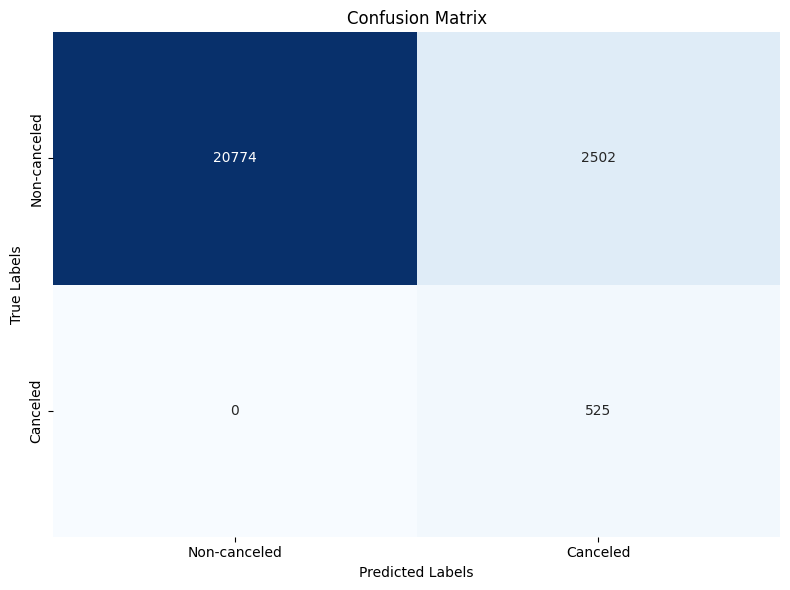

<ipython-input-58-e25d5da39d55>:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


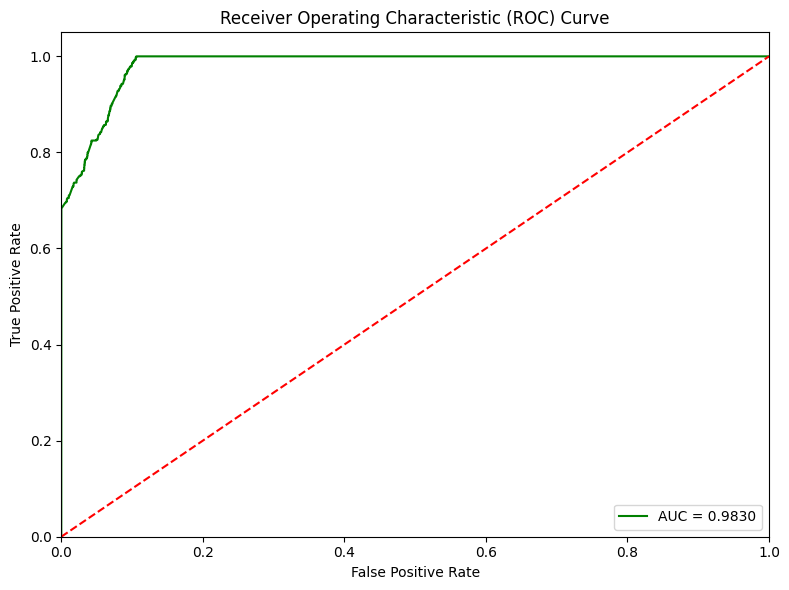

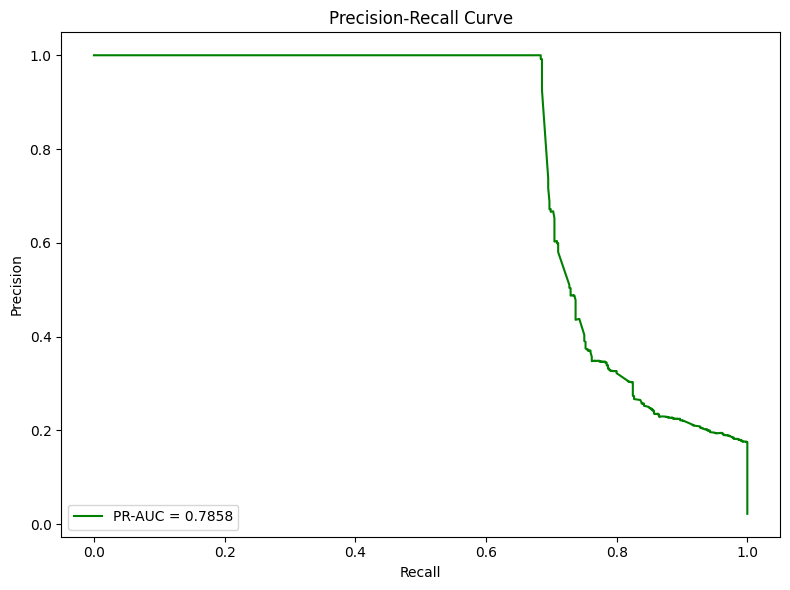

Results saved to XGBwithTabnetWeighted_smote.csv
Hybrid model saved as 'XGBwithTabnetWeighted_smote.pkl'


In [ ]:
import numpy as np
import torch
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import TimeSeriesSplit
import joblib
import random

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_xgb_smote = joblib.load('/content/drive/MyDrive/thesis/best_xgb_smote.pkl')
print("Loaded saved XGBoost SMOTE model.")

best_tabnet_smote = joblib.load('/content/drive/MyDrive/thesis/best_tabnet_smote.pkl')
print("Loaded saved TabNet SMOTE model.")

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store weights from each fold
weights_xgb = []
weights_tabnet = []

# Perform TimeSeriesSplit
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"\nFold {fold + 1}/{n_splits}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Predict probabilities for XGBoost SMOTE
    val_xgb_proba = best_xgb_smote.predict_proba(X_val_fold)[:, 1]
    val_xgb_pred = (val_xgb_proba > 0.5).astype(int)
    xgb_val_recall = recall_score(y_val_fold, val_xgb_pred)

    # Predict probabilities for TabNet SMOTE
    val_tabnet_proba = best_tabnet_smote.predict_proba(X_val_fold)[:, 1]
    val_tabnet_pred = (val_tabnet_proba > 0.5).astype(int)
    tabnet_val_recall = recall_score(y_val_fold, val_tabnet_pred)

    # Calculate weights based on recall for this fold
    total_recall = xgb_val_recall + tabnet_val_recall
    weight_xgb = xgb_val_recall / total_recall
    weight_tabnet = tabnet_val_recall / total_recall

    # Store the weights for this fold
    weights_xgb.append(weight_xgb)
    weights_tabnet.append(weight_tabnet)

# Average weights across all folds
final_weight_xgb = np.mean(weights_xgb)
final_weight_tabnet = np.mean(weights_tabnet)

# Output the average weights
print(f"\nAverage Weight for XGBoost SMOTE: {final_weight_xgb:.4f}")
print(f"Average Weight for TabNet SMOTE: {final_weight_tabnet:.4f}")

# Final predictions using weighted average on the training and test sets

# Predict probabilities for the training set
train_xgb_proba = best_xgb_smote.predict_proba(X_train_scaled)[:, 1]
train_tabnet_proba = best_tabnet_smote.predict_proba(X_train_scaled)[:, 1]
final_train_proba = (final_weight_xgb * train_xgb_proba) + (final_weight_tabnet * train_tabnet_proba)
final_train_pred = (final_train_proba > 0.5).astype(int)

# Predict probabilities for the test set
test_xgb_proba = best_xgb_smote.predict_proba(X_test_scaled)[:, 1]
test_tabnet_proba = best_tabnet_smote.predict_proba(X_test_scaled)[:, 1]
final_test_proba = (final_weight_xgb * test_xgb_proba) + (final_weight_tabnet * test_tabnet_proba)
final_test_pred = (final_test_proba > 0.5).astype(int)

# Generate Classification Reports
print("\nClassification Report -Test Set:")
print(classification_report(y_test, final_test_pred, digits=4))

# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(y_test, final_test_pred,final_test_proba)

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test.ravel(),  # Flatten to 1D
    'Predicted_Class': final_test_pred.ravel(),
    'Predicted_Probability': final_test_proba.ravel()
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetWeighted_smote.csv', index=False)
print("Results saved to XGBwithTabnetWeighted_smote.csv")

# Save model

XGBwithTabnetWeighted_smote = {
    'best_xgb_smote': best_xgb_smote,
    'best_tabnet_smote': best_tabnet_smote,
    'final_weight_xgb': final_weight_xgb,
    'final_weight_tabnet': final_weight_tabnet
}

joblib.dump(XGBwithTabnetWeighted_smote, '/content/drive/MyDrive/thesis/XGBwithTabnetWeighted_smote.pkl')
print("Hybrid model saved as 'XGBwithTabnetWeighted_smote.pkl'")

## 4.3.Feature selection within Cascade

###4.3.1.RF with TabNet

In [66]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report
import joblib
import random


# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")
print(f"Model parameters: {best_rf.get_params()}")

# Get feature importances from RandomForest
importances = best_rf.feature_importances_

# Rank features by importance
features_list = train_data.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Select features based on cumulative importance
cumulative_importance = feature_importance_df['Importance'].cumsum()
feature_importance_df['Cumulative Importance'] = cumulative_importance

# Select top features contributing to 90% cumulative importance
threshold = 0.90
important_features_df = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

# Print features contributing to 90% cumulative importance
print(f"\nFeatures contributing to {threshold*100}% cumulative importance (sorted by importance):")
print(important_features_df[['Feature', 'Importance', 'Cumulative Importance']])

# Get the indices of important features
important_feature_indices = [train_data.columns.get_loc(feature) for feature in important_features_df['Feature']]

# Select the relevant features for training, validation, and testing
X_train_selected = X_train_scaled[:, important_feature_indices]
X_val_selected = X_val_scaled[:, important_feature_indices]
X_test_selected = X_test_scaled[:, important_feature_indices]

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_rf_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_rf_label = np.zeros((X_train_scaled.shape[0], 1))
val_rf_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_rf_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_rf_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_rf_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new RandomForest model for this fold
    rf_fold = RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        class_weight=best_rf.class_weight,
        random_state=42
    )
    rf_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_rf_proba[val_idx] = rf_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_rf_label[val_idx] = rf_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_rf_proba[:, fold] = rf_fold.predict_proba(X_val_scaled)[:, 1]
    val_rf_label[:, fold] = rf_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_rf_proba[:, fold] = rf_fold.predict_proba(X_test_scaled)[:, 1]
    test_rf_label[:, fold] = rf_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_rf_proba = val_rf_proba.mean(axis=1).reshape(-1, 1)
final_test_rf_proba = test_rf_proba.mean(axis=1).reshape(-1, 1)
final_val_rf_label = val_rf_label.mean(axis=1).round().reshape(-1, 1)
final_test_rf_label = test_rf_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with RF outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_rf_proba, oof_train_rf_label))
X_val_combined = np.hstack((X_val_scaled, final_val_rf_proba, final_val_rf_label))
X_test_combined = np.hstack((X_test_scaled, final_test_rf_proba, final_test_rf_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)


# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = {
    'n_d': np.arange(8, 32,8),
    'n_a': np.arange(8, 32,8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
RFwithTabnetCascade_select = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

RFwithTabnetCascade_select.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = RFwithTabnetCascade_select.predict(X_test_tabnet)
y_test_pred_proba = RFwithTabnetCascade_select.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetCascade_select.csv', index=False)

# Save the trained TabNet model
joblib.dump(RFwithTabnetCascade_select, '/content/drive/MyDrive/thesis/RFwithTabnetCascade_select.pkl')
print("Model saved as 'RFwithTabnetCascade_select.pkl'")

Loaded saved RandomForest model.
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Features contributing to 90.0% cumulative importance (sorted by importance):
                          Feature  Importance  Cumulative Importance
44                 IsLateDelivery    0.211784               0.211784
4              Late_delivery_risk    0.129997               0.341781
0        Days for shipping (real)    0.119602               0.461383
20                  Type_TRANSFER    0.056405               0.517788
26          Shipping Mode_Ordinal    0.048701               0.566489
34                Order City_Freq    0.027905

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'n_steps': 3, 'n_d': 24, 'n_a': 16, 'lambda_sparse': 0.005, 'gamma': 1.0}


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.06371 | val_logloss: 0.03225 |  0:00:08s
epoch 1  | loss: 0.04045 | val_logloss: 0.03173 |  0:00:16s
epoch 2  | loss: 0.03584 | val_logloss: 0.02935 |  0:00:24s
epoch 3  | loss: 0.03386 | val_logloss: 0.03046 |  0:00:33s
epoch 4  | loss: 0.0334  | val_logloss: 0.02916 |  0:00:41s
epoch 5  | loss: 0.03326 | val_logloss: 0.03069 |  0:00:49s
epoch 6  | loss: 0.0329  | val_logloss: 0.02919 |  0:00:57s
epoch 7  | loss: 0.03303 | val_logloss: 0.02945 |  0:01:06s
epoch 8  | loss: 0.03305 | val_logloss: 0.02918 |  0:01:14s
epoch 9  | loss: 0.03282 | val_logloss: 0.03181 |  0:01:22s
epoch 10 | loss: 0.03279 | val_logloss: 0.02957 |  0:01:31s
epoch 11 | loss: 0.03279 | val_logloss: 0.02906 |  0:01:39s
epoch 12 | loss: 0.03274 | val_logloss: 0.02886 |  0:01:47s
epoch 13 | loss: 0.03261 | val_logloss: 0.03063 |  0:01:55s
epoch 14 | loss: 0.03271 | val_logloss: 0.02936 |  0:02:04s
epoch 15 | loss: 0.03272 | val_logloss: 0.02951 |  0:02:12s
epoch 16 | loss: 0.03257 | val_logloss: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801

Model saved as 'RFwithTabnetCascade_select.pkl'


Plot confusion matrix, ROC, and PR curves

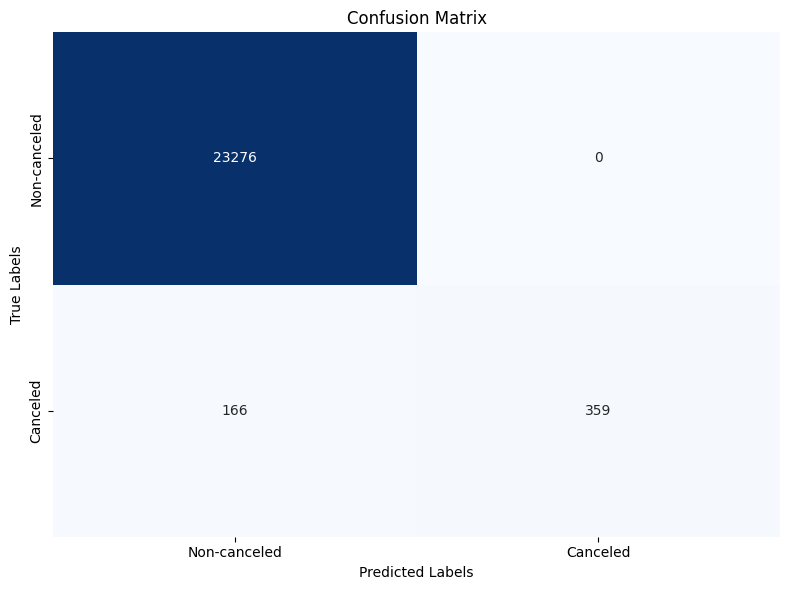

<ipython-input-58-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


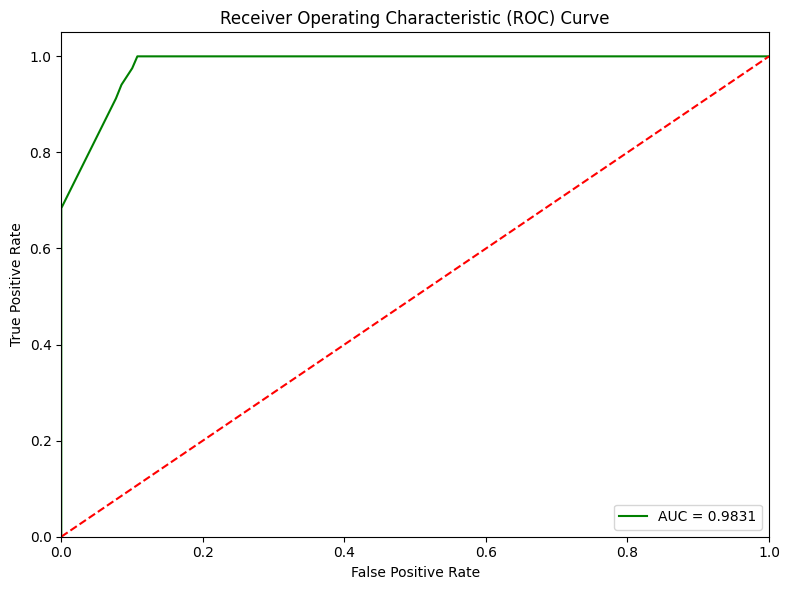

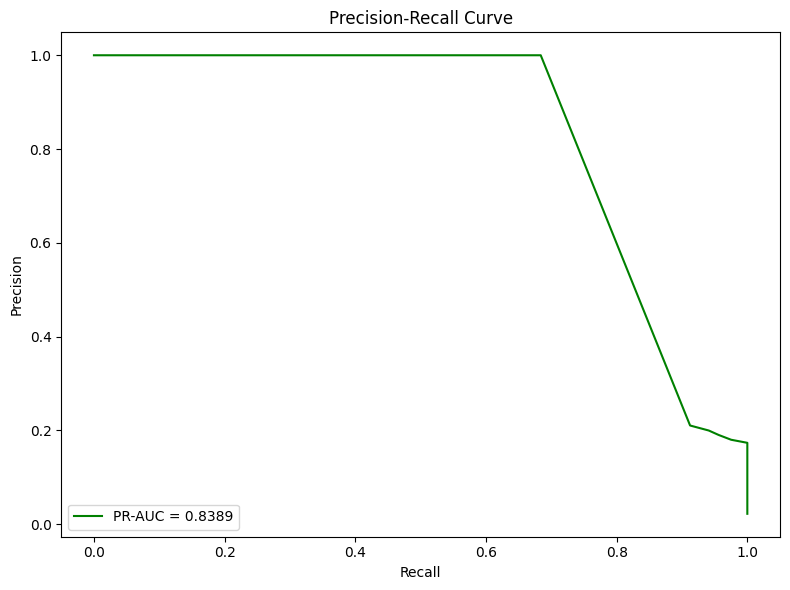

In [65]:
file_path = '/content/drive/MyDrive/thesis/RFwithTabnetCascade_select.csv'
df = pd.read_csv(file_path)
df.head()
# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(df['True_class'], df['Predicted_Class'],df['Predicted_Probability'])

### 4.3.2.XGBoost with TabNet

In [67]:
import numpy as np
import torch
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report
import random
import joblib

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGBoost model.")
print(f"Model parameters: {best_xgb.get_params()}")

# Get feature importances from XGBoost
importances = best_xgb.feature_importances_

# Rank features by importance
features_list = train_data.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Select features based on cumulative importance
cumulative_importance = feature_importance_df['Importance'].cumsum()
feature_importance_df['Cumulative Importance'] = cumulative_importance

# Select top features contributing to 90% cumulative importance
threshold = 0.90
important_features_df = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

# Print features contributing to 90% cumulative importance
print(f"\nFeatures contributing to {threshold*100}% cumulative importance (sorted by importance):")
print(important_features_df[['Feature', 'Importance', 'Cumulative Importance']])

# Get the indices of important features
important_feature_indices = [train_data.columns.get_loc(feature) for feature in important_features_df['Feature']]

# Select the relevant features for training, validation, and testing
X_train_selected = X_train_scaled[:, important_feature_indices]
X_val_selected = X_val_scaled[:, important_feature_indices]
X_test_selected = X_test_scaled[:, important_feature_indices]

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_xgb_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_xgb_label = np.zeros((X_train_scaled.shape[0], 1))
val_xgb_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_xgb_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_xgb_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_xgb_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new XGBClassifier for this fold
    xgb_fold = XGBClassifier(
        n_estimators=best_xgb.n_estimators,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    )
    xgb_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_xgb_proba[val_idx] = xgb_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_xgb_label[val_idx] = xgb_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_xgb_proba[:, fold] = xgb_fold.predict_proba(X_val_scaled)[:, 1]
    val_xgb_label[:, fold] = xgb_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_xgb_proba[:, fold] = xgb_fold.predict_proba(X_test_scaled)[:, 1]
    test_xgb_label[:, fold] = xgb_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_xgb_proba = val_xgb_proba.mean(axis=1).reshape(-1, 1)
final_test_xgb_proba = test_xgb_proba.mean(axis=1).reshape(-1, 1)
final_val_xgb_label = val_xgb_label.mean(axis=1).round().reshape(-1, 1)
final_test_xgb_label = test_xgb_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with XGB outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_xgb_proba, oof_train_xgb_label))
X_val_combined = np.hstack((X_val_scaled, final_val_xgb_proba, final_val_xgb_label))
X_test_combined = np.hstack((X_test_scaled, final_test_xgb_proba, final_test_xgb_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)

# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for Randomized Search
tabnet_param_grid = {
    'n_d': np.arange(8, 32,8),
    'n_a': np.arange(8, 32,8),
    'n_steps': np.arange(3, 6),
    'gamma': np.linspace(1.0, 2.0, 5),
    'lambda_sparse': [0.001, 0.005, 0.01]
}

# Initialize TabNetClassifier
tabnet = TabNetClassifier(seed=42, optimizer_params=dict(lr=fixed_learning_rate),verbose=0)

# Use TimeSeriesSplit for time-series data cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tabnet,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=make_scorer(recall_score),
    cv=tscv_tabnet,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    max_epochs=30,
    patience=5,
    batch_size=fixed_batch_size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the final TabNet model with the best parameters
best_params_tabnet = random_search.best_params_
XGBwithTabnetCascade_select = TabNetClassifier(
    n_d=best_params_tabnet['n_d'],
    n_a=best_params_tabnet['n_a'],
    n_steps=best_params_tabnet['n_steps'],
    gamma=best_params_tabnet['gamma'],
    lambda_sparse=best_params_tabnet['lambda_sparse'],
    seed=42
)

XGBwithTabnetCascade_select.fit(
    X_train_tabnet, y_train,
    eval_set=[(X_val_tabnet, y_val)],
    eval_name=["val"],
    eval_metric=["logloss"],
    max_epochs=50,
    patience=10,
    batch_size=fixed_batch_size
)

# Evaluate on the test set
y_test_pred = XGBwithTabnetCascade_select.predict(X_test_tabnet)
y_test_pred_proba = XGBwithTabnetCascade_select.predict_proba(X_test_tabnet)[:, 1]

print("\nClassification Report - Test set")
print(classification_report(y_test, y_test_pred, digits=4))

# Save results to CSV
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select.csv', index=False)

# Save the trained TabNet model
joblib.dump(XGBwithTabnetCascade_select, '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select.pkl')
print("Model saved as 'XGBwithTabnetCascade_select.pkl'")

Loaded saved XGBoost model.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 105, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 1.5, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}

Features contributin

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'n_steps': 4, 'n_d': 16, 'n_a': 16, 'lambda_sparse': 0.005, 'gamma': 1.75}


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.07406 | val_logloss: 0.04124 |  0:00:10s
epoch 1  | loss: 0.04871 | val_logloss: 0.03531 |  0:00:20s
epoch 2  | loss: 0.04095 | val_logloss: 0.03191 |  0:00:30s
epoch 3  | loss: 0.04758 | val_logloss: 0.03173 |  0:00:40s
epoch 4  | loss: 0.03526 | val_logloss: 0.02975 |  0:00:51s
epoch 5  | loss: 0.03354 | val_logloss: 0.02899 |  0:01:01s
epoch 6  | loss: 0.03331 | val_logloss: 0.02935 |  0:01:11s
epoch 7  | loss: 0.03364 | val_logloss: 0.02986 |  0:01:21s
epoch 8  | loss: 0.03315 | val_logloss: 0.03025 |  0:01:31s
epoch 9  | loss: 0.03317 | val_logloss: 0.02907 |  0:01:42s
epoch 10 | loss: 0.03317 | val_logloss: 0.02944 |  0:01:52s
epoch 11 | loss: 0.03313 | val_logloss: 0.02883 |  0:02:02s
epoch 12 | loss: 0.03302 | val_logloss: 0.02961 |  0:02:12s
epoch 13 | loss: 0.03297 | val_logloss: 0.02897 |  0:02:22s
epoch 14 | loss: 0.03306 | val_logloss: 0.02955 |  0:02:32s
epoch 15 | loss: 0.03288 | val_logloss: 0.02896 |  0:02:42s
epoch 16 | loss: 0.03277 | val_logloss: 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report - Test set
              precision    recall  f1-score   support

           0     0.9929    1.0000    0.9964     23276
           1     1.0000    0.6838    0.8122       525

    accuracy                         0.9930     23801
   macro avg     0.9965    0.8419    0.9043     23801
weighted avg     0.9931    0.9930    0.9924     23801

Model saved as 'XGBwithTabnetCascade_select.pkl'


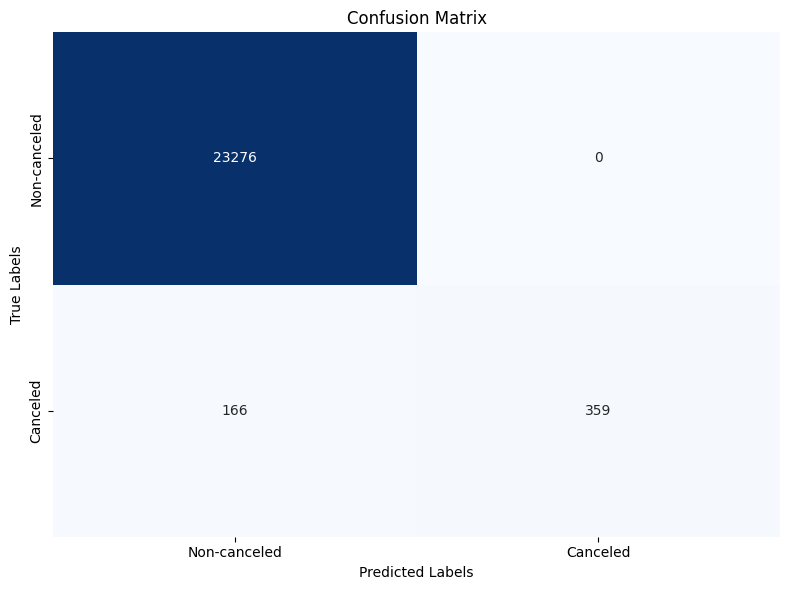

<ipython-input-58-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


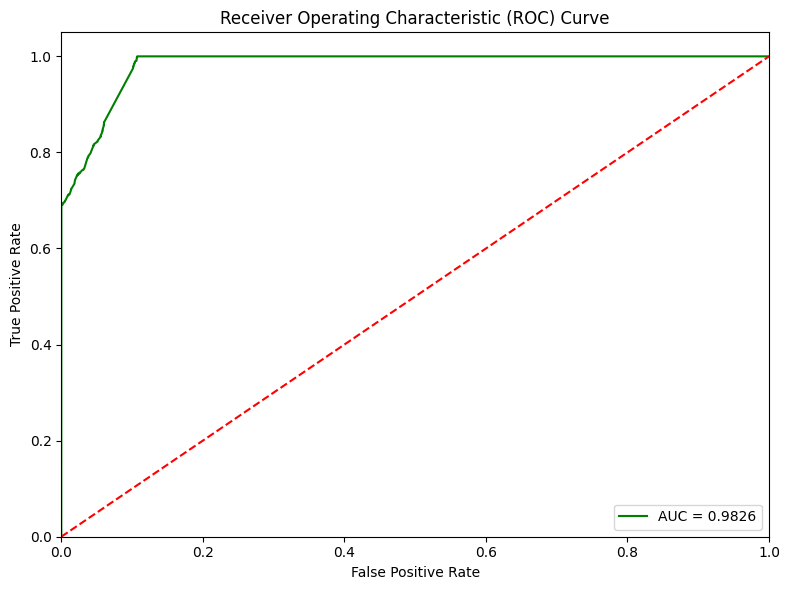

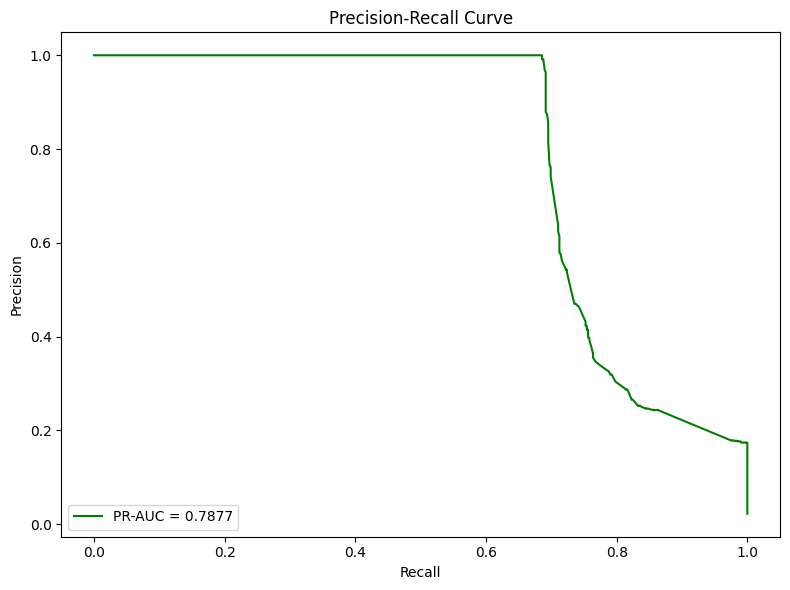

In [66]:
file_path = '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select.csv'
df = pd.read_csv(file_path)
df.head()
# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(df['True_class'], df['Predicted_Class'],df['Predicted_Probability'])

###4.3.3 RF with TabNet-oversampling

In [70]:
import numpy as np
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import TimeSeriesSplit
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import random
import joblib

# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

best_rf = joblib.load('/content/drive/MyDrive/thesis/best_rf.pkl')
print("Loaded saved RandomForest model.")
print(f"Model parameters: {best_rf.get_params()}")

# Get feature importances from RandomForest
importances = best_rf.feature_importances_

# Rank features by importance
features_list = train_data.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Select features based on cumulative importance
cumulative_importance = feature_importance_df['Importance'].cumsum()
feature_importance_df['Cumulative Importance'] = cumulative_importance

# Select top features contributing to 90% cumulative importance
threshold = 0.90
important_features_df = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

# Print features contributing to 90% cumulative importance
print(f"\nFeatures contributing to {threshold*100}% cumulative importance (sorted by importance):")
print(important_features_df[['Feature', 'Importance', 'Cumulative Importance']])

# Get the indices of important features
important_feature_indices = [train_data.columns.get_loc(feature) for feature in important_features_df['Feature']]

# Select the relevant features for training, validation, and testing
X_train_selected = X_train_scaled[:, important_feature_indices]
X_val_selected = X_val_scaled[:, important_feature_indices]
X_test_selected = X_test_scaled[:, important_feature_indices]

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_rf_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_rf_label = np.zeros((X_train_scaled.shape[0], 1))
val_rf_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_rf_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_rf_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_rf_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new RandomForest model for this fold
    rf_fold = RandomForestClassifier(
        n_estimators=best_rf.n_estimators,
        max_depth=best_rf.max_depth,
        min_samples_split=best_rf.min_samples_split,
        min_samples_leaf=best_rf.min_samples_leaf,
        max_features=best_rf.max_features,
        class_weight=best_rf.class_weight,
        random_state=42
    )
    rf_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_rf_proba[val_idx] = rf_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_rf_label[val_idx] = rf_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_rf_proba[:, fold] = rf_fold.predict_proba(X_val_scaled)[:, 1]
    val_rf_label[:, fold] = rf_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_rf_proba[:, fold] = rf_fold.predict_proba(X_test_scaled)[:, 1]
    test_rf_label[:, fold] = rf_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_rf_proba = val_rf_proba.mean(axis=1).reshape(-1, 1)
final_test_rf_proba = test_rf_proba.mean(axis=1).reshape(-1, 1)
final_val_rf_label = val_rf_label.mean(axis=1).round().reshape(-1, 1)
final_test_rf_label = test_rf_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with RF outputs for TabNet input
X_train_combined = np.hstack((X_train_selected, oof_train_rf_proba, oof_train_rf_label))
X_val_combined = np.hstack((X_val_selected, final_val_rf_proba, final_val_rf_label))
X_test_combined = np.hstack((X_test_selected, final_test_rf_proba, final_test_rf_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)

# Set fixed values for parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for RandomizedSearchCV
tabnet_param_grid =  {
    'tabnet__n_d': np.arange(16, 41, 8),
    'tabnet__n_a': np.arange(16, 41, 8),
    'tabnet__n_steps': np.arange(4, 10),
    'tabnet__gamma': np.linspace(0.5, 1.5, 5),
    'tabnet__lambda_sparse': [0.001, 0.005,0.01,0.05],
}

# Initialize TabNetClassifier with fixed parameters
tabnet = TabNetClassifier(
    seed=42,
    optimizer_params=dict(lr=fixed_learning_rate),
    verbose=0
)

# Create a pipeline with SMOTE and TabNet
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tabnet', tabnet)
])

# Use TimeSeriesSplit for time-series cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Create a custom recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=recall_scorer,
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    tabnet__max_epochs=30,
    tabnet__patience=5,
    tabnet__batch_size=fixed_batch_size  # Use fixed batch size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best parameters to train on the full training data
RFwithTabnetCascade_select_smote = random_search.best_estimator_

# Fit the final model on the full training set
RFwithTabnetCascade_select_smote.fit(
    X_train_tabnet, y_train,
    tabnet__eval_set=[(X_val_tabnet, y_val)],
    tabnet__eval_name=["val"],
    tabnet__eval_metric=["logloss"],
    tabnet__max_epochs=50,
    tabnet__patience=10,
    tabnet__batch_size=fixed_batch_size
)



# Evaluate on test set
y_test_pred = RFwithTabnetCascade_select_smote.predict(X_test_tabnet)
y_test_pred_proba = RFwithTabnetCascade_select_smote.predict_proba(X_test_tabnet)[:, 1]


print("\nClassification Report-Test set")
print(classification_report(y_test, y_test_pred,digits=4))

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/RFwithTabnetCascade_select_smote.csv', index=False)

# Save the trained TabNet model
joblib.dump(RFwithTabnetCascade_select_smote, '/content/drive/MyDrive/thesis/RFwithTabnetCascade_select_smote.pkl')
print("Model saved as 'RFwithTabnetCascade_select_smote.pkl'")

Loaded saved RandomForest model.
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 24, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Features contributing to 90.0% cumulative importance (sorted by importance):
                          Feature  Importance  Cumulative Importance
44                 IsLateDelivery    0.211784               0.211784
4              Late_delivery_risk    0.129997               0.341781
0        Days for shipping (real)    0.119602               0.461383
20                  Type_TRANSFER    0.056405               0.517788
26          Shipping Mode_Ordinal    0.048701               0.566489
34                Order City_Freq    0.027905

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'tabnet__n_steps': 8, 'tabnet__n_d': 32, 'tabnet__n_a': 16, 'tabnet__lambda_sparse': 0.01, 'tabnet__gamma': 1.25}

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_logloss = 0.1662


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report-Test set
              precision    recall  f1-score   support

           0     0.9998    0.8945    0.9442     23276
           1     0.1750    0.9924    0.2975       525

    accuracy                         0.8966     23801
   macro avg     0.5874    0.9434    0.6209     23801
weighted avg     0.9816    0.8966    0.9300     23801

Model saved as 'RFwithTabnetCascade_select_smote.pkl'


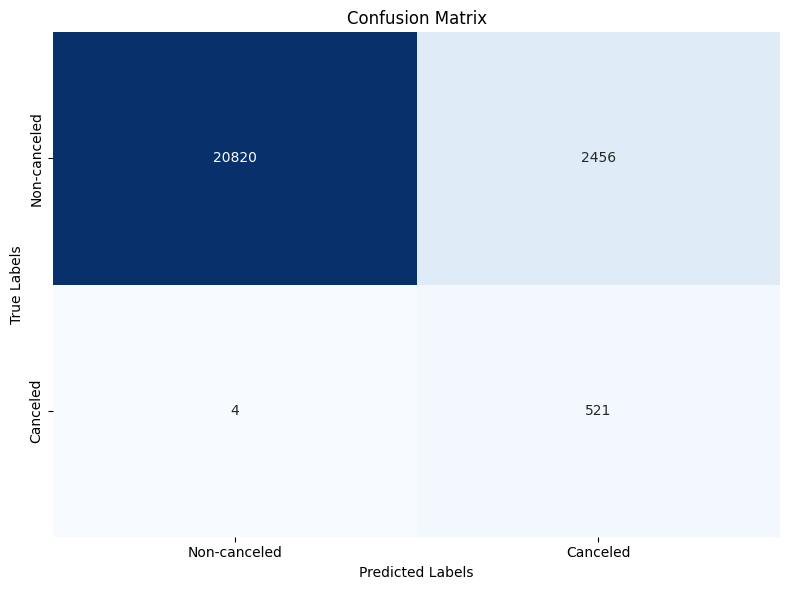

<ipython-input-58-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


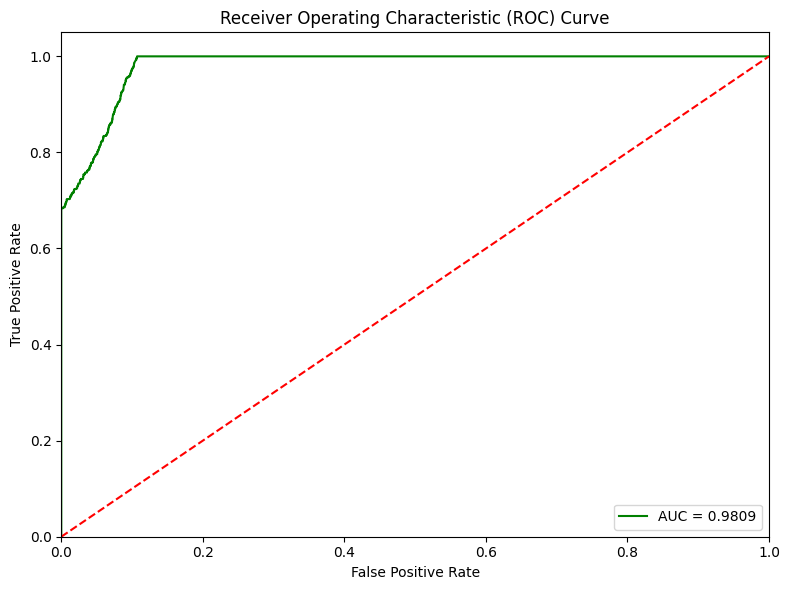

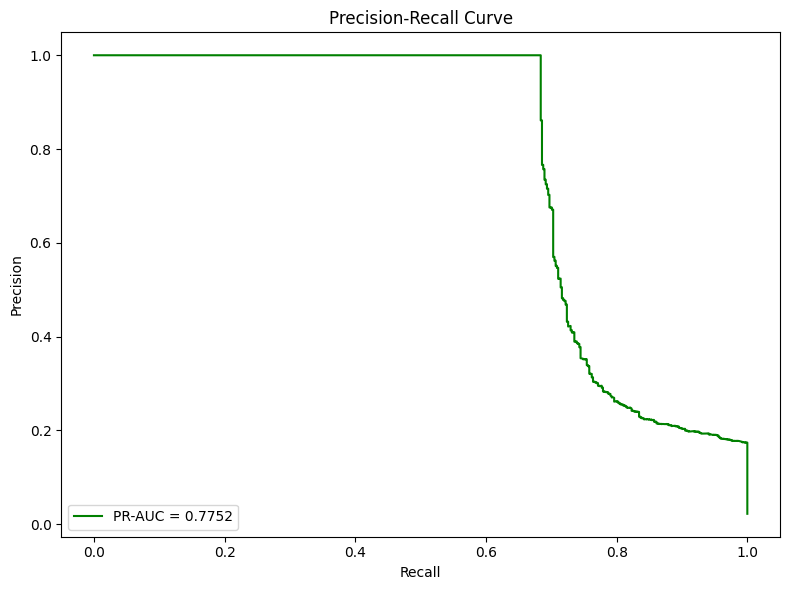

In [67]:
file_path = '/content/drive/MyDrive/thesis/RFwithTabnetCascade_select_smote.csv'
df = pd.read_csv(file_path)
df.head()
# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(df['True_class'], df['Predicted_Class'],df['Predicted_Probability'])

###4.3.4 XGBoost with TabNet-oversampling

In [71]:
import numpy as np
import torch
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, make_scorer
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import random
import joblib


# Set random seeds for reproducibility

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Load pre-trained models
best_xgb = joblib.load('/content/drive/MyDrive/thesis/best_xgb.pkl')
print("Loaded saved XGBoost model.")
print(f"Model parameters: {best_xgb.get_params()}")

# Get feature importances from XGBoost
importances = best_xgb.feature_importances_

# Rank features by importance
features_list = train_data.columns.tolist()
feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Select features based on cumulative importance
cumulative_importance = feature_importance_df['Importance'].cumsum()
feature_importance_df['Cumulative Importance'] = cumulative_importance

# Select top features contributing to 90% cumulative importance
threshold = 0.90
important_features_df = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

# Print features contributing to 90% cumulative importance
print(f"\nFeatures contributing to {threshold*100}% cumulative importance (sorted by importance):")
print(important_features_df[['Feature', 'Importance', 'Cumulative Importance']])

# Get the indices of important features
important_feature_indices = [train_data.columns.get_loc(feature) for feature in important_features_df['Feature']]

# Select the relevant features for training, validation, and testing
X_train_selected = X_train_scaled[:, important_feature_indices]
X_val_selected = X_val_scaled[:, important_feature_indices]
X_test_selected = X_test_scaled[:, important_feature_indices]

# TimeSeriesSplit for cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize arrays for OOF predictions (training) and predictions for val and test sets
oof_train_xgb_proba = np.zeros((X_train_scaled.shape[0], 1))
oof_train_xgb_label = np.zeros((X_train_scaled.shape[0], 1))
val_xgb_proba = np.zeros((X_val_scaled.shape[0], n_splits))
val_xgb_label = np.zeros((X_val_scaled.shape[0], n_splits))
test_xgb_proba = np.zeros((X_test_scaled.shape[0], n_splits))
test_xgb_label = np.zeros((X_test_scaled.shape[0], n_splits))

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation folds
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train a new XGBClassifier for this fold
    xgb_fold = XGBClassifier(
        n_estimators=best_xgb.n_estimators,
        max_depth=best_xgb.max_depth,
        learning_rate=best_xgb.learning_rate,
        subsample=best_xgb.subsample,
        colsample_bytree=best_xgb.colsample_bytree,
        gamma=best_xgb.gamma,
        random_state=42
    )
    xgb_fold.fit(X_train_fold, y_train_fold)

    # Generate OOF predictions (probabilities and labels) for the training set
    oof_train_xgb_proba[val_idx] = xgb_fold.predict_proba(X_val_fold)[:, 1].reshape(-1, 1)
    oof_train_xgb_label[val_idx] = xgb_fold.predict(X_val_fold).reshape(-1, 1)

    # Generate predictions for the validation set
    val_xgb_proba[:, fold] = xgb_fold.predict_proba(X_val_scaled)[:, 1]
    val_xgb_label[:, fold] = xgb_fold.predict(X_val_scaled)

    # Generate predictions for the test set
    test_xgb_proba[:, fold] = xgb_fold.predict_proba(X_test_scaled)[:, 1]
    test_xgb_label[:, fold] = xgb_fold.predict(X_test_scaled)

# Average predictions across all folds
final_val_xgb_proba = val_xgb_proba.mean(axis=1).reshape(-1, 1)
final_test_xgb_proba = test_xgb_proba.mean(axis=1).reshape(-1, 1)
final_val_xgb_label = val_xgb_label.mean(axis=1).round().reshape(-1, 1)  # Use rounded mean for labels
final_test_xgb_label = test_xgb_label.mean(axis=1).round().reshape(-1, 1)

# Combine original features with XGB outputs for TabNet input
X_train_combined = np.hstack((X_train_scaled, oof_train_xgb_proba, oof_train_xgb_label))
X_val_combined = np.hstack((X_val_scaled, final_val_xgb_proba, final_val_xgb_label))
X_test_combined = np.hstack((X_test_scaled, final_test_xgb_proba, final_test_xgb_label))

# Apply standardization to all combined features
scaler = StandardScaler()
X_train_tabnet = scaler.fit_transform(X_train_combined)
X_val_tabnet = scaler.transform(X_val_combined)
X_test_tabnet = scaler.transform(X_test_combined)

# Set fixed values for TabNet parameters
fixed_batch_size = 512
fixed_learning_rate = 0.05

# Define the parameter grid for RandomizedSearchCV
tabnet_param_grid =  {
    'tabnet__n_d': np.arange(16, 41, 8),
    'tabnet__n_a': np.arange(16, 41, 8),
    'tabnet__n_steps': np.arange(4, 10),
    'tabnet__gamma': np.linspace(0.5, 1.5, 5),
    'tabnet__lambda_sparse': [0.001, 0.005,0.01,0.05],
}

# Initialize TabNetClassifier with fixed parameters
tabnet = TabNetClassifier(
    seed=42,
    optimizer_params=dict(lr=fixed_learning_rate),
    verbose=0
)

# Create a pipeline with SMOTE and TabNet
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('tabnet', tabnet)
])

# Use TimeSeriesSplit for time-series cross-validation
tscv_tabnet = TimeSeriesSplit(n_splits=3)

# Create a custom recall scorer
recall_scorer = make_scorer(recall_score)

# Initialize RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=tabnet_param_grid,
    n_iter=20,
    scoring=recall_scorer,
    cv=tscv,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

# Perform the Randomized Search
random_search.fit(
    X_train_tabnet, y_train,
    tabnet__max_epochs=30,
    tabnet__patience=5,
    tabnet__batch_size=fixed_batch_size  # Use fixed batch size
)

# Print the best hyperparameters and score
print(f"Best hyperparameters: {random_search.best_params_}")


# Use the best parameters to train on the full training data
XGBwithTabnetCascade_select_smote = random_search.best_estimator_

# Fit the final model on the full training set
XGBwithTabnetCascade_select_smote.fit(
    X_train_tabnet, y_train,
    tabnet__eval_set=[(X_val_tabnet, y_val)],
    tabnet__eval_name=["val"],
    tabnet__eval_metric=["logloss"],
    tabnet__max_epochs=50,
    tabnet__patience=10,
    tabnet__batch_size=fixed_batch_size
)



# Evaluate on test set
y_test_pred = XGBwithTabnetCascade_select_smote.predict(X_test_tabnet)
y_test_pred_proba = XGBwithTabnetCascade_select_smote.predict_proba(X_test_tabnet)[:, 1]


print("\nClassification Report-Test set")
print(classification_report(y_test, y_test_pred,digits=4))

# Save results to a CSV file
results_df = pd.DataFrame({
    'True_class': y_test,
    'Predicted_Class': y_test_pred,
    'Predicted_Probability': y_test_pred_proba
})
results_df.to_csv('/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select_smote.csv', index=False)

# Save the trained TabNet model
joblib.dump(XGBwithTabnetCascade_select_smote, '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select_smote.pkl')
print("Model saved as 'XGBwithTabnetCascade_select_smote.pkl'")

Loaded saved XGBoost model.
Model parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.15, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 6, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 105, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.30000000000000004, 'reg_lambda': 1.5, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}

Features contributin

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Best hyperparameters: {'tabnet__n_steps': 6, 'tabnet__n_d': 16, 'tabnet__n_a': 16, 'tabnet__lambda_sparse': 0.005, 'tabnet__gamma': 0.75}

Early stopping occurred at epoch 31 with best_epoch = 21 and best_val_logloss = 0.10676


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report-Test set
              precision    recall  f1-score   support

           0     0.9992    0.9031    0.9487     23276
           1     0.1841    0.9695    0.3094       525

    accuracy                         0.9045     23801
   macro avg     0.5917    0.9363    0.6291     23801
weighted avg     0.9813    0.9045    0.9346     23801

Model saved as 'XGBwithTabnetCascade_select_smote.pkl'


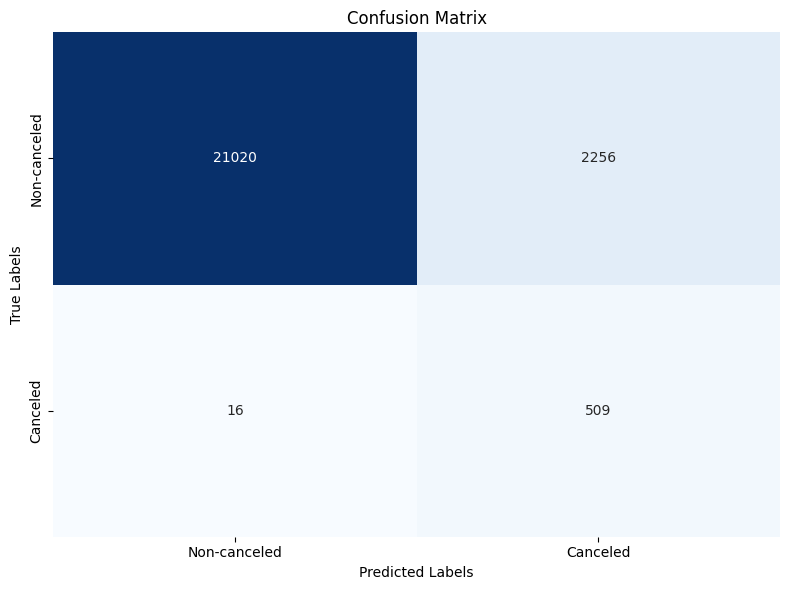

<ipython-input-58-9e1127eeabee>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')


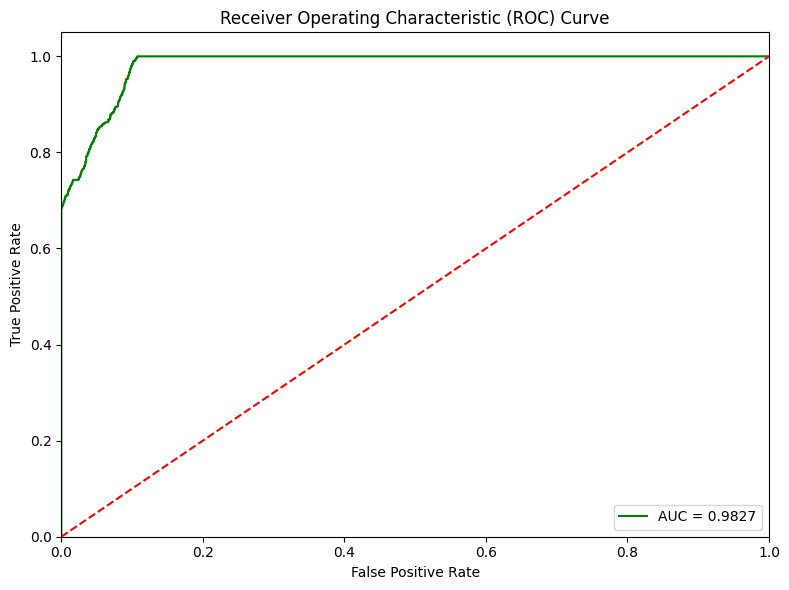

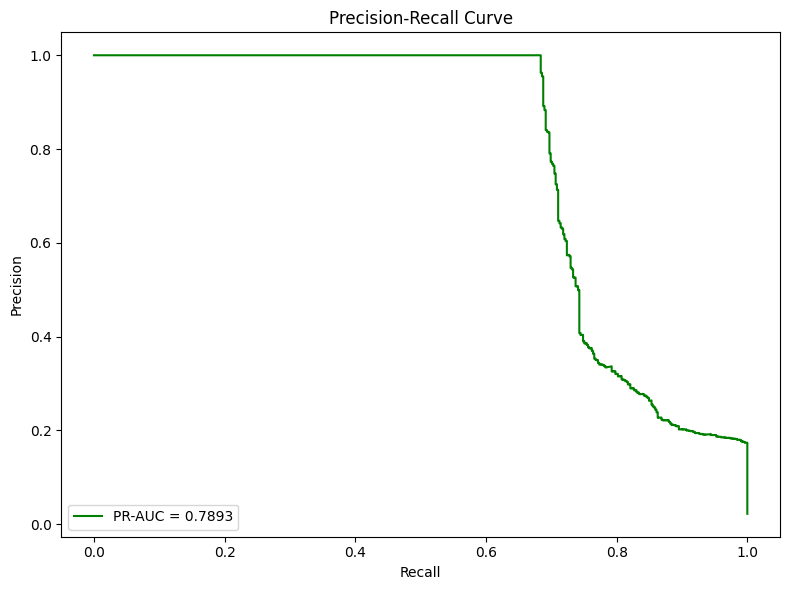

In [68]:
file_path = '/content/drive/MyDrive/thesis/XGBwithTabnetCascade_select_smote.csv'
df = pd.read_csv(file_path)
df.head()
# Plot confusion matrix, ROC, and PR curves
plot_cm_roc_pr(df['True_class'], df['Predicted_Class'],df['Predicted_Probability'])

# Results

#1.without SMOTE

<ipython-input-5-fcebf06dad11>:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')


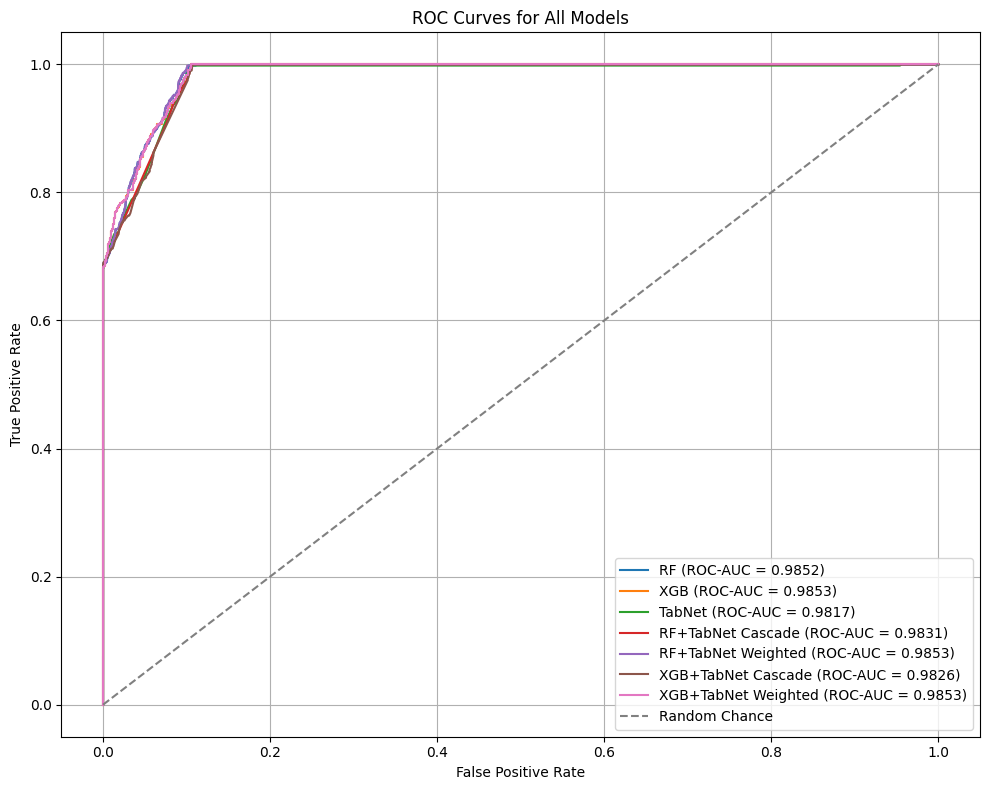

<Figure size 640x480 with 0 Axes>

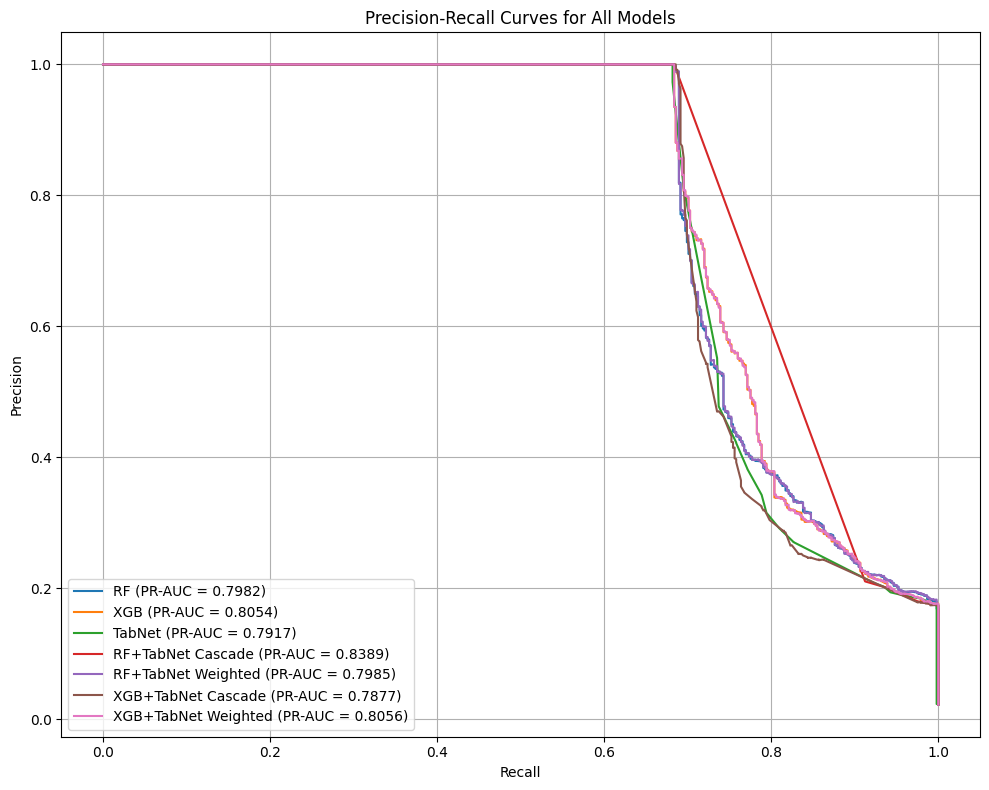


Model Evaluation Metrics:
                     Precision  Recall  F1-Score  ROC-AUC  PR-AUC
Model                                                            
RF                      1.0000  0.6838    0.8122   0.9852  0.7982
XGB                     0.9945  0.6838    0.8104   0.9853  0.8054
TabNet                  1.0000  0.6819    0.8109   0.9817  0.7917
RF+TabNet Cascade       1.0000  0.6838    0.8122   0.9831  0.8389
RF+TabNet Weighted      1.0000  0.6819    0.8109   0.9853  0.7985
XGB+TabNet Cascade      1.0000  0.6838    0.8122   0.9826  0.7877
XGB+TabNet Weighted     1.0000  0.6838    0.8122   0.9853  0.8056


<Figure size 640x480 with 0 Axes>

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

# Base folder path
base_folder = "/content/drive/MyDrive/thesis"

# File names corresponding to each model
file_names = {
    "RF": "rf.csv",
    "XGB": "xgb.csv",
    "TabNet": "tabnet.csv",

    "RF+TabNet Cascade": "RFwithTabnetCascade.csv",
    "RF+TabNet Weighted": "RFwithTabnetWeighted.csv",
    "XGB+TabNet Cascade": "XGBwithTabnetCascade.csv",
    "XGB+TabNet Weighted": "XGBwithTabnetWeighted.csv"
}

# Initialize dictionaries to store metrics and curves
roc_auc_values = {}
pr_auc_values = {}
precision_values = {}
recall_values = {}
f1_values = {}
roc_curves = {}
pr_curves = {}

# Loop through the file names and concatenate paths
for model_name, file_name in file_names.items():
    file_path = os.path.join(base_folder, file_name)

    # Load the data
    df = pd.read_csv(file_path)

    # Extract true labels, predicted probabilities, and predicted classes
    true_labels = df['True_class']
    predicted_probs = df['Predicted_Probability']
    predicted_classes = df['Predicted_Class']

    # Compute ROC-AUC and PR-AUC
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    # Store metrics for plotting
    roc_auc_values[model_name] = roc_auc
    pr_auc_values[model_name] = pr_auc

    # Store precision, recall, and F1-score
    precision_values[model_name] = precision_score(true_labels, predicted_classes)
    recall_values[model_name] = recall_score(true_labels, predicted_classes)
    f1_values[model_name] = f1_score(true_labels, predicted_classes)

    # Store curve data for plotting
    roc_curves[model_name] = (fpr, tpr)
    pr_curves[model_name] = (recall, precision)

# ------------------ Plot ROC-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (ROC-AUC = {roc_auc_values[model_name]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Save ROC curve as an image file
roc_curve_file_path = "/content/drive/MyDrive/thesis/roc_curve_all_models.png"
plt.savefig(roc_curve_file_path)


# ------------------ Plot PR-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision, label=f'{model_name} (PR-AUC = {pr_auc_values[model_name]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()

# Save PR curve as an image file
pr_curve_file_path = "/content/drive/MyDrive/thesis/pr_curve_all_models.png"
plt.savefig(pr_curve_file_path)

# ------------------ Display Model Metrics in Table ------------------
# Create a DataFrame for Precision, Recall, F1, ROC-AUC, and PR-AUC
metrics_df = pd.DataFrame({
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values,
    "ROC-AUC": roc_auc_values,
    "PR-AUC": pr_auc_values
})

metrics_df = metrics_df.round(4)

# Display the DataFrame with the model names
metrics_df.index.name = "Model"
print("\nModel Evaluation Metrics:")
print(metrics_df)

#2.with SMOTE

<ipython-input-7-e7d14b548459>:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')


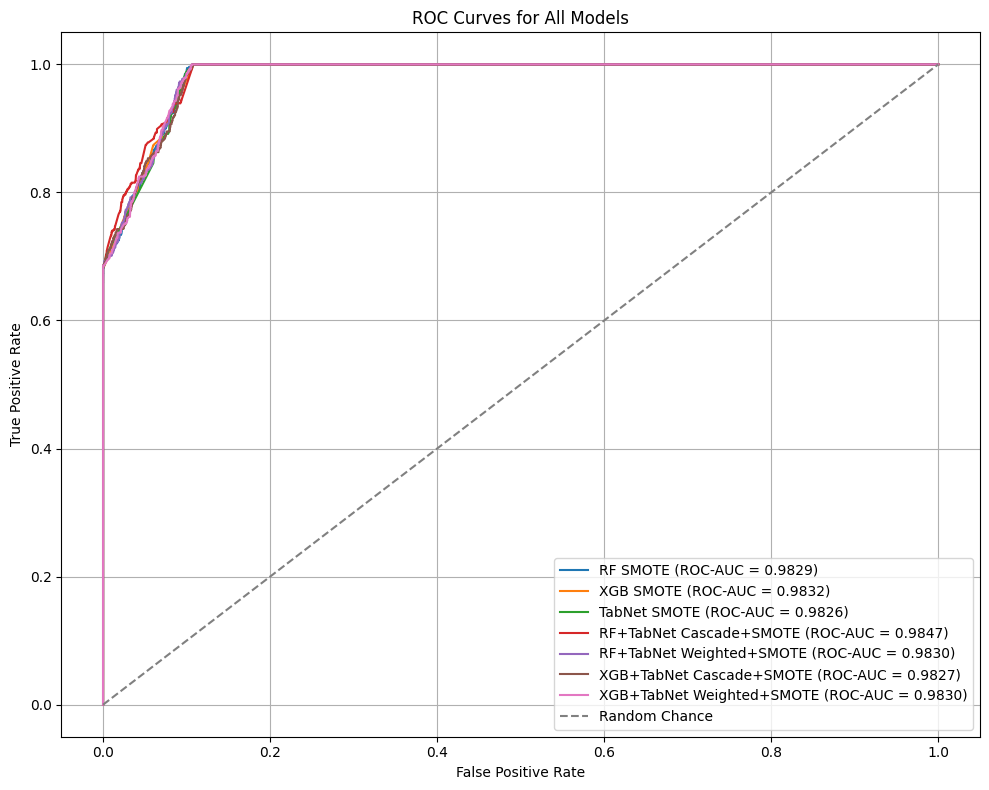

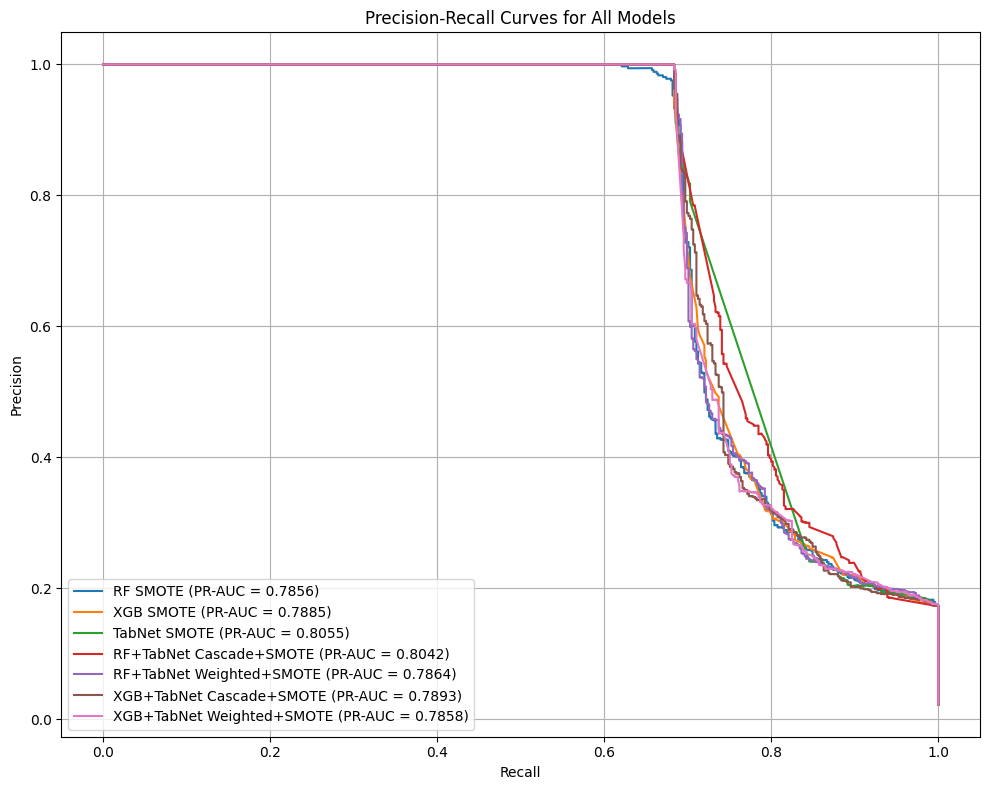


Model Evaluation Metrics:
                           Precision  Recall  F1-Score  ROC-AUC  PR-AUC
Model                                                                  
RF SMOTE                      0.6667  0.7048    0.6852   0.9829  0.7856
XGB SMOTE                     0.1734  1.0000    0.2956   0.9832  0.7885
TabNet SMOTE                  0.1739  1.0000    0.2963   0.9826  0.8055
RF+TabNet Cascade+SMOTE       0.2386  0.8952    0.3768   0.9847  0.8042
RF+TabNet Weighted+SMOTE      0.2027  0.9295    0.3328   0.9830  0.7864
XGB+TabNet Cascade+SMOTE      0.1841  0.9695    0.3094   0.9827  0.7893
XGB+TabNet Weighted+SMOTE     0.1734  1.0000    0.2956   0.9830  0.7858


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

# Base folder path
base_folder = "/content/drive/MyDrive/thesis"

# File names corresponding to each model
file_names = {

    "RF SMOTE": "rf_smote.csv",
    "XGB SMOTE": "xgb_smote.csv",
    "TabNet SMOTE": "tabnet_smote.csv",

    "RF+TabNet Cascade+SMOTE": "RFwithTabnetCascade_smote.csv",
    "RF+TabNet Weighted+SMOTE": "RFwithTabnetWeighted_smote.csv",
    "XGB+TabNet Cascade+SMOTE": "XGBwithTabnetCascade_smote.csv",
    "XGB+TabNet Weighted+SMOTE": "XGBwithTabnetWeighted_smote.csv"

}

# Initialize dictionaries to store metrics and curves
roc_auc_values = {}
pr_auc_values = {}
precision_values = {}
recall_values = {}
f1_values = {}
roc_curves = {}
pr_curves = {}

# Loop through the file names and concatenate paths
for model_name, file_name in file_names.items():
    file_path = os.path.join(base_folder, file_name)

    # Load the data
    df = pd.read_csv(file_path)

    # Extract true labels, predicted probabilities, and predicted classes
    true_labels = df['True_class']
    predicted_probs = df['Predicted_Probability']
    predicted_classes = df['Predicted_Class']

    # Compute ROC-AUC and PR-AUC
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    # Store metrics for plotting
    roc_auc_values[model_name] = roc_auc
    pr_auc_values[model_name] = pr_auc

    # Store precision, recall, and F1-score
    precision_values[model_name] = precision_score(true_labels, predicted_classes)
    recall_values[model_name] = recall_score(true_labels, predicted_classes)
    f1_values[model_name] = f1_score(true_labels, predicted_classes)

    # Store curve data for plotting
    roc_curves[model_name] = (fpr, tpr)
    pr_curves[model_name] = (recall, precision)

# ------------------ Plot ROC-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (ROC-AUC = {roc_auc_values[model_name]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# ------------------ Plot PR-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision, label=f'{model_name} (PR-AUC = {pr_auc_values[model_name]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()

# ------------------ Display Model Metrics in Table ------------------
# Create a DataFrame for Precision, Recall, F1, ROC-AUC, and PR-AUC
metrics_df = pd.DataFrame({
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values,
    "ROC-AUC": roc_auc_values,
    "PR-AUC": pr_auc_values
})

metrics_df = metrics_df.round(4)

# Display the DataFrame with the model names
metrics_df.index.name = "Model"
print("\nModel Evaluation Metrics:")
print(metrics_df)

#3.Feature selection

<ipython-input-8-55d31f8eb927>:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')


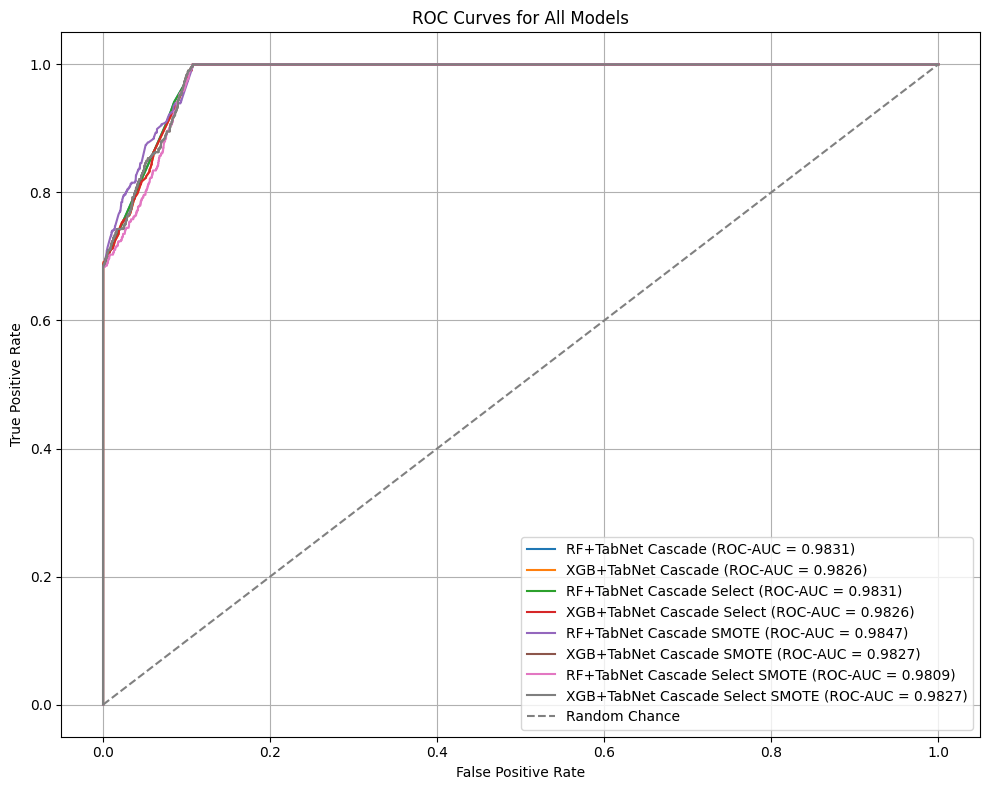

<Figure size 640x480 with 0 Axes>

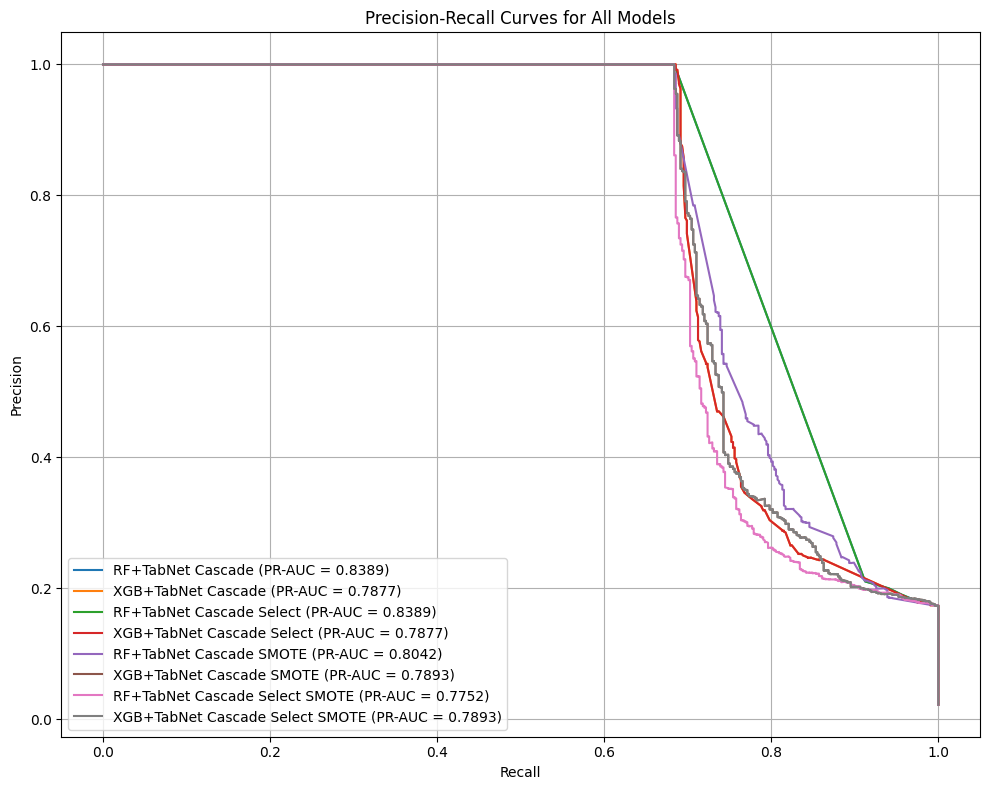


Model Evaluation Metrics:
                                 Precision  Recall  F1-Score  ROC-AUC  PR-AUC
Model                                                                        
RF+TabNet Cascade                   1.0000  0.6838    0.8122   0.9831  0.8389
XGB+TabNet Cascade                  1.0000  0.6838    0.8122   0.9826  0.7877
RF+TabNet Cascade Select            1.0000  0.6838    0.8122   0.9831  0.8389
XGB+TabNet Cascade Select           1.0000  0.6838    0.8122   0.9826  0.7877
RF+TabNet Cascade SMOTE             0.2386  0.8952    0.3768   0.9847  0.8042
XGB+TabNet Cascade SMOTE            0.1841  0.9695    0.3094   0.9827  0.7893
RF+TabNet Cascade Select SMOTE      0.1750  0.9924    0.2975   0.9809  0.7752
XGB+TabNet Cascade Select SMOTE     0.1841  0.9695    0.3094   0.9827  0.7893


<Figure size 640x480 with 0 Axes>

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

# Base folder path
base_folder = "/content/drive/MyDrive/thesis"

# File names corresponding to each model
file_names = {
    "RF+TabNet Cascade": "RFwithTabnetCascade.csv",
    "XGB+TabNet Cascade": "XGBwithTabnetCascade.csv",
    "RF+TabNet Cascade Select":"RFwithTabnetCascade_select.csv",
    "XGB+TabNet Cascade Select":"XGBwithTabnetCascade_select.csv",



    "RF+TabNet Cascade SMOTE": "RFwithTabnetCascade_smote.csv",
    "XGB+TabNet Cascade SMOTE": "XGBwithTabnetCascade_smote.csv",
    "RF+TabNet Cascade Select SMOTE":"RFwithTabnetCascade_select_smote.csv",
    "XGB+TabNet Cascade Select SMOTE":"XGBwithTabnetCascade_select_smote.csv"


}

# Initialize dictionaries to store metrics and curves
roc_auc_values = {}
pr_auc_values = {}
precision_values = {}
recall_values = {}
f1_values = {}
roc_curves = {}
pr_curves = {}

# Loop through the file names and concatenate paths
for model_name, file_name in file_names.items():
    file_path = os.path.join(base_folder, file_name)

    # Load the data
    df = pd.read_csv(file_path)

    # Extract true labels, predicted probabilities, and predicted classes
    true_labels = df['True_class']
    predicted_probs = df['Predicted_Probability']
    predicted_classes = df['Predicted_Class']

    # Compute ROC-AUC and PR-AUC
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(recall, precision)

    # Store metrics for plotting
    roc_auc_values[model_name] = roc_auc
    pr_auc_values[model_name] = pr_auc

    # Store precision, recall, and F1-score
    precision_values[model_name] = precision_score(true_labels, predicted_classes)
    recall_values[model_name] = recall_score(true_labels, predicted_classes)
    f1_values[model_name] = f1_score(true_labels, predicted_classes)

    # Store curve data for plotting
    roc_curves[model_name] = (fpr, tpr)
    pr_curves[model_name] = (recall, precision)

# ------------------ Plot ROC-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (ROC-AUC = {roc_auc_values[model_name]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Save ROC curve as an image file
roc_curve_file_path = "/content/drive/MyDrive/thesis/roc_curve_all_models.png"
plt.savefig(roc_curve_file_path)


# ------------------ Plot PR-AUC Curves ------------------
plt.figure(figsize=(10, 8))
for model_name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision, label=f'{model_name} (PR-AUC = {pr_auc_values[model_name]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc="lower left")
plt.grid()
plt.tight_layout()
plt.show()

# Save PR curve as an image file
pr_curve_file_path = "/content/drive/MyDrive/thesis/pr_curve_all_models.png"
plt.savefig(pr_curve_file_path)

# ------------------ Display Model Metrics in Table ------------------
# Create a DataFrame for Precision, Recall, F1, ROC-AUC, and PR-AUC
metrics_df = pd.DataFrame({
    "Precision": precision_values,
    "Recall": recall_values,
    "F1-Score": f1_values,
    "ROC-AUC": roc_auc_values,
    "PR-AUC": pr_auc_values
})

metrics_df = metrics_df.round(4)

# Display the DataFrame with the model names
metrics_df.index.name = "Model"
print("\nModel Evaluation Metrics:")
print(metrics_df)